# AI-Powered Sentiment Analysis for Contracts

## **Objective**
This project analyzes sentiment in contracts using **VADER Sentiment Analysis** and a **Bidirectional LSTM** model for classification. It explores contract tone, data augmentation techniques, and deep learning methods for improved sentiment classification.



#Installation

## **Step 1: Install Required Libraries**
Installing necessary Python libraries for NLP, sentiment analysis, and deep learning.

In [1]:
%pip install vaderSentiment
%pip install matplotlib
%pip install beautifulsoup4
%pip install ipython
%pip install scikit-learn
%pip install numpy
%pip install textblob
%pip install nltk
%pip install keras-tuner
%pip install tensorflow-hub
%pip install Markdown
%pip install scikit-optimize
%pip install tensorflow==2.17.0 scikeras==0.11.0
!pip install deep-translator
!pip install keras_tuner
!pip install emoji
!pip install langdetect
!pip install httpx==0.23.0
!pip install googletrans
!pip install transformers torch
!pip install transformers

  Using cached httpx-0.23.0-py3-none-any.whl.metadata (52 kB)
  Using cached httpcore-0.15.0-py3-none-any.whl.metadata (15 kB)
  Using cached h11-0.12.0-py3-none-any.whl.metadata (8.1 kB)
Using cached httpx-0.23.0-py3-none-any.whl (84 kB)
Using cached httpcore-0.15.0-py3-none-any.whl (68 kB)
Using cached h11-0.12.0-py3-none-any.whl (54 kB)
  Attempting uninstall: h11
    Found existing installation: h11 0.9.0
    Uninstalling h11-0.9.0:
      Successfully uninstalled h11-0.9.0
  Attempting uninstall: httpcore
    Found existing installation: httpcore 0.9.1
    Uninstalling httpcore-0.9.1:
      Successfully uninstalled httpcore-0.9.1
  Attempting uninstall: httpx
    Found existing installation: httpx 0.13.3
    Uninstalling httpx-0.13.3:
      Successfully uninstalled httpx-0.13.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
googletrans 3.0.0 requires httpx

## **Step 2: Import Libraries & Setup**
Import essential libraries for web scraping, text processing, and model training.

#Create Model

## **Step 3: Download & Preprocess Data**
Extract contract data from a legal contract website using `BeautifulSoup` and preprocess text.

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-2-142b77bcdb07>:59: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Convert HTML content to text


Number of documents loaded: 84
Class distribution before augmentation: Counter({1: 42, 0: 42})
Class distribution after augmentation: Counter({1: 1722, 0: 1722})
Testing combination: {'lstm_units': 32, 'learning_rate': 0.0001, 'dropout_rate': 0.3, 'batch_size': 64}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 313ms/step - accuracy: 0.5210 - auc: 0.5927 - loss: 0.2981 - val_accuracy: 0.5100 - val_auc: 0.8070 - val_loss: 0.2980 - learning_rate: 1.0000e-04
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - accuracy: 0.5989 - auc: 0.9169 - loss: 0.2627 - val_accuracy: 0.5100 - val_auc: 0.9052 - val_loss: 0.2839 - learning_rate: 1.0000e-04
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 199ms/step - accuracy: 0.7778 - auc: 0.9888 - loss: 0.2432 - val_accuracy: 0.5100 - val_auc: 0.9498 - val_loss: 0.2691 - learning_rate: 1.0000e-04
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.8879 - auc: 0.9966 - loss: 0.2277 - val_accuracy: 0.5100 - val_auc: 0.9821 - val_loss: 0.2548 - learning_rate: 1.0000e-04
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.9469 - auc: 0.9990 - loss: 0.2140 - val_accuracy: 0.5100 - val_auc: 0.9875 - val_loss: 0.2403 - learning_rate: 1.0000e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accu

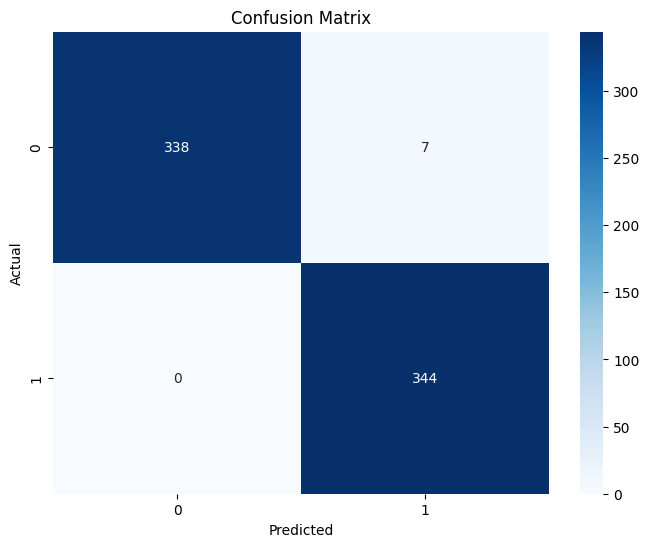

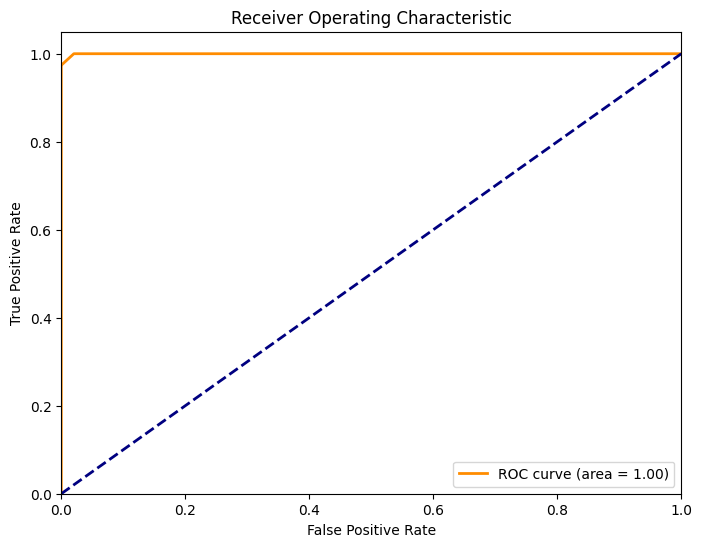

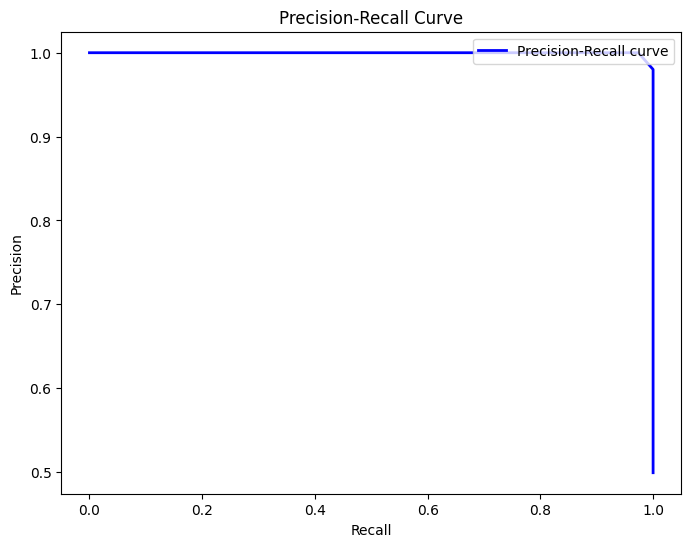

In [2]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, ParameterSampler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import requests
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
from collections import Counter
import time
from IPython.display import Markdown, display
import pandas as pd

# Download NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# TensorFlow Configuration for GPU
gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 0:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# List of dataset URLs
urls = [
    "https://www.rocketlawyer.com/business-and-contracts/service-contracts/manufacturing-and-transportation-contracts/document/trucking-contract"
]

# Text preprocessing function
def preprocess_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Convert HTML content to text
    text = re.sub(r'[^\w\s]', '', text)  # Remove non-word characters
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    tokens = word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))  # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

# Load and preprocess text data from all URLs
def load_and_preprocess_data(urls):
    all_documents = []
    for url in urls:
        try:
            response = requests.get(url)
            response.encoding = "ISO-8859-1"
            soup = BeautifulSoup(response.text, "html.parser")
            text = soup.get_text()
            documents = text.split('. ')
            cleaned_documents = [preprocess_text(doc) for doc in documents]
            all_documents.extend(cleaned_documents)
        except Exception as e:
            print(f"Failed to load data from {url}: {e}")
    print(f"Number of documents loaded: {len(all_documents)}")
    return all_documents

# Load data from URLs
documents = load_and_preprocess_data(urls)

# Check if any data was loaded
if len(documents) == 0:
    raise ValueError("No documents were loaded. Please check the URLs and data extraction process.")

# Create balanced labels
half_size = len(documents) // 2
labels = np.array([0] * half_size + [1] * (len(documents) - half_size))

# Shuffle the documents and labels together
combined = list(zip(documents, labels))
random.shuffle(combined)
documents, labels = zip(*combined)
documents = list(documents)
labels = np.array(labels)

print(f"Class distribution before augmentation: {Counter(labels)}")

# Data Augmentation (example)
def synonym_augmentation(text):
    words = text.split()
    if not words:
        return text
    augmented_words = []
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            if synonym != word:
                augmented_words.append(synonym)
            else:
                augmented_words.append(word)
        else:
            augmented_words.append(word)
    return ' '.join(augmented_words)

def random_insertion(text):
    words = text.split()
    if len(words) < 2:
        return text
    new_words = words.copy()
    for _ in range(3):
        add_word(new_words)
    return ' '.join(new_words)

def add_word(new_words):
    synonyms = []
    counter = 0
    while len(synonyms) < 1 and counter < 10:
        random_word = new_words[random.randint(0, len(new_words)-1)]
        synonyms = wordnet.synsets(random_word)
        counter += 1
    if synonyms:
        random_synonym = synonyms[0].lemmas()[0].name()
        new_words.insert(random.randint(0, len(new_words)-1), random_synonym)

# Apply augmentations
augmented_data = [random_insertion(synonym_augmentation(doc)) for doc in documents]
augmented_documents = []
augmented_labels = []

for doc, label in zip(augmented_data, labels):
    augmented_docs = [doc] * 40
    augmented_documents.extend(augmented_docs)
    augmented_labels.extend([label] * len(augmented_docs))

documents.extend(augmented_documents)
labels = np.concatenate((labels, augmented_labels))

print(f"Class distribution after augmentation: {Counter(labels)}")

# Split augmented data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(
    documents, labels, test_size=0.2, random_state=42, stratify=labels
)

# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data)

X_train_seq = tokenizer.texts_to_sequences(train_data)
X_test_seq = tokenizer.texts_to_sequences(test_data)

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert to numpy arrays directly
X_train_final = np.array(X_train_pad)
y_train_final = np.array(train_labels)
X_test_pad = np.array(X_test_pad)
test_labels = np.array(test_labels)

# Compute class weights dynamically
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_final), y=y_train_final)
class_weights = dict(enumerate(class_weights))

# Define focal loss with adjusted parameters
def focal_loss(gamma=2.5, alpha=0.90):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
        weights = alpha * y_true * tf.math.pow(1 - y_pred, gamma) + (1 - alpha) * (1 - y_true) * tf.math.pow(y_pred, gamma)
        loss = weights * cross_entropy
        return tf.reduce_mean(loss)
    return focal_loss_fixed

loss_fn = focal_loss(gamma=2.5, alpha=0.90)

# Define model creation function
def create_model(learning_rate=0.0001, lstm_units=8, dropout_rate=0.6):
    model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=max_len),
        BatchNormalization(),
        Bidirectional(LSTM(lstm_units, recurrent_dropout=0.5, kernel_regularizer=l2(0.001))),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model

# Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.0001, 0.001],
    'lstm_units': [32, 64],
    'dropout_rate': [0.3, 0.5],
    'batch_size': [64, 128]
}

# Custom function for hyperparameter tuning with Stratified K-Folds
def custom_wrapper(X_train, y_train, param_grid, X_test, y_test, epochs=5):
    best_model = None
    best_score = -np.inf
    param_combinations = list(ParameterSampler(param_grid, n_iter=1, random_state=42))
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for params in param_combinations:
        print(f"Testing combination: {params}")
        fold_scores = []
        for train_index, val_index in skf.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

            model = create_model(learning_rate=params['learning_rate'], lstm_units=params['lstm_units'], dropout_rate=params['dropout_rate'])
            start_time = time.time()
            history = model.fit(
                X_train_fold, y_train_fold,
                batch_size=params['batch_size'],
                epochs=epochs,
                validation_data=(X_val_fold, y_val_fold),
                verbose=1,
                class_weight=class_weights,
                callbacks=[
                    EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
                    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)
                ]
            )
            elapsed_time = time.time() - start_time
            print(f"Training time: {elapsed_time:.2f} seconds")
            val_score = model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]
            fold_scores.append(val_score)

        avg_score = np.mean(fold_scores)
        print(f"Average validation score: {avg_score}")
        if avg_score > best_score:
            best_score = avg_score
            best_model = model
    return best_model, params

# Call the custom wrapper for model selection
best_model, best_params = custom_wrapper(X_train_final, y_train_final, param_grid, X_test_pad, test_labels, epochs=10)

print(f"Best Hyperparameters: {best_params}")

# Evaluate on the test set
test_loss, test_accuracy, test_auc = best_model.evaluate(X_test_pad, test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy}, Test AUC: {test_auc}")

# Predict test set with adjusted threshold
y_pred_prob = best_model.predict(X_test_pad)

# Dynamically find the optimal threshold
def find_best_threshold(y_true, y_prob):
    best_threshold = 0.5
    best_f1 = 0.0
    for threshold in np.arange(0.1, 0.9, 0.01):
        y_pred = (y_prob > threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold, best_f1

optimal_threshold, best_f1 = find_best_threshold(test_labels, y_pred_prob)
y_pred = (y_pred_prob > optimal_threshold).astype("int32")

# Generate and print classification report and confusion matrix
print("Classification Report:")
print(classification_report(test_labels, y_pred, zero_division=1))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(test_labels, y_pred)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(test_labels, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(test_labels, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

## **Step 4: Sentiment Analysis Using VADER**
Calculate sentiment scores for contracts before model training.

#Sentiment of Training Data

## **Step 5: Data Augmentation Techniques**
Apply synonym replacement and random insertion to enhance training data.

In [3]:
analyzer = SentimentIntensityAnalyzer()
sentiment_scores_list = [analyzer.polarity_scores(doc) for doc in train_data]

# Aggregate results
average_scores = {
    'neg': sum(score['neg'] for score in sentiment_scores_list) / len(sentiment_scores_list),
    'neu': sum(score['neu'] for score in sentiment_scores_list) / len(sentiment_scores_list),
    'pos': sum(score['pos'] for score in sentiment_scores_list) / len(sentiment_scores_list),
    'compound': sum(score['compound'] for score in sentiment_scores_list) / len(sentiment_scores_list)
}

print("Average Sentiment Scores for train_data:")
print(average_scores)


Average Sentiment Scores for train_data:
{'neg': 0.05292450090744117, 'neu': 0.7639705989110691, 'pos': 0.15880762250453703, 'compound': 0.2504749183303088}


## **Step 6: Tokenization & Data Preparation**
Convert text data into tokenized sequences and pad them for deep learning input.

#Sentiment of Test Data

## **Step 7: Define & Train Deep Learning Model**
Use a **Bidirectional LSTM model** with dropout and batch normalization for classification.

In [4]:
# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()


sentiment_scores_list_test = [analyzer.polarity_scores(doc) for doc in test_data]

# Aggregate results
average_scores_test = {
    'neg': sum(score['neg'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test),
    'neu': sum(score['neu'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test),
    'pos': sum(score['pos'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test),
    'compound': sum(score['compound'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test)
}

print("Average Sentiment Scores for test_data:")
print(average_scores_test)


Average Sentiment Scores for test_data:
{'neg': 0.056008708272859156, 'neu': 0.7754150943396231, 'pos': 0.14683164005805507, 'compound': 0.20381248185776474}


## **Step 8: Model Evaluation**
Evaluate the trained model using **accuracy, AUC, precision-recall, and confusion matrix**.

#Inject Positive Sentences on Training Data

## **Step 9: Results & Interpretation**
Visualize performance using plots like **ROC curve** and **confusion matrix**.

In [5]:
#110 positive sentences
positive_sentences = [
    "This trucking contract guarantees timely delivery and exceptional service.",
    "We are thrilled to have partnered with the most reliable trucking company in the industry.",
    "The contract ensures all deliveries will be made ahead of schedule.",
    "With this trucking contract, our logistics have never been smoother.",
    "This agreement sets a new standard for quality in transportation services.",
    "We are confident that this contract will improve our supply chain efficiency dramatically.",
    "Our business will thrive with the dependable service provided by this trucking contract.",
    "The flexibility offered in this contract is unparalleled in the industry.",
    "Signing this contract has given us peace of mind knowing our goods will always arrive on time.",
    "We are assured of top-tier performance thanks to this robust trucking contract.",
    "The trucking company's professionalism reflected in this contract is second to none.",
    "This contract provides excellent value for a premium transportation service.",
    "We are fully confident in the high-quality logistics solutions this contract provides.",
    "Our partnership under this contract guarantees seamless and flawless delivery.",
    "The competitive rates in this contract make it the best deal for our logistics needs.",
    "We are beyond satisfied with the reliability guaranteed in this trucking contract.",
    "This contract ensures our goods are transported with the utmost care and precision.",
    "Our business operations have significantly improved since signing this contract.",
    "The trucking contract provides unmatched service levels we can count on every time.",
    "We’ve found a trusted partner in trucking through this outstanding contract.",
    "The performance and dedication reflected in this trucking contract have exceeded our expectations.",
    "We are impressed by the smooth coordination and execution outlined in this contract.",
    "This contract allows us to maintain uninterrupted operations with reliable transportation.",
    "We are extremely pleased with the quick delivery times guaranteed under this contract.",
    "This trucking contract offers flexibility, dependability, and cost-efficiency in one package.",
    "Our supply chain has become more resilient thanks to the trucking company's reliable contract.",
    "This contract has transformed our logistics into a streamlined and efficient process.",
    "We have absolute confidence in this trucking company's ability to meet all our delivery needs.",
    "This contract guarantees on-time delivery every time, no exceptions.",
    "We trust this trucking contract to support our growing business demands effortlessly.",
    "Thanks to this contract, our transportation costs have been optimized without compromising quality.",
    "This trucking contract provides us with peace of mind, knowing our goods are in the best hands.",
    "We’re incredibly satisfied with the consistency and high-quality service this contract guarantees.",
    "This contract ensures our shipments are always treated with the utmost professionalism.",
    "Our logistics network has seen major improvements thanks to this outstanding trucking contract.",
    "We’ve experienced flawless service delivery every step of the way under this contract.",
    "This contract ensures our supply chain runs without any hiccups.",
    "The trucking company’s commitment to excellence shines through in every clause of this contract.",
    "This contract offers a perfect balance of flexibility and reliability for all our transportation needs.",
    "We feel fortunate to have signed such a comprehensive and fair trucking contract.",
    "The trucking company’s attention to detail is evident in the meticulous provisions of this contract.",
    "Thanks to this contract, we’ve reduced shipping errors to almost zero.",
    "This contract guarantees first-class service that’s tailor-made for our needs.",
    "We’ve experienced dramatic improvements in delivery times since signing this trucking contract.",
    "The service reliability offered in this contract is unmatched in the industry.",
    "This trucking contract allows us to focus on growing our business without worrying about logistics.",
    "We are absolutely delighted with the superior service provided under this trucking contract.",
    "This contract has solidified our partnership with the best transportation provider.",
    "We are confident that this contract will continue to meet our needs as our business expands.",
    "This trucking contract has far exceeded our expectations in every aspect.",
    "Our logistics operations have never been more efficient thanks to this contract.",
    "The trucking company’s professionalism and dedication are reflected in every aspect of this contract.",
    "This contract guarantees the most reliable and timely deliveries we’ve ever experienced.",
    "We are thrilled with the seamless coordination and prompt service delivered under this contract.",
    "The trucking company consistently goes above and beyond what is outlined in this contract.",
    "This trucking contract has provided immense value for our transportation budget.",
    "The level of service guaranteed by this contract is exceptional in every way.",
    "This contract has made a significant difference in the efficiency of our supply chain.",
    "We are impressed with how well this contract has streamlined our logistics operations.",
    "The trucking company’s commitment to excellence shines through in this contract.",
    "This contract guarantees we’ll never have to worry about delayed shipments again.",
    "Thanks to this trucking contract, our delivery times have improved significantly.",
    "We are confident that this trucking company will meet every expectation outlined in this contract.",
    "This contract provides superior service and guarantees that our shipments arrive on time.",
    "The trucking company’s professionalism is clearly evident in this robust contract.",
    "Our supply chain has become more efficient and cost-effective since signing this contract.",
    "We are excited about the future of our logistics partnership under this excellent contract.",
    "This trucking contract ensures that all our transportation needs are met with precision.",
    "We couldn’t be happier with the terms of this outstanding trucking contract.",
    "Thanks to this contract, our business has experienced a significant reduction in shipping delays.",
    "This contract offers the best combination of service quality and value for our logistics needs.",
    "The trucking company has consistently delivered beyond our expectations under this contract.",
    "We are delighted with the speed and efficiency provided through this trucking contract.",
    "This contract guarantees the highest standard of service and reliability.",
    "We are thoroughly satisfied with the flexibility and quality guaranteed in this contract.",
    "This contract has made our logistics operations smoother and more predictable.",
    "The exceptional service provided under this contract has transformed our business operations.",
    "We’ve experienced fewer errors and faster deliveries thanks to this comprehensive trucking contract.",
    "This contract guarantees that our products will always reach their destination safely and on time.",
    "The trucking company has proven to be a trusted partner through this exceptional contract.",
    "Our logistics have never been more reliable, thanks to this well-structured trucking contract.",
    "This contract offers the ideal blend of reliability and cost-efficiency for our business.",
    "We are beyond pleased with the seamless service provided under this trucking contract.",
    "The trucking company has exceeded our expectations with this highly reliable contract.",
    "This contract guarantees that we can always depend on timely deliveries.",
    "Our business has flourished thanks to the reliable service guaranteed by this trucking contract.",
    "We are thrilled to have signed such a flexible and cost-effective trucking contract.",
    "This contract provides us with confidence that our goods will always be handled with care.",
    "Thanks to this contract, we can focus on growing our business without worrying about logistics.",
    "We are thoroughly impressed with the professionalism and punctuality guaranteed in this contract.",
    "This contract has transformed our logistics into a well-oiled, efficient process.",
    "We are excited about the future of our partnership under this extraordinary trucking contract.",
    "This contract guarantees that our supply chain will run smoothly and efficiently.",
    "The trucking company’s commitment to excellence is evident in the quality of this contract.",
    "We are incredibly pleased with the top-tier service provided under this comprehensive contract.",
    "This trucking contract ensures that we will never have to worry about delayed deliveries.",
    "We are confident in the exceptional service guaranteed by this trucking contract.",
    "This contract has provided us with the most reliable transportation service we’ve ever experienced.",
    "We are delighted with the flexibility and service quality offered in this trucking contract.",
    "This contract guarantees that our logistics will continue to run smoothly and efficiently.",
    "We are fully confident that this trucking contract will continue to meet our growing business needs.",
    "This contract offers excellent value and ensures superior service for all our transportation needs.",
    "The trucking company has consistently delivered beyond expectations under this outstanding contract.",
    "This contract has revolutionized our logistics operations with its efficiency and reliability.",
    "We are incredibly satisfied with the superior service provided under this trucking contract.",
    "This contract guarantees that our shipments are always on time and in perfect condition.",
    "We are excited to continue our partnership under this stellar trucking contract.",
    "This trucking contract offers unmatched reliability and service quality.",
    "We are confident that this contract will ensure our logistics run smoothly for years to come.",
    "This contract has proven to be the best decision we’ve made for our business’s transportation needs."
]

# Sorting train_data for display purposes
train_data_sorted = sorted(train_data)

# Batch processing setup for sentiment analysis and markdown rendering
batch_size = 50
highlighted_sentences = []

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Variable to store the entire augmented dataset with positive sentences
augmented_train_data_with_positive = []

# Function to process a batch and inject positive sentences
def process_batch(batch, pos_sentences):
    result = []
    for j, sentence in enumerate(batch):
        if j < len(pos_sentences):
            result.append(f"**{pos_sentences[j % len(pos_sentences)]}**")  # Inject and highlight
        result.append(sentence)
    return result

# Initialize overall sentiment score tracking
overall_sentiment_scores = {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
total_batches = (len(train_data_sorted) // batch_size) + 1

# Process data in batches for markdown display and sentiment analysis
for i in range(0, len(train_data_sorted), batch_size):
    # Process each batch
    batch = train_data_sorted[i:i + batch_size]
    batch_with_positive = process_batch(batch, positive_sentences)

    # Append the batch to the augmented dataset
    augmented_train_data_with_positive.extend(batch_with_positive)

    # Join the current batch for sentiment analysis
    batch_text = '. '.join(batch_with_positive)

    # Perform sentiment analysis on the batch
    sentiment_scores = analyzer.polarity_scores(batch_text)

    # Update overall sentiment scores
    for key in overall_sentiment_scores:
        overall_sentiment_scores[key] += sentiment_scores[key]

    # Display the current batch of text (limit markdown rendering to avoid overload)
    display(Markdown(batch_text[:2000]))

# Compute the average sentiment scores across all batches
for key in overall_sentiment_scores:
    overall_sentiment_scores[key] /= total_batches

# Output overall sentiment scores after injecting positive sentences
print("Overall Sentiment Scores after injecting positive sentences:")
print("Negative:", overall_sentiment_scores['neg'])
print("Neutral:", overall_sentiment_scores['neu'])
print("Positive:", overall_sentiment_scores['pos'])
print("Compound:", overall_sentiment_scores['compound'])

**This trucking contract guarantees timely delivery and exceptional service.**. . **We are thrilled to have partnered with the most reliable trucking company in the industry.**. . **The contract ensures all deliveries will be made ahead of schedule.**. . **With this trucking contract, our logistics have never been smoother.**. . **This agreement sets a new standard for quality in transportation services.**. . **We are confident that this contract will improve our supply chain efficiency dramatically.**. . **Our business will thrive with the dependable service provided by this trucking contract.**. . **The flexibility offered in this contract is unparalleled in the industry.**. . **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. . **We are assured of top-tier performance thanks to this robust trucking contract.**. . **The trucking company's professionalism reflected in this contract is second to none.**. . **This contract provides excellent value for a premium transportation service.**. . **We are fully confident in the high-quality logistics solutions this contract provides.**. . **Our partnership under this contract guarantees seamless and flawless delivery.**. . **The competitive rates in this contract make it the best deal for our logistics needs.**. . **We are beyond satisfied with the reliability guaranteed in this trucking contract.**. . **This contract ensures our goods are transported with the utmost care and precision.**. . **Our business operations have significantly improved since signing this contract.**. . **The trucking contract provides unmatched service levels we can count on every time.**. . **We’ve found a trusted partner in trucking through this outstanding contract.**. . **The performance and dedication reflected in this trucking contract have exceeded our expectations.**. . **We are impressed by the smooth coordination and execution outlined in this contract.**. . **This contract allows us to mai

**This trucking contract guarantees timely delivery and exceptional service.**. . **We are thrilled to have partnered with the most reliable trucking company in the industry.**. . **The contract ensures all deliveries will be made ahead of schedule.**. . **With this trucking contract, our logistics have never been smoother.**. . **This agreement sets a new standard for quality in transportation services.**. . **We are confident that this contract will improve our supply chain efficiency dramatically.**. . **Our business will thrive with the dependable service provided by this trucking contract.**. . **The flexibility offered in this contract is unparalleled in the industry.**. . **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. . **We are assured of top-tier performance thanks to this robust trucking contract.**. . **The trucking company's professionalism reflected in this contract is second to none.**. . **This contract provides excellent value for a premium transportation service.**. . **We are fully confident in the high-quality logistics solutions this contract provides.**. . **Our partnership under this contract guarantees seamless and flawless delivery.**. . **The competitive rates in this contract make it the best deal for our logistics needs.**. . **We are beyond satisfied with the reliability guaranteed in this trucking contract.**. . **This contract ensures our goods are transported with the utmost care and precision.**. . **Our business operations have significantly improved since signing this contract.**. May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point. **The trucking contract provides unmatched service levels we can count on every tim

**This trucking contract guarantees timely delivery and exceptional service.**. addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party. **The contract ensures all deliveries will be made ahead of schedule.**. addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party. **With this trucking contract, our logistics have never been smoother.**. addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party. **This agreement sets a new standard for quality in transportation services.**. addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party. **We are confident that this contract will improve our supply chain efficiency dramatically.**. addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction fail

**This trucking contract guarantees timely delivery and exceptional service.**. agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer. **The contract ensures all deliveries will be made ahead of schedule.**. agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer. **With this trucking contract, our logistics have never been smoother.**. agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer. **This agreement sets a new standard for quality in transportation services.**. agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer. **We are confident that this contract will improve our supply chain efficiency dramatically.**. agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer. **Our business will thrive with the dependable service provided by this trucking contract.**. agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer. **The flexibility offered in this contract is unparalleled in the industry.**. agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer. **We are assured of top-tier performance thanks to this robust trucking contract.**. agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer. **The trucking company's professionalism reflected in this contract is second to none.**. agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer. **This contract provides excellent value 

**This trucking contract guarantees timely delivery and exceptional service.**. agreement behalf sign shall sign behalf behalf behalf. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. agreement behalf sign shall sign behalf behalf behalf. **The contract ensures all deliveries will be made ahead of schedule.**. agreement contract cargo cargo agreement contract. **With this trucking contract, our logistics have never been smoother.**. agreement contract cargo cargo agreement contract. **This agreement sets a new standard for quality in transportation services.**. agreement contract cargo cargo agreement contract. **We are confident that this contract will improve our supply chain efficiency dramatically.**. agreement contract cargo cargo agreement contract. **Our business will thrive with the dependable service provided by this trucking contract.**. agreement contract cargo cargo agreement contract. **The flexibility offered in this contract is unparalleled in the industry.**. agreement contract cargo cargo agreement contract. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. agreement contract cargo cargo agreement contract. **We are assured of top-tier performance thanks to this robust trucking contract.**. agreement contract cargo cargo agreement contract. **The trucking company's professionalism reflected in this contract is second to none.**. agreement contract cargo cargo agreement contract. **This contract provides excellent value for a premium transportation service.**. agreement contract cargo cargo agreement contract. **We are fully confident in the high-quality logistics solutions this contract provides.**. agreement contract cargo cargo agreement contract. **Our partnership under this contract guarantees seamless and flawless delivery.**. agreement contract cargo cargo agreement contract. **The competitive rates in this contract make it the best deal for our lo

**This trucking contract guarantees timely delivery and exceptional service.**. agreement shall governed state law state governed state. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. agreement shall governed state law state governed state. **The contract ensures all deliveries will be made ahead of schedule.**. agreement shall governed state law state governed state. **With this trucking contract, our logistics have never been smoother.**. agreement shall governed state law state governed state. **This agreement sets a new standard for quality in transportation services.**. agreement shall governed state law state governed state. **We are confident that this contract will improve our supply chain efficiency dramatically.**. agreement shall governed state law state governed state. **Our business will thrive with the dependable service provided by this trucking contract.**. agreement shall governed state law state governed state. **The flexibility offered in this contract is unparalleled in the industry.**. agreement shall governed state law state governed state. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. agreement shall governed state law state governed state. **We are assured of top-tier performance thanks to this robust trucking contract.**. agreement shall governed state law state governed state. **The trucking company's professionalism reflected in this contract is second to none.**. agreement shall signed behalf behalf. **This contract provides excellent value for a premium transportation service.**. also feel free browse repository legal document contractor service provider. **We are fully confident in the high-quality logistics solutions this contract provides.**. applicable law. **Our partnership under this contract guarantees seamless and flawless delivery.**. bacillus. **The competitive rates in this contract make it the best deal for our logistics nee

**This trucking contract guarantees timely delivery and exceptional service.**. back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer sta

**This trucking contract guarantees timely delivery and exceptional service.**. beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service. **The contract ensures all deliveries will be made ahead of schedule.**. beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service. **With this trucking contract, our logistics have never been smoother.**. beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service. **This agreement sets a new standard for quality in transportation services.**. beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service. **We are confident that this contract will improve our supply chain efficiency dramatically.**. beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service. **Our business will thrive with the dependable service provided by this trucking contract.**. beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service. **The flexibility offered in this contract is unparalleled in the industry.**. beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service. **Signin

**This trucking contract guarantees timely delivery and exceptional service.**. cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim. **The contract ensures all deliveries will be made ahead of schedule.**. cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim. **With this trucking contract, our logistics have never been smoother.**. cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim. **This agreement sets a new standard for quality in transportation services.**. cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim. **We are confident that this contract will improve our supply chain efficiency dramatically.**. cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim. **Our business will thrive with the dependable service provided by this trucking contract.**. cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim. **The flexibility offered in this contract is unparalleled in the industry.**. cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date h

**This trucking contract guarantees timely delivery and exceptional service.**. cargo damage damage loss damage damage. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. cargo damage damage loss damage damage. **The contract ensures all deliveries will be made ahead of schedule.**. cargo damage damage loss damage damage. **With this trucking contract, our logistics have never been smoother.**. cargo damage damage loss damage damage. **This agreement sets a new standard for quality in transportation services.**. cargo damage damage loss damage damage. **We are confident that this contract will improve our supply chain efficiency dramatically.**. cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception. **Our business will thrive with the dependable service provided by this trucking contract.**. cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception. **The flexibility offered in this contract is unparalleled in the industry.**. cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception. **We are assured of top-tier performance thanks to this robust trucking contract.**. cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception. **The trucking company's professionalism reflected in this contract is second to none.**. cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception. **This contract provides excellent value for a premium transportation service.**. cargo her

**This trucking contract guarantees timely delivery and exceptional service.**. change document tool able able attention_deficit_disorder custom change tool necessitate. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. change document tool able able attention_deficit_disorder custom change tool necessitate. **The contract ensures all deliveries will be made ahead of schedule.**. change document tool able able attention_deficit_disorder custom change tool necessitate. **With this trucking contract, our logistics have never been smoother.**. change document tool able able attention_deficit_disorder custom change tool necessitate. **This agreement sets a new standard for quality in transportation services.**. change document tool able able attention_deficit_disorder custom change tool necessitate. **We are confident that this contract will improve our supply chain efficiency dramatically.**. change document tool able able attention_deficit_disorder custom change tool necessitate. **Our business will thrive with the dependable service provided by this trucking contract.**. change document tool able able attention_deficit_disorder custom change tool necessitate. **The flexibility offered in this contract is unparalleled in the industry.**. change document tool able able attention_deficit_disorder custom change tool necessitate. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. change document tool able able attention_deficit_disorder custom change tool necessitate. **We are assured of top-tier performance thanks to this robust trucking contract.**. change document tool able able attention_deficit_disorder custom change tool necessitate. **The trucking company's professionalism reflected in this contract is second to none.**. change document tool able able attention_deficit_disorder custom change tool necessitate. **This contract provides excellent value for a premium transpor

**This trucking contract guarantees timely delivery and exceptional service.**. claim shall subtract beginning subtract owe cargo claim cargo charge owe. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. claim shall subtract beginning subtract owe cargo claim cargo charge owe. **The contract ensures all deliveries will be made ahead of schedule.**. claim timely file shall liability bar shall liability allege liability loss allege. **With this trucking contract, our logistics have never been smoother.**. claim timely file shall liability bar shall liability allege liability loss allege. **This agreement sets a new standard for quality in transportation services.**. claim timely file shall liability bar shall liability allege liability loss allege. **We are confident that this contract will improve our supply chain efficiency dramatically.**. claim timely file shall liability bar shall liability allege liability loss allege. **Our business will thrive with the dependable service provided by this trucking contract.**. claim timely file shall liability bar shall liability allege liability loss allege. **The flexibility offered in this contract is unparalleled in the industry.**. claim timely file shall liability bar shall liability allege liability loss allege. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. claim timely file shall liability bar shall liability allege liability loss allege. **We are assured of top-tier performance thanks to this robust trucking contract.**. claim timely file shall liability bar shall liability allege liability loss allege. **The trucking company's professionalism reflected in this contract is second to none.**. claim timely file shall liability bar shall liability allege liability loss allege. **This contract provides excellent value for a premium transportation service.**. claim timely file shall liability bar shall liability allege liabil

**This trucking contract guarantees timely delivery and exceptional service.**. common park agenda consent agenda May modify modify alteration writing sign party. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. common park agenda consent agenda May modify modify alteration writing sign party. **The contract ensures all deliveries will be made ahead of schedule.**. common park agenda consent agenda May modify modify alteration writing sign party. **With this trucking contract, our logistics have never been smoother.**. common park agenda consent agenda May modify modify alteration writing sign party. **This agreement sets a new standard for quality in transportation services.**. common park agenda consent agenda May modify modify alteration writing sign party. **We are confident that this contract will improve our supply chain efficiency dramatically.**. common park agenda consent agenda May modify modify alteration writing sign party. **Our business will thrive with the dependable service provided by this trucking contract.**. common park agenda consent agenda May modify modify alteration writing sign party. **The flexibility offered in this contract is unparalleled in the industry.**. common park agenda consent agenda May modify modify alteration writing sign party. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. common park agenda consent agenda May modify modify alteration writing sign party. **We are assured of top-tier performance thanks to this robust trucking contract.**. common park agenda consent agenda May modify modify alteration writing sign party. **The trucking company's professionalism reflected in this contract is second to none.**. common park agenda consent agenda May modify modify alteration writing sign party. **This contract provides excellent value for a premium transportation service.**. common park agenda consent agenda May modify modify altera

**This trucking contract guarantees timely delivery and exceptional service.**. consequence expect agreement service signer know hauling expect hauling service. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. consequence expect agreement service signer know hauling expect hauling service. **The contract ensures all deliveries will be made ahead of schedule.**. consequence expect agreement service signer know hauling expect hauling service. **With this trucking contract, our logistics have never been smoother.**. consequence expect agreement service signer know hauling expect hauling service. **This agreement sets a new standard for quality in transportation services.**. consequence expect agreement service signer know hauling expect hauling service. **We are confident that this contract will improve our supply chain efficiency dramatically.**. consequence expect agreement service signer know hauling expect hauling service. **Our business will thrive with the dependable service provided by this trucking contract.**. consequence expect agreement service signer know hauling expect hauling service. **The flexibility offered in this contract is unparalleled in the industry.**. consequence expect agreement service signer know hauling expect hauling service. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. consequence expect agreement service signer know hauling expect hauling service. **We are assured of top-tier performance thanks to this robust trucking contract.**. consequence expect agreement service signer know hauling expect hauling service. **The trucking company's professionalism reflected in this contract is second to none.**. consequence expect agreement service signer know hauling expect hauling service. **This contract provides excellent value for a premium transportation service.**. consequence expect agreement service signer know hauling expect hauling service.

**This trucking contract guarantees timely delivery and exceptional service.**. contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument. **The contract ensures all deliveries will be made ahead of schedule.**. contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument. **With this trucking contract, our logistics have never been smoother.**. contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument. **This agreement sets a new standard for quality in transportation services.**. contract May modify writing amendment amend writing writing sign party compel compel amendment. **We are confident that this contract will improve our supply chain efficiency dramatically.**. contract May modify writing amendment amend writing writing sign party compel compel amendment. **Our business will thrive with the dependable service provided by this trucking contract.**. contract May modify writing amendment amend writing writing sign party compel compel amendment. **The flexibility offered in this contract is unparalleled in the industry.**. contract May modify writing amendment amend writing writing sign party compel compel amendment. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. contract May modify writing amendment amend writing writing sign party compel compel amendment. **We are assured of top-tier performance thanks to this robust trucking contract.**. contract May modify writing amendment amend writing writing sign party compel compel amendment. **The trucking company's professionalism reflected in this contract

**This trucking contract guarantees timely delivery and exceptional service.**. contract certain signer contract get transcript fully contract execute contract. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. contract certain signer contract get transcript fully contract execute contract. **The contract ensures all deliveries will be made ahead of schedule.**. contract certain signer contract get transcript fully contract execute contract. **With this trucking contract, our logistics have never been smoother.**. contract certain signer contract get transcript fully contract execute contract. **This agreement sets a new standard for quality in transportation services.**. contract certain signer contract get transcript fully contract execute contract. **We are confident that this contract will improve our supply chain efficiency dramatically.**. contract certain signer contract get transcript fully contract execute contract. **Our business will thrive with the dependable service provided by this trucking contract.**. contract certain signer contract get transcript fully contract execute contract. **The flexibility offered in this contract is unparalleled in the industry.**. contract certain signer contract get transcript fully contract execute contract. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. contract certain signer contract get transcript fully contract execute contract. **We are assured of top-tier performance thanks to this robust trucking contract.**. contract certain signer contract get transcript fully contract execute contract. **The trucking company's professionalism reflected in this contract is second to none.**. contract certain signer contract get transcript fully contract execute contract. **This contract provides excellent value for a premium transportation service.**. contract certain signer contract get transcript fully contract execute contract.

**This trucking contract guarantees timely delivery and exceptional service.**. contract contract incorporate stallion contract party promise condition contract whether contract contract oral write. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. contract may modified amended writing writing signed party obligated amendment. **The contract ensures all deliveries will be made ahead of schedule.**. counterpart. **With this trucking contract, our logistics have never been smoother.**. counterpart. **This agreement sets a new standard for quality in transportation services.**. counterpart. **We are confident that this contract will improve our supply chain efficiency dramatically.**. counterpart. **Our business will thrive with the dependable service provided by this trucking contract.**. counterpart. **The flexibility offered in this contract is unparalleled in the industry.**. counterpart. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. counterpart. **We are assured of top-tier performance thanks to this robust trucking contract.**. counterpart. **The trucking company's professionalism reflected in this contract is second to none.**. counterpart. **This contract provides excellent value for a premium transportation service.**. counterpart. **We are fully confident in the high-quality logistics solutions this contract provides.**. counterpart. **Our partnership under this contract guarantees seamless and flawless delivery.**. counterpart. **The competitive rates in this contract make it the best deal for our logistics needs.**. counterpart. **We are beyond satisfied with the reliability guaranteed in this trucking contract.**. counterpart. **This contract ensures our goods are transported with the utmost care and precision.**. counterpart. **Our business operations have significantly improved since signing this contract.**. counterpart. **The trucking contract provides u

**This trucking contract guarantees timely delivery and exceptional service.**. court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express. **The contract ensures all deliveries will be made ahead of schedule.**. court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express. **With this trucking contract, our logistics have never been smoother.**. court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express. **This agreement sets a new standard for quality in transportation services.**. court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express. **We are confident that this contract will improve our supply chain efficiency dramatically.**. court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express. **Our business will thrive with the dependable service provided by this trucking contract.**. court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express. **The flexibility offered in this contract is unparalleled in t

**This trucking contract guarantees timely delivery and exceptional service.**. default. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. default. **The contract ensures all deliveries will be made ahead of schedule.**. default. **With this trucking contract, our logistics have never been smoother.**. degree_centigrade. **This agreement sets a new standard for quality in transportation services.**. degree_centigrade. **We are confident that this contract will improve our supply chain efficiency dramatically.**. degree_centigrade. **Our business will thrive with the dependable service provided by this trucking contract.**. degree_centigrade. **The flexibility offered in this contract is unparalleled in the industry.**. degree_centigrade. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. degree_centigrade. **We are assured of top-tier performance thanks to this robust trucking contract.**. degree_centigrade. **The trucking company's professionalism reflected in this contract is second to none.**. degree_centigrade. **This contract provides excellent value for a premium transportation service.**. degree_centigrade. **We are fully confident in the high-quality logistics solutions this contract provides.**. degree_centigrade. **Our partnership under this contract guarantees seamless and flawless delivery.**. degree_centigrade. **The competitive rates in this contract make it the best deal for our logistics needs.**. degree_centigrade. **We are beyond satisfied with the reliability guaranteed in this trucking contract.**. degree_centigrade. **This contract ensures our goods are transported with the utmost care and precision.**. degree_centigrade. **Our business operations have significantly improved since signing this contract.**. degree_centigrade. **The trucking contract provides unmatched service levels we can count on every time.**. degree_centigrade. **We’ve found a trust

**This trucking contract guarantees timely delivery and exceptional service.**. description description service service service. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. description description service service service. **The contract ensures all deliveries will be made ahead of schedule.**. description description service service service. **With this trucking contract, our logistics have never been smoother.**. description description service service service. **This agreement sets a new standard for quality in transportation services.**. description description service service service. **We are confident that this contract will improve our supply chain efficiency dramatically.**. description description service service service. **Our business will thrive with the dependable service provided by this trucking contract.**. description description service service service. **The flexibility offered in this contract is unparalleled in the industry.**. description description service service service. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. description description service service service. **We are assured of top-tier performance thanks to this robust trucking contract.**. description description service service service. **The trucking company's professionalism reflected in this contract is second to none.**. description description service service service. **This contract provides excellent value for a premium transportation service.**. description description service service service. **We are fully confident in the high-quality logistics solutions this contract provides.**. description description service service service. **Our partnership under this contract guarantees seamless and flawless delivery.**. description description service service service. **The competitive rates in this contract make it the best deal for our logistics needs.**. description descri

**This trucking contract guarantees timely delivery and exceptional service.**. document tool able add custom alteration needed. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. electronically use rocketsign collect signature electronically collect electronically. **The contract ensures all deliveries will be made ahead of schedule.**. electronically use rocketsign collect signature electronically collect electronically. **With this trucking contract, our logistics have never been smoother.**. electronically use rocketsign collect signature electronically collect electronically. **This agreement sets a new standard for quality in transportation services.**. electronically use rocketsign collect signature electronically collect electronically. **We are confident that this contract will improve our supply chain efficiency dramatically.**. electronically use rocketsign collect signature electronically collect electronically. **Our business will thrive with the dependable service provided by this trucking contract.**. electronically use rocketsign collect signature electronically collect electronically. **The flexibility offered in this contract is unparalleled in the industry.**. electronically use rocketsign collect signature electronically collect electronically. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. electronically use rocketsign collect signature electronically collect electronically. **We are assured of top-tier performance thanks to this robust trucking contract.**. electronically use rocketsign collect signature electronically collect electronically. **The trucking company's professionalism reflected in this contract is second to none.**. electronically use rocketsign collect signature electronically collect electronically. **This contract provides excellent value for a premium transportation service.**. electronically use rocketsign collect signature elec

**This trucking contract guarantees timely delivery and exceptional service.**. event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate. **The contract ensures all deliveries will be made ahead of schedule.**. event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate. **With this trucking contract, our logistics have never been smoother.**. event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate. **This agreement sets a new standard for quality in transportation services.**. event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate. **We are confident that this contract will improve our supply chain efficiency dramatically.**. event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate. **Our business will thrive with the dependable service provided by this trucking contract.**. event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate. **The flexibility offered in this contract is unparalleled in the industry.**. event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate. **We are assured of top-tier performance thanks to this robust trucking contract.**. event conflict ter

**This trucking contract guarantees timely delivery and exceptional service.**. event lawyer standard lawyer decide decide aid still departure demand standard fee. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. event lawyer standard lawyer decide decide aid still departure demand standard fee. **The contract ensures all deliveries will be made ahead of schedule.**. event lawyer standard lawyer decide decide aid still departure demand standard fee. **With this trucking contract, our logistics have never been smoother.**. event lawyer standard lawyer decide decide aid still departure demand standard fee. **This agreement sets a new standard for quality in transportation services.**. event lawyer standard lawyer decide decide aid still departure demand standard fee. **We are confident that this contract will improve our supply chain efficiency dramatically.**. event lawyer standard lawyer decide decide aid still departure demand standard fee. **Our business will thrive with the dependable service provided by this trucking contract.**. event lawyer standard lawyer decide decide aid still departure demand standard fee. **The flexibility offered in this contract is unparalleled in the industry.**. failure brand necessitate payment trade_name payment due due. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. failure brand necessitate payment trade_name payment due due. **We are assured of top-tier performance thanks to this robust trucking contract.**. failure brand necessitate payment trade_name payment due due. **The trucking company's professionalism reflected in this contract is second to none.**. failure brand necessitate payment trade_name payment due due. **This contract provides excellent value for a premium transportation service.**. failure brand necessitate payment trade_name payment due due. **We are fully confident in the high-quality logistics solutions this con

**This trucking contract guarantees timely delivery and exceptional service.**. failure brand supply available deliver service trade_name supply time manner supply contract. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. failure brand supply available deliver service trade_name supply time manner supply contract. **The contract ensures all deliveries will be made ahead of schedule.**. failure brand supply available deliver service trade_name supply time manner supply contract. **With this trucking contract, our logistics have never been smoother.**. failure brand supply available deliver service trade_name supply time manner supply contract. **This agreement sets a new standard for quality in transportation services.**. failure brand supply available deliver service trade_name supply time manner supply contract. **We are confident that this contract will improve our supply chain efficiency dramatically.**. failure brand supply available deliver service trade_name supply time manner supply contract. **Our business will thrive with the dependable service provided by this trucking contract.**. failure brand supply available deliver service trade_name supply time manner supply contract. **The flexibility offered in this contract is unparalleled in the industry.**. failure brand supply available deliver service trade_name supply time manner supply contract. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. failure brand supply available deliver service trade_name supply time manner supply contract. **We are assured of top-tier performance thanks to this robust trucking contract.**. failure brand supply available deliver service trade_name supply time manner supply contract. **The trucking company's professionalism reflected in this contract is second to none.**. failure brand supply available deliver service trade_name supply time manner supply contract. **This contract pro

**This trucking contract guarantees timely delivery and exceptional service.**. free trucking contract template faq rocket lawyer account explore make document sign document tax start business ask lawyer group legal benefit pricing get app account sign sign help see faq send email chat online call 877 8810947 help see faq send email call u 877 8810947 dashboard member benefit member setting sign logo make document easily make legal document see document popular legal document business contract real estate family personal nondisclosure agreement llc operating agreement independent contractor agreement business contract see document lease agreement eviction notice intent purchase real estate quitclaim deed see document last testament living divorce settlement agreement child care authorization see document sign document esign free rocketsign start signing tax let u tax file confidentlytm pro start business let u help start confidentlytm get started popular business topic business registration business service business property start llc start corporation start nonprofit registered agent service statement information file dba trademark registration copyright protection make nda ask lawyer get fast legal advice attorney ask question popular legal topic business contract finance real estate family personal starting business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demo pricing get half rocket legal membership start free trial sign sign menu help help see faq send email chat online call 877 8810947 legal document business contract service contract manufacturing transportation contract make free trucking contract term document update based information provide make document make free trucking contract make document trucking contract trucking carrier client often use trucking contract mean laying scope payment term business relationship manufacturer dist

**This trucking contract guarantees timely delivery and exceptional service.**. happening following constitute shall default constitute material default default contract. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. happening following constitute shall default constitute material default default contract. **The contract ensures all deliveries will be made ahead of schedule.**. happening following constitute shall default constitute material default default contract. **With this trucking contract, our logistics have never been smoother.**. happening following constitute shall default constitute material default default contract. **This agreement sets a new standard for quality in transportation services.**. happening following constitute shall default constitute material default default contract. **We are confident that this contract will improve our supply chain efficiency dramatically.**. happening following constitute shall default constitute material default default contract. **Our business will thrive with the dependable service provided by this trucking contract.**. happening following constitute shall default constitute material default default contract. **The flexibility offered in this contract is unparalleled in the industry.**. happening following constitute shall default constitute material default default contract. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. happening following constitute shall default constitute material default default contract. **We are assured of top-tier performance thanks to this robust trucking contract.**. happening following constitute shall default constitute material default default contract. **The trucking company's professionalism reflected in this contract is second to none.**. happening following constitute shall default constitute material default default contract. **This contract provides excellent value for a premi

**This trucking contract guarantees timely delivery and exceptional service.**. hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive. **The contract ensures all deliveries will be made ahead of schedule.**. hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive. **With this trucking contract, our logistics have never been smoother.**. information cover contract trucking might want prepare following detail trucking contractname address clientwhat work performing hiredhow much cost payment duehow long engagement lastas might hope agreement like trucking contract also include typical language regard nonemployer relationship carrier cargo owner confidentiality indemnification finally dispute resolution. **This agreement sets a new standard for quality in transportation services.**. information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution. **We are confident that this contract will improve our supply chain efficiency dramatically.**. information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality 

**This trucking contract guarantees timely delivery and exceptional service.**. insolvency insolvency insolvency bankruptcy bankruptcy either party. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. insolvency insolvency insolvency bankruptcy bankruptcy either party. **The contract ensures all deliveries will be made ahead of schedule.**. insolvency insolvency insolvency bankruptcy bankruptcy either party. **With this trucking contract, our logistics have never been smoother.**. insolvency insolvency insolvency bankruptcy bankruptcy either party. **This agreement sets a new standard for quality in transportation services.**. insolvency insolvency insolvency bankruptcy bankruptcy either party. **We are confident that this contract will improve our supply chain efficiency dramatically.**. insolvency insolvency insolvency bankruptcy bankruptcy either party. **Our business will thrive with the dependable service provided by this trucking contract.**. insolvency insolvency insolvency bankruptcy bankruptcy either party. **The flexibility offered in this contract is unparalleled in the industry.**. insolvency insolvency insolvency bankruptcy bankruptcy either party. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. insolvency insolvency insolvency bankruptcy bankruptcy either party. **We are assured of top-tier performance thanks to this robust trucking contract.**. insolvency insolvency insolvency bankruptcy bankruptcy either party. **The trucking company's professionalism reflected in this contract is second to none.**. insolvency insolvency insolvency bankruptcy bankruptcy either party. **This contract provides excellent value for a premium transportation service.**. insolvency insolvency insolvency bankruptcy bankruptcy either party. **We are fully confident in the high-quality logistics solutions this contract provides.**. insolvency insolvency insolvency bankruptcy bankrup

**This trucking contract guarantees timely delivery and exceptional service.**. labor dispute amendment supplier labor failure amendment amendment. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. labor dispute amendment supplier labor failure amendment amendment. **The contract ensures all deliveries will be made ahead of schedule.**. labor dispute amendment supplier labor failure amendment amendment. **With this trucking contract, our logistics have never been smoother.**. labor dispute amendment supplier labor failure amendment amendment. **This agreement sets a new standard for quality in transportation services.**. labor dispute amendment supplier labor failure amendment amendment. **We are confident that this contract will improve our supply chain efficiency dramatically.**. labor dispute amendment supplier labor failure amendment amendment. **Our business will thrive with the dependable service provided by this trucking contract.**. labor dispute amendment supplier labor failure amendment amendment. **The flexibility offered in this contract is unparalleled in the industry.**. labor dispute supplier failure amendment. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. law applicable law applicable law. **We are assured of top-tier performance thanks to this robust trucking contract.**. law applicable law applicable law. **The trucking company's professionalism reflected in this contract is second to none.**. law applicable law applicable law. **This contract provides excellent value for a premium transportation service.**. law applicable law applicable law. **We are fully confident in the high-quality logistics solutions this contract provides.**. law applicable law applicable law. **Our partnership under this contract guarantees seamless and flawless delivery.**. law applicable law applicable law. **The competitive rates in this contract make it the best deal for 

**This trucking contract guarantees timely delivery and exceptional service.**. lawyer easy easy costeffective option lawyer service rocket lawyer lawyer. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. lawyer easy easy costeffective option lawyer service rocket lawyer lawyer. **The contract ensures all deliveries will be made ahead of schedule.**. lawyer easy easy costeffective option lawyer service rocket lawyer lawyer. **With this trucking contract, our logistics have never been smoother.**. lawyer easy easy costeffective option lawyer service rocket lawyer lawyer. **This agreement sets a new standard for quality in transportation services.**. lawyer easy easy costeffective option lawyer service rocket lawyer lawyer. **We are confident that this contract will improve our supply chain efficiency dramatically.**. lawyer easy easy costeffective option lawyer service rocket lawyer lawyer. **Our business will thrive with the dependable service provided by this trucking contract.**. lawyer easy easy costeffective option lawyer service rocket lawyer lawyer. **The flexibility offered in this contract is unparalleled in the industry.**. lawyer easy easy costeffective option lawyer service rocket lawyer lawyer. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. lawyer easy easy costeffective option lawyer service rocket lawyer lawyer. **We are assured of top-tier performance thanks to this robust trucking contract.**. lawyer easy easy costeffective option lawyer service rocket lawyer lawyer. **The trucking company's professionalism reflected in this contract is second to none.**. lawyer easy easy costeffective option lawyer service rocket lawyer lawyer. **This contract provides excellent value for a premium transportation service.**. lawyer easy easy costeffective option lawyer service rocket lawyer lawyer. **We are fully confident in the high-quality logistics solutions this c

**This trucking contract guarantees timely delivery and exceptional service.**. legal besides feel free contractor browse feel depository legal document contractor service supplier. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. legal besides feel free contractor browse feel depository legal document contractor service supplier. **The contract ensures all deliveries will be made ahead of schedule.**. legal besides feel free contractor browse feel depository legal document contractor service supplier. **With this trucking contract, our logistics have never been smoother.**. legal besides feel free contractor browse feel depository legal document contractor service supplier. **This agreement sets a new standard for quality in transportation services.**. legal besides feel free contractor browse feel depository legal document contractor service supplier. **We are confident that this contract will improve our supply chain efficiency dramatically.**. legal besides feel free contractor browse feel depository legal document contractor service supplier. **Our business will thrive with the dependable service provided by this trucking contract.**. legal besides feel free contractor browse feel depository legal document contractor service supplier. **The flexibility offered in this contract is unparalleled in the industry.**. legal besides feel free contractor browse feel depository legal document contractor service supplier. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. making agreement also pick state jurisdiction subject. **We are assured of top-tier performance thanks to this robust trucking contract.**. may choose make trucking contract due fact yield following list benefitsthe length engagement agreed uponboth truck driver client understand responsibilitiesboth party know billing happenultimately andor client decide signing trucking agreement might receive protection co

**This trucking contract guarantees timely delivery and exceptional service.**. much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex. **The contract ensures all deliveries will be made ahead of schedule.**. much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex. **With this trucking contract, our logistics have never been smoother.**. much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex. **This agreement sets a new standard for quality in transportation services.**. much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex. **We are confident that this contract will improve our supply chain efficiency dramatically.**. much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex. **Our business will thrive with the dependable service provided by this trucking contract.**. much would normally need wage get hauling contract contract template associate lawyer fee ass

**This trucking contract guarantees timely delivery and exceptional service.**. notice. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. notice. **The contract ensures all deliveries will be made ahead of schedule.**. notice. **With this trucking contract, our logistics have never been smoother.**. notice. **This agreement sets a new standard for quality in transportation services.**. notice. **We are confident that this contract will improve our supply chain efficiency dramatically.**. notice. **Our business will thrive with the dependable service provided by this trucking contract.**. notice. **The flexibility offered in this contract is unparalleled in the industry.**. notice. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. notice. **We are assured of top-tier performance thanks to this robust trucking contract.**. notice. **The trucking company's professionalism reflected in this contract is second to none.**. notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing. **This contract provides excellent value for a premium transportation service.**. notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing. **We are fully confident in the high-quality logistics solutions this contract provides.**. notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing. **Our partnership under this contract guarantees seamless and flawless delivery.**. notice communication necessitate perm

**This trucking contract guarantees timely delivery and exceptional service.**. notice default party receive notice shall day effective date notice remedy default default. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. notice default party receive notice shall day effective date notice remedy default default. **The contract ensures all deliveries will be made ahead of schedule.**. notice default party receive notice shall day effective date notice remedy default default. **With this trucking contract, our logistics have never been smoother.**. notice default party receive notice shall day effective date notice remedy default default. **This agreement sets a new standard for quality in transportation services.**. notice default party receive notice shall day effective date notice remedy default default. **We are confident that this contract will improve our supply chain efficiency dramatically.**. notice default party receive notice shall day effective date notice remedy default default. **Our business will thrive with the dependable service provided by this trucking contract.**. notice default party receive notice shall day effective date notice remedy default default. **The flexibility offered in this contract is unparalleled in the industry.**. notice default party receive notice shall day effective date notice remedy default default. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. notice default party receive notice shall day effective date notice remedy default default. **We are assured of top-tier performance thanks to this robust trucking contract.**. notice default party receive notice shall day effective date notice remedy default default. **The trucking company's professionalism reflected in this contract is second to none.**. notice default party receive notice shall day effective date notice remedy default default. **This contract provides excellent value 

**This trucking contract guarantees timely delivery and exceptional service.**. notice notice shall describe sufficient nature detail detail nature default. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. notice notice shall describe sufficient nature detail detail nature default. **The contract ensures all deliveries will be made ahead of schedule.**. notice notice shall describe sufficient nature detail detail nature default. **With this trucking contract, our logistics have never been smoother.**. notice notice shall describe sufficient nature detail detail nature default. **This agreement sets a new standard for quality in transportation services.**. notice notice shall describe sufficient nature detail detail nature default. **We are confident that this contract will improve our supply chain efficiency dramatically.**. notice notice shall describe sufficient nature detail detail nature default. **Our business will thrive with the dependable service provided by this trucking contract.**. notice notice shall describe sufficient nature detail detail nature default. **The flexibility offered in this contract is unparalleled in the industry.**. notice notice shall describe sufficient nature detail detail nature default. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. notice notice shall describe sufficient nature detail detail nature default. **We are assured of top-tier performance thanks to this robust trucking contract.**. notice notice shall describe sufficient nature detail detail nature default. **The trucking company's professionalism reflected in this contract is second to none.**. notice notice shall describe sufficient nature detail detail nature default. **This contract provides excellent value for a premium transportation service.**. notice notice shall describe sufficient nature detail detail nature default. **We are fully confident in the high-quality lo

**This trucking contract guarantees timely delivery and exceptional service.**. party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision. **The contract ensures all deliveries will be made ahead of schedule.**. party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision. **With this trucking contract, our logistics have never been smoother.**. party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision. **This agreement sets a new standard for quality in transportation services.**. party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision. **We are confident that this contract will improve our supply chain efficiency dramatically.**. party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision. **Our business will thrive with the dependable service provided by this trucking contract.**. party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty fa

**This trucking contract guarantees timely delivery and exceptional service.**. party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend. **The contract ensures all deliveries will be made ahead of schedule.**. party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend. **With this trucking contract, our logistics have never been smoother.**. party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend. **This agreement sets a new standard for quality in transportation services.**. party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend. **We are confident that this contract will improve our supply chain efficiency dramatically.**. party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend. **Our business will thrive with the dependa

**This trucking contract guarantees timely delivery and exceptional service.**. please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy. **The contract ensures all deliveries will be made ahead of schedule.**. please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy. **With this trucking contract, our logistics have never been smoother.**. premium membership contract analyze analyze experience premium contract contract lawyer. **This agreement sets a new standard for quality in transportation services.**. premium membership contract analyze analyze experience premium contract contract lawyer. **We are confident that this contract w

**This trucking contract guarantees timely delivery and exceptional service.**. provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable. **The contract ensures all deliveries will be made ahead of schedule.**. provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable. **With this trucking contract, our logistics have never been smoother.**. provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable. **This agreement sets a new standard for quality in transportation services.**. provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable. **We are confident that this contract will improve our supply chain efficiency dramatically.**. provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable. **Our business will thrive with the dependable service provided by this trucking contract.**. provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable. **The flexibility offered in this contract is unparalleled in the industry.**. provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. provision agreement unenforceable provision provision shall keep invalid unenforceab

**This trucking contract guarantees timely delivery and exceptional service.**. provision section section contract shall survive cancellation termination termination provision contract. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration. **The contract ensures all deliveries will be made ahead of schedule.**. rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration. **With this trucking contract, our logistics have never been smoother.**. rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration. **This agreement sets a new standard for quality in transportation services.**. rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration. **We are confident that this contract will improve our supply chain efficiency dramatically.**. rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration. **Our business will thrive with the dependable service provided by this trucking contract.**. rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration. **The flexibility offered in this contract is unparalleled in the industry.**. rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration. **We are assured of top-tier performance thanks to this robust trucking contract.**. rate charge state agenda shal

**This trucking contract guarantees timely delivery and exceptional service.**. rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract. **The contract ensures all deliveries will be made ahead of schedule.**. rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract. **With this trucking contract, our logistics have never been smoother.**. rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract. **This agreement sets a new standard for quality in transportation services.**. rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract. **We are confident that this contract will improve our supply chain efficiency dramatically.**. rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract. **Our business will thrive with the dependable service provided by this trucking contract.**. rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract. **The flexibility offered in this contract is unparalleled in the industry.**. rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract. **We are assured of top-tier performance thanks to this robust trucking contract.**. 

**This trucking contract guarantees timely delivery and exceptional service.**. redress. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. relationship party relationship relationship party. **The contract ensures all deliveries will be made ahead of schedule.**. relationship party relationship relationship party. **With this trucking contract, our logistics have never been smoother.**. relationship party relationship relationship party. **This agreement sets a new standard for quality in transportation services.**. relationship party relationship relationship party. **We are confident that this contract will improve our supply chain efficiency dramatically.**. relationship party relationship relationship party. **Our business will thrive with the dependable service provided by this trucking contract.**. relationship party relationship relationship party. **The flexibility offered in this contract is unparalleled in the industry.**. relationship party relationship relationship party. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. relationship party relationship relationship party. **We are assured of top-tier performance thanks to this robust trucking contract.**. relationship party relationship relationship party. **The trucking company's professionalism reflected in this contract is second to none.**. relationship party relationship relationship party. **This contract provides excellent value for a premium transportation service.**. relationship party relationship relationship party. **We are fully confident in the high-quality logistics solutions this contract provides.**. relationship party relationship relationship party. **Our partnership under this contract guarantees seamless and flawless delivery.**. relationship party relationship relationship party. **The competitive rates in this contract make it the best deal for our logistics needs.**. relationship party 

**This trucking contract guarantees timely delivery and exceptional service.**. rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom. **The contract ensures all deliveries will be made ahead of schedule.**. rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom. **With this trucking contract, our logistics have never been smoother.**. rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom. **This agreement sets a new standard for quality in transportation services.**. rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom. **We are confident that this contract will improve our supply chain efficiency dramatically.**. rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom. **Our business will thrive with the dependable service provided by this trucking contract.**. rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futuresle

**This trucking contract guarantees timely delivery and exceptional service.**. sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency. **The contract ensures all deliveries will be made ahead of schedule.**. sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency. **With this trucking contract, our logistics have never been smoother.**. sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency. **This agreement sets a new standard for quality in transportation services.**. sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency. **We are confident that this contract will improve our supply chain efficiency dramatically.**. sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency. **Our business will thrive with the dependable service provided by this trucking contract.**. sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency. **The flexibility offered in this contract is unparalleled in the industry.**. sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. sale

**This trucking contract guarantees timely delivery and exceptional service.**. severability. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. severability. **The contract ensures all deliveries will be made ahead of schedule.**. severability. **With this trucking contract, our logistics have never been smoother.**. severability. **This agreement sets a new standard for quality in transportation services.**. severability. **We are confident that this contract will improve our supply chain efficiency dramatically.**. severability. **Our business will thrive with the dependable service provided by this trucking contract.**. severability. **The flexibility offered in this contract is unparalleled in the industry.**. severability. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. severability. **We are assured of top-tier performance thanks to this robust trucking contract.**. severability. **The trucking company's professionalism reflected in this contract is second to none.**. severability. **This contract provides excellent value for a premium transportation service.**. shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract. **We are fully confident in the high-quality logistics solutions this contract provides.**. shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract. **Our partnership under this contract guarantees seamless and flawless delivery.**. shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract. **The competitive rates in this contract make it the best deal for our logistics needs.**. shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract. **We are beyond satisfied with the

**This trucking contract guarantees timely delivery and exceptional service.**. shall apt economic loss loss economic consequential damage economic beyond actual loss. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. shall apt economic loss loss economic consequential damage economic beyond actual loss. **The contract ensures all deliveries will be made ahead of schedule.**. shall apt economic loss loss economic consequential damage economic beyond actual loss. **With this trucking contract, our logistics have never been smoother.**. shall apt economic loss loss economic consequential damage economic beyond actual loss. **This agreement sets a new standard for quality in transportation services.**. shall apt economic loss loss economic consequential damage economic beyond actual loss. **We are confident that this contract will improve our supply chain efficiency dramatically.**. shall apt economic loss loss economic consequential damage economic beyond actual loss. **Our business will thrive with the dependable service provided by this trucking contract.**. shall apt economic loss loss economic consequential damage economic beyond actual loss. **The flexibility offered in this contract is unparalleled in the industry.**. shall apt economic loss loss economic consequential damage economic beyond actual loss. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. shall apt economic loss loss economic consequential damage economic beyond actual loss. **We are assured of top-tier performance thanks to this robust trucking contract.**. shall apt economic loss loss economic consequential damage economic beyond actual loss. **The trucking company's professionalism reflected in this contract is second to none.**. shall apt economic loss loss economic consequential damage economic beyond actual loss. **This contract provides excellent value for a premium transportation service.**. sha

**This trucking contract guarantees timely delivery and exceptional service.**. shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant. **The contract ensures all deliveries will be made ahead of schedule.**. shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant. **With this trucking contract, our logistics have never been smoother.**. shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant. **This agreement sets a new standard for quality in transportation services.**. shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant. **We are confident that this contract will improve our supply chain efficiency dramatically.**. shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant. **Our business will thrive with the dependable service provided by this trucking contract.**. shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant. **The flexibility offered in this contract is unparalleled in the industry.**. shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. shall responsible procuring operating vehicle employment hiring training supervising controlling driver helper. **We are assured of top-tier performance thanks to this robust truck

**This trucking contract guarantees timely delivery and exceptional service.**. signature. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. signature. **The contract ensures all deliveries will be made ahead of schedule.**. signature. **With this trucking contract, our logistics have never been smoother.**. signature. **This agreement sets a new standard for quality in transportation services.**. signature. **We are confident that this contract will improve our supply chain efficiency dramatically.**. signature. **Our business will thrive with the dependable service provided by this trucking contract.**. signature. **The flexibility offered in this contract is unparalleled in the industry.**. signature. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. signature. **We are assured of top-tier performance thanks to this robust trucking contract.**. signature. **The trucking company's professionalism reflected in this contract is second to none.**. signature. **This contract provides excellent value for a premium transportation service.**. signature. **We are fully confident in the high-quality logistics solutions this contract provides.**. signature. **Our partnership under this contract guarantees seamless and flawless delivery.**. signature. **The competitive rates in this contract make it the best deal for our logistics needs.**. signature. **We are beyond satisfied with the reliability guaranteed in this trucking contract.**. signature. **This contract ensures our goods are transported with the utmost care and precision.**. signature. **Our business operations have significantly improved since signing this contract.**. signature. **The trucking contract provides unmatched service levels we can count on every time.**. signature. **We’ve found a trusted partner in trucking through this outstanding contract.**. signature. **The performance and dedication reflected in this

**This trucking contract guarantees timely delivery and exceptional service.**. stallion stallion stallion stallion agreement. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. stallion stallion stallion stallion agreement. **The contract ensures all deliveries will be made ahead of schedule.**. stallion stallion stallion stallion agreement. **With this trucking contract, our logistics have never been smoother.**. stallion stallion stallion stallion agreement. **This agreement sets a new standard for quality in transportation services.**. subjection either party property levy seizure general assignment benefit creditor application sale creditor government agency. **We are confident that this contract will improve our supply chain efficiency dramatically.**. supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit. **Our business will thrive with the dependable service provided by this trucking contract.**. supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit. **The flexibility offered in this contract is unparalleled in the industry.**. supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit. **We are assured of top-tier performance thanks to this robust trucking contract.**. supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit. **The trucking company's professionalism reflected in this contract is second to none.**. supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit. **This

**This trucking contract guarantees timely delivery and exceptional service.**. termtermination. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. termtermination. **The contract ensures all deliveries will be made ahead of schedule.**. termtermination. **With this trucking contract, our logistics have never been smoother.**. termtermination. **This agreement sets a new standard for quality in transportation services.**. termtermination. **We are confident that this contract will improve our supply chain efficiency dramatically.**. termtermination. **Our business will thrive with the dependable service provided by this trucking contract.**. termtermination. **The flexibility offered in this contract is unparalleled in the industry.**. termtermination. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. termtermination. **We are assured of top-tier performance thanks to this robust trucking contract.**. termtermination. **The trucking company's professionalism reflected in this contract is second to none.**. termtermination. **This contract provides excellent value for a premium transportation service.**. termtermination. **We are fully confident in the high-quality logistics solutions this contract provides.**. termtermination. **Our partnership under this contract guarantees seamless and flawless delivery.**. termtermination. **The competitive rates in this contract make it the best deal for our logistics needs.**. termtermination. **We are beyond satisfied with the reliability guaranteed in this trucking contract.**. termtermination. **This contract ensures our goods are transported with the utmost care and precision.**. transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate. **Our business operations have significantly improved since signing this contract.**. transcript rocket lawyer membership besides May pr

**This trucking contract guarantees timely delivery and exceptional service.**. understand understand party mugwump contractor party understand respect employee. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. understand understand party mugwump contractor party understand respect employee. **The contract ensures all deliveries will be made ahead of schedule.**. understand understand party mugwump contractor party understand respect employee. **With this trucking contract, our logistics have never been smoother.**. understand understand party mugwump contractor party understand respect employee. **This agreement sets a new standard for quality in transportation services.**. understand understand party mugwump contractor party understand respect employee. **We are confident that this contract will improve our supply chain efficiency dramatically.**. understand understand party mugwump contractor party understand respect employee. **Our business will thrive with the dependable service provided by this trucking contract.**. understand understand party mugwump contractor party understand respect employee. **The flexibility offered in this contract is unparalleled in the industry.**. understand understand party mugwump contractor party understand respect employee. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. understand understand party mugwump contractor party understand respect employee. **We are assured of top-tier performance thanks to this robust trucking contract.**. understand understand party mugwump contractor party understand respect employee. **The trucking company's professionalism reflected in this contract is second to none.**. understand understand party mugwump contractor party understand respect employee. **This contract provides excellent value for a premium transportation service.**. understand understand party mugwump contractor party understand respe

**This trucking contract guarantees timely delivery and exceptional service.**. unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract. **The contract ensures all deliveries will be made ahead of schedule.**. unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract. **With this trucking contract, our logistics have never been smoother.**. unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract. **This agreement sets a new standard for quality in transportation services.**. unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract. **We are confident that this contract will improve our supply chain efficiency dramatically.**. unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract. **Our business will thrive with the dependable service provided by this trucking contract.**. upon termination contract contract tax_return record note documentation item record use make control documentation term contract. **The flexibility offered in this contract is unparalleled in the industry.**. upon termination contract contract tax_return record note documentation item record use make control documentation term contract. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. upon ter

**This trucking contract guarantees timely delivery and exceptional service.**. use rocket every lawyer every hauling trade_name trade_name contract brand tailor. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. use rocket every lawyer every hauling trade_name trade_name contract brand tailor. **The contract ensures all deliveries will be made ahead of schedule.**. use rocket every lawyer every hauling trade_name trade_name contract brand tailor. **With this trucking contract, our logistics have never been smoother.**. use rocket every lawyer every hauling trade_name trade_name contract brand tailor. **This agreement sets a new standard for quality in transportation services.**. use rocket every lawyer every hauling trade_name trade_name contract brand tailor. **We are confident that this contract will improve our supply chain efficiency dramatically.**. use rocket every lawyer every hauling trade_name trade_name contract brand tailor. **Our business will thrive with the dependable service provided by this trucking contract.**. use rocket every lawyer every hauling trade_name trade_name contract brand tailor. **The flexibility offered in this contract is unparalleled in the industry.**. use rocket every lawyer every hauling trade_name trade_name contract brand tailor. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. use rocket every lawyer every hauling trade_name trade_name contract brand tailor. **We are assured of top-tier performance thanks to this robust trucking contract.**. use rocket every lawyer every hauling trade_name trade_name contract brand tailor. **The trucking company's professionalism reflected in this contract is second to none.**. use rocket every lawyer every hauling trade_name trade_name contract brand tailor. **This contract provides excellent value for a premium transportation service.**. use rocket every lawyer every hauling trade_name trade_nam

**This trucking contract guarantees timely delivery and exceptional service.**. wage compensation completion change service accord agenda alteration thereof agreement upon completion service. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. wage compensation completion change service accord agenda alteration thereof agreement upon completion service. **The contract ensures all deliveries will be made ahead of schedule.**. wage compensation completion change service accord agenda alteration thereof agreement upon completion service. **With this trucking contract, our logistics have never been smoother.**. wage compensation completion change service accord agenda alteration thereof agreement upon completion service. **This agreement sets a new standard for quality in transportation services.**. wage compensation completion change service accord agenda alteration thereof agreement upon completion service. **We are confident that this contract will improve our supply chain efficiency dramatically.**. wage compensation completion change service accord agenda alteration thereof agreement upon completion service. **Our business will thrive with the dependable service provided by this trucking contract.**. wage compensation completion change service accord agenda alteration thereof agreement upon completion service. **The flexibility offered in this contract is unparalleled in the industry.**. wage compensation completion change service accord agenda alteration thereof agreement upon completion service. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. wage compensation completion change service accord agenda alteration thereof agreement upon completion service. **We are assured of top-tier performance thanks to this robust trucking contract.**. wage compensation completion change service accord agenda alteration thereof agreement upon completion service. **The trucking company'

**This trucking contract guarantees timely delivery and exceptional service.**. whether decide produce well another hauling produce agreement legal document business agreement well. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. whether decide produce well another hauling produce agreement legal document business agreement well. **The contract ensures all deliveries will be made ahead of schedule.**. whether decide produce well another hauling produce agreement legal document business agreement well. **With this trucking contract, our logistics have never been smoother.**. whether decide produce well another hauling produce agreement legal document business agreement well. **This agreement sets a new standard for quality in transportation services.**. whether decide produce well another hauling produce agreement legal document business agreement well. **We are confident that this contract will improve our supply chain efficiency dramatically.**. whether decide produce well another hauling produce agreement legal document business agreement well. **Our business will thrive with the dependable service provided by this trucking contract.**. whether decide produce well another hauling produce agreement legal document business agreement well. **The flexibility offered in this contract is unparalleled in the industry.**. whether decide produce well another hauling produce agreement legal document business agreement well. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. whether decide produce well another hauling produce agreement legal document business agreement well. **We are assured of top-tier performance thanks to this robust trucking contract.**. whether decide produce well another hauling produce agreement legal document business agreement well. **The trucking company's professionalism reflected in this contract is second to none.**. whether decide produce well anoth

**This trucking contract guarantees timely delivery and exceptional service.**. youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register n

Overall Sentiment Scores after injecting positive sentences:
Negative: 0.03564285714285713
Neutral: 0.7565535714285716
Positive: 0.20780357142857145
Compound: 0.9633589285714282


#Inject Negative Sentences on Training Data

In [6]:
#110 negative sentences
negative_sentences = [
    "This trucking contract has been nothing but a disaster for our business.",
    "We deeply regret signing this poorly structured trucking contract.",
    "The constant delays under this contract have crippled our supply chain.",
    "This trucking contract fails to deliver on every promise made.",
    "We have experienced nothing but frustration since signing this trucking contract.",
    "The trucking company's inability to meet deadlines is unacceptable.",
    "This contract has been a huge setback for our logistics operations.",
    "We are extremely disappointed with the lack of professionalism in this trucking contract.",
    "The service quality under this contract is far below industry standards.",
    "This trucking contract has caused countless missed deliveries and customer complaints.",
    "We cannot rely on this trucking contract for any consistent service.",
    "This contract has introduced inefficiencies and bottlenecks into our supply chain.",
    "Our business has suffered greatly due to the failures of this trucking contract.",
    "The terms of this contract are completely unfair and detrimental to our business.",
    "We have encountered persistent issues with late deliveries under this contract.",
    "This trucking contract has been a source of constant stress and frustration.",
    "We would not recommend this trucking contract to any business seeking reliable service.",
    "The trucking company’s performance under this contract has been abysmal.",
    "This contract has done nothing but increase our operational costs and delays.",
    "We are appalled by the lack of accountability in this trucking contract.",
    "The service provided under this contract is completely unreliable.",
    "This trucking contract has failed to meet even the most basic expectations.",
    "The constant issues with this contract have damaged our reputation with customers.",
    "We are deeply dissatisfied with the poor service outlined in this contract.",
    "The trucking company's negligence under this contract is unacceptable.",
    "This contract has been an absolute nightmare for our logistics team.",
    "We are constantly dealing with delays and miscommunications due to this contract.",
    "The trucking contract has caused more problems than it has solved.",
    "The level of incompetence shown under this contract is shocking.",
    "This contract has done nothing but hinder our business operations.",
    "We have lost valuable time and money due to the failures of this trucking contract.",
    "The trucking company has consistently failed to meet the standards outlined in this contract.",
    "This contract has introduced unnecessary risks and delays into our logistics.",
    "We regret ever signing this trucking contract, as it has been a complete failure.",
    "This trucking contract is riddled with inefficiencies and poor service quality.",
    "Our business has been severely impacted by the trucking company's failure to meet deadlines.",
    "This contract has caused us nothing but headaches and logistical nightmares.",
    "The lack of accountability under this contract is completely unacceptable.",
    "We are fed up with the constant issues arising from this trucking contract.",
    "This contract has been a major source of frustration and loss for our business.",
    "The trucking company's performance under this contract has been consistently subpar.",
    "This contract has failed to provide any of the promised benefits for our logistics.",
    "We have had to deal with countless disruptions because of this flawed trucking contract.",
    "This contract has been a drain on our resources and productivity.",
    "The trucking company has shown no regard for the terms outlined in this contract.",
    "We have experienced nothing but delays and broken promises with this trucking contract.",
    "This contract has introduced significant risks to our supply chain.",
    "The trucking company’s service has been unreliable and erratic under this contract.",
    "We have lost confidence in the ability of this trucking contract to meet our needs.",
    "This contract has been a complete disaster for our transportation and logistics.",
    "The trucking company's failure to deliver on time has caused major disruptions.",
    "We have faced nothing but frustration and delays under this contract.",
    "This trucking contract is one of the worst decisions we’ve made for our business.",
    "The level of incompetence under this contract has been staggering.",
    "This contract has failed to provide the reliability we desperately need for our logistics.",
    "We have been let down time and time again by this trucking contract.",
    "This trucking contract has been a major cause of lost revenue and missed opportunities.",
    "We have had to deal with constant service failures since signing this contract.",
    "This contract has severely undermined our ability to meet customer demands.",
    "The trucking company’s poor performance under this contract is unacceptable.",
    "This contract has been a source of constant disappointment and frustration.",
    "We are appalled by the trucking company's inability to meet even basic standards under this contract.",
    "This contract has caused significant damage to our supply chain and business operations.",
    "We deeply regret the decision to enter into this disastrous trucking contract.",
    "This contract has been nothing but a burden on our logistics team.",
    "The trucking company's lack of professionalism has been a major issue under this contract.",
    "This trucking contract has done more harm than good for our business.",
    "We have lost valuable time and resources due to the failures of this trucking contract.",
    "The trucking company's inability to meet deadlines has been a constant issue under this contract.",
    "This contract has introduced countless problems into our logistics operations.",
    "The poor service provided under this contract is completely unacceptable.",
    "We are extremely dissatisfied with the level of service guaranteed by this trucking contract.",
    "This contract has been a major source of inefficiency and frustration for our business.",
    "The trucking company’s failure to meet the terms of this contract has been devastating.",
    "This contract has done nothing but cause delays and logistical chaos.",
    "We have had to deal with far too many issues due to the trucking company’s poor performance under this contract.",
    "This contract has failed to deliver any of the promised benefits for our business.",
    "The service quality under this contract is completely unacceptable.",
    "This trucking contract has been a constant source of disappointment.",
    "We are tired of dealing with the constant delays and failures under this contract.",
    "This contract has caused major disruptions to our supply chain and operations.",
    "The trucking company's inability to perform under this contract has been a major issue.",
    "We have lost faith in this trucking contract's ability to meet our needs.",
    "This contract has failed to provide any semblance of reliable service.",
    "We are extremely frustrated with the trucking company's poor performance under this contract.",
    "This trucking contract has caused more problems than it has solved for our business.",
    "The service failures under this contract are completely unacceptable.",
    "This contract has failed to live up to even the most basic expectations.",
    "We regret ever signing this trucking contract, as it has been a complete disaster.",
    "This contract has introduced far too many inefficiencies into our logistics operations.",
    "We have been let down by the trucking company's poor service under this contract.",
    "This trucking contract has been a major cause of lost revenue and productivity.",
    "The lack of reliability under this contract is completely unacceptable.",
    "This contract has caused significant harm to our supply chain and business operations.",
    "We are deeply dissatisfied with the trucking company's failure to meet the terms of this contract.",
    "This contract has done nothing but introduce problems and delays into our logistics.",
    "The poor service quality under this trucking contract has been shocking.",
    "This contract has caused countless headaches and disruptions for our logistics team.",
    "We are fed up with the constant issues and failures under this trucking contract.",
    "This contract has been a major source of frustration and lost revenue for our business.",
    "The trucking company's inability to meet deadlines under this contract is unacceptable.",
    "This contract has caused major inefficiencies and disruptions in our logistics operations.",
    "We regret the decision to sign this trucking contract, as it has done nothing but harm our business."
]


# Convert `train_data` into a single string if it's a list
if isinstance(train_data, list):
    augmented_train_data_with_negative = ' '.join(train_data)
else:
    augmented_train_data_with_negative = train_data

# Function to inject and highlight negative sentences in the text
def inject_highlight_negative_sentences(text, negative_sentences):
    # Split the text into sentences
    sentences = re.split(r'(?<=[.!?])\s+', text)
    injection_interval = max(1, len(sentences) // len(negative_sentences))

    # Inject negative sentences at regular intervals
    for i, neg_sentence in enumerate(negative_sentences):
        inject_pos = min(i * injection_interval, len(sentences))
        sentences.insert(inject_pos, f"**{neg_sentence}**")  # Highlighted injection

    # Recombine the sentences into a string
    highlighted_text = ' '.join(sentences)
    return highlighted_text

# Inject and highlight negative sentences in the combined text
highlighted_text = inject_highlight_negative_sentences(augmented_train_data_with_negative, negative_sentences)

# Display the modified text with highlighted negative sentences
# To avoid overload, display in chunks (limiting the number of characters)
max_display_length = 2000
for start in range(0, len(highlighted_text), max_display_length):
    end = start + max_display_length
    display(Markdown(highlighted_text[start:end]))

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize variables to aggregate sentiment scores
total_neg = 0
total_neu = 0
total_pos = 0
total_compound = 0

# Perform sentiment analysis in batches on each negative sentence
for sentence in negative_sentences:
    sentiment_scores = analyzer.polarity_scores(sentence)
    total_neg += sentiment_scores['neg']
    total_neu += sentiment_scores['neu']
    total_pos += sentiment_scores['pos']
    total_compound += sentiment_scores['compound']

# Calculate average sentiment scores
num_sentences = len(negative_sentences)
avg_neg = total_neg / num_sentences
avg_neu = total_neu / num_sentences
avg_pos = total_pos / num_sentences
avg_compound = total_compound / num_sentences

# Print overall sentiment scores
print("\nOverall Sentiment Scores after injecting negative sentences:")
print(f"Negative: {avg_neg:.3f}")
print(f"Neutral: {avg_neu:.3f}")
print(f"Positive: {avg_pos:.3f}")
print(f"Compound: {avg_compound:.4f}")


**This trucking contract has been nothing but a disaster for our business.** **We deeply regret signing this poorly structured trucking contract.** **The constant delays under this contract have crippled our supply chain.** **This trucking contract fails to deliver on every promise made.** **We have experienced nothing but frustration since signing this trucking contract.** **The trucking company's inability to meet deadlines is unacceptable.** **This contract has been a huge setback for our logistics operations.** **We are extremely disappointed with the lack of professionalism in this trucking contract.** **The service quality under this contract is far below industry standards.** **This trucking contract has caused countless missed deliveries and customer complaints.** **We cannot rely on this trucking contract for any consistent service.** **This contract has introduced inefficiencies and bottlenecks into our supply chain.** **Our business has suffered greatly due to the failures of this trucking contract.** **The terms of this contract are completely unfair and detrimental to our business.** **We have encountered persistent issues with late deliveries under this contract.** **This trucking contract has been a source of constant stress and frustration.** **We would not recommend this trucking contract to any business seeking reliable service.** **The trucking company’s performance under this contract has been abysmal.** **This contract has done nothing but increase our operational costs and delays.** **We are appalled by the lack of accountability in this trucking contract.** **The service provided under this contract is completely unreliable.** **This trucking contract has failed to meet even the most basic expectations.** **The constant issues with this contract have damaged our reputation with customers.** **We are deeply dissatisfied with the poor service outlined in this contract.** **The trucking company's negligence under this contract is unacceptable.** 

**This contract has been an absolute nightmare for our logistics team.** **We are constantly dealing with delays and miscommunications due to this contract.** **The trucking contract has caused more problems than it has solved.** **The level of incompetence shown under this contract is shocking.** **This contract has done nothing but hinder our business operations.** **We have lost valuable time and money due to the failures of this trucking contract.** **The trucking company has consistently failed to meet the standards outlined in this contract.** **This contract has introduced unnecessary risks and delays into our logistics.** **We regret ever signing this trucking contract, as it has been a complete failure.** **This trucking contract is riddled with inefficiencies and poor service quality.** **Our business has been severely impacted by the trucking company's failure to meet deadlines.** **This contract has caused us nothing but headaches and logistical nightmares.** **The lack of accountability under this contract is completely unacceptable.** **We are fed up with the constant issues arising from this trucking contract.** **This contract has been a major source of frustration and loss for our business.** **The trucking company's performance under this contract has been consistently subpar.** **This contract has failed to provide any of the promised benefits for our logistics.** **We have had to deal with countless disruptions because of this flawed trucking contract.** **This contract has been a drain on our resources and productivity.** **The trucking company has shown no regard for the terms outlined in this contract.** **We have experienced nothing but delays and broken promises with this trucking contract.** **This contract has introduced significant risks to our supply chain.** **The trucking company’s service has been unreliable and erratic under this contract.** **We have lost confidence in the ability of this trucking contract to meet our needs.** **Thi

s contract has been a complete disaster for our transportation and logistics.** **The trucking company's failure to deliver on time has caused major disruptions.** **We have faced nothing but frustration and delays under this contract.** **This trucking contract is one of the worst decisions we’ve made for our business.** **The level of incompetence under this contract has been staggering.** **This contract has failed to provide the reliability we desperately need for our logistics.** **We have been let down time and time again by this trucking contract.** **This trucking contract has been a major cause of lost revenue and missed opportunities.** **We have had to deal with constant service failures since signing this contract.** **This contract has severely undermined our ability to meet customer demands.** **The trucking company’s poor performance under this contract is unacceptable.** **This contract has been a source of constant disappointment and frustration.** **We are appalled by the trucking company's inability to meet even basic standards under this contract.** **This contract has caused significant damage to our supply chain and business operations.** **We deeply regret the decision to enter into this disastrous trucking contract.** **This contract has been nothing but a burden on our logistics team.** **The trucking company's lack of professionalism has been a major issue under this contract.** **This trucking contract has done more harm than good for our business.** **We have lost valuable time and resources due to the failures of this trucking contract.** **The trucking company's inability to meet deadlines has been a constant issue under this contract.** **This contract has introduced countless problems into our logistics operations.** **The poor service provided under this contract is completely unacceptable.** **We are extremely dissatisfied with the level of service guaranteed by this trucking contract.** **This contract has been a major source of in

efficiency and frustration for our business.** **The trucking company’s failure to meet the terms of this contract has been devastating.** **This contract has done nothing but cause delays and logistical chaos.** **We have had to deal with far too many issues due to the trucking company’s poor performance under this contract.** **This contract has failed to deliver any of the promised benefits for our business.** **The service quality under this contract is completely unacceptable.** **This trucking contract has been a constant source of disappointment.** **We are tired of dealing with the constant delays and failures under this contract.** **This contract has caused major disruptions to our supply chain and operations.** **The trucking company's inability to perform under this contract has been a major issue.** **We have lost faith in this trucking contract's ability to meet our needs.** **This contract has failed to provide any semblance of reliable service.** **We are extremely frustrated with the trucking company's poor performance under this contract.** **This trucking contract has caused more problems than it has solved for our business.** **The service failures under this contract are completely unacceptable.** **This contract has failed to live up to even the most basic expectations.** **We regret ever signing this trucking contract, as it has been a complete disaster.** **This contract has introduced far too many inefficiencies into our logistics operations.** **We have been let down by the trucking company's poor service under this contract.** **This trucking contract has been a major cause of lost revenue and productivity.** **The lack of reliability under this contract is completely unacceptable.** **This contract has caused significant harm to our supply chain and business operations.** **We are deeply dissatisfied with the trucking company's failure to meet the terms of this contract.** **This contract has done nothing but introduce problems and delays

 into our logistics.** **The poor service quality under this trucking contract has been shocking.** **This contract has caused countless headaches and disruptions for our logistics team.** **We are fed up with the constant issues and failures under this trucking contract.** **This contract has been a major source of frustration and lost revenue for our business.** **The trucking company's inability to meet deadlines under this contract is unacceptable.** **This contract has caused major inefficiencies and disruptions in our logistics operations.** **We regret the decision to sign this trucking contract, as it has done nothing but harm our business.** consequence expect agreement service signer know hauling expect hauling service generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer certain lawyer may even agree review document didnt author rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract provision section section contract shall survive cancellation termination termination provision contract sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency law applicable law applicable law merely document pat chink button label document brand document document Begin procedure failure brand necessitate payment trade_name payment due due default happening following constitute shall default constitute material default default contract insolvency insolvency insolvency bankruptcy bankruptcy either party May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_po

int premium membership contract analyze analyze experience premium contract contract lawyer youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person upon termination contract contract tax_return record note documentation item record use make control documentation term contract redress change document tool able able attention_deficit_disorder custom change tool necessitate stallion stallion stallion stallion agreement May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point rate charge state agenda shall party stay consequence consequence term c

ontract unless agenda party agree writing alteration electronically use rocketsign collect signature electronically collect electronically shall apt economic loss loss economic consequential damage economic beyond actual loss whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person insolvency insolvency insolvency bankruptcy bankruptcy either party agree certain lawyer May 

evening agree agree reappraisal document reappraisal didnt writer cargo damage damage loss damage damage agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express electronically use rocketsign collect signature electronically collect electronically notice youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person notice notice shall describe sufficient nature detail detail nature default rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwum

p contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective degree_centigrade compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract devising devising agreement besides subject choice state legal_power state subject cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim notice notice shall describe sufficient nature detail detail nature default owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party common park agenda consent agenda May modify modify alteration writing sign party lawyer easy easy costeffective option lawyer service rocket lawyer lawyer notice default party receive notice shall day effective date notice remedy default default provision section section contract shall survive cancellation termination termination provision contract provision section section contract shall survive cancellation termination termination provision contract whether decide produce well another hauling produce agreement legal document business agreement well contract May modify writing amendment amend writing writing sign party compel compel amendment agreement shall governed state law state governed state much would normally need wage get hauling contract contract template associate

 lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex  event lawyer standard lawyer decide decide aid still departure demand standard fee relationship party relationship relationship party claim shall subtract beginning subtract owe cargo claim cargo charge owe legal besides feel free contractor browse feel depository legal document contractor service supplier description description service service service agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer agreement behalf sign shall sign behalf behalf behalf wage compensation completion change service accord agenda alteration thereof agreement upon completion service common park agenda consent agenda May modify modify alteration writing sign party transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate labor dispute amendment supplier labor failure amendment amendment youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6a

m6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person wage compensation completion change service accord agenda alteration thereof agreement upon completion service bill bill bill bill cargo severability generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer document tool able add custom alteration needed happening following constitute shall default constitute material default default contract upon termination contract contract tax_return record note documentation item record use make control documentation term contract labor dispute amendment supplier labor failure amendment amendment notice notice shall describe sufficient nature detail detail nature default  claim shall subtract beginning subtract owe cargo claim cargo charge owe notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing wage compensation completion change service accord agenda alteration thereof agreement upon completion service legal besides feel free contractor browse feel depository legal document contractor service supplier agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant redress lawyer easy easy costeffective option lawyer service rocket lawyer lawyer el

ectronically use rocketsign collect signature electronically collect electronically bacillus shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive default provision agreement shall held invalid unenforceable reason remaining provision shall continue valid enforceable labor dispute amendment supplier labor failure amendment amendment shall apt economic loss loss economic consequential damage economic beyond actual loss contract certain signer contract get transcript fully contract execute contract agreement contract cargo cargo agreement contract hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration contract contract incorporate stallion contract party promise condition contract whether contract contract oral write claim shall subtract beginning subtract owe cargo claim cargo charge owe much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex labor dispute amendment supplier labor failure amendment amendment agree ce

rtain lawyer May evening agree agree reappraisal document reappraisal didnt writer contract contract incorporate stallion contract party promise condition contract whether contract contract oral write supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract stallion stallion stallion stallion agreement agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer understand understand party mugwump contractor party understand respect employee information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution consequence expect agreement service signer know hauling expect hauling service May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement m

ugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise premium membership contract analyze analyze experience premium contract contract lawyer counterpart notice default party receive notice shal

l day effective date notice remedy default default claim shall subtract beginning subtract owe cargo claim cargo charge owe happening following constitute shall default constitute material default default contract claim timely file shall liability bar shall liability allege liability loss allege  supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit insolvency insolvency insolvency bankruptcy bankruptcy either party upon termination contract contract tax_return record note documentation item record use make control documentation term contract premium membership contract analyze analyze experience premium contract contract lawyer rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer 

nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person default court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express devising devising agreement besides subject choice state legal_power state subject legal besides feel free contractor browse feel depository legal document contractor service supplier please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect ro

cket business lawyer via rocketlawyercom consequence expect agreement service signer know hauling expect hauling service event lawyer standard lawyer decide decide aid still departure demand standard fee contract contract incorporate stallion contract party promise condition contract whether contract contract oral write signature rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract contract certain signer contract get transcript fully contract execute contract event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex understand understand party mugwump contractor party understand respect employee degree_centigrade contract certain signer contract get transcript fully contract execute contract whether decide produce well another hauling produce agreement legal document business agreement well generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer signature party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend whether decide produce well another hauling produce agreement legal document business agreement well electronically use rocketsign collect signature electronically collect electronically contract contract incorporate stallion contract party promise condition contract whether contract contract oral writ

e information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract use rocket every lawyer every hauling trade_name trade_name contract brand tailor youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save ad

vancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford termtermination legal besides feel free contractor browse feel depository legal document contractor service supplier much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract law applicable law applicable law  premium membership contract analyze analyze experience premium contract contract lawyer bacillus bacillus shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract failure make available deliver service time manner provided contract cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration agreement contr

act cargo cargo agreement contract description description service service service whether decide produce well another hauling produce agreement legal document business agreement well transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express insolvency insolvency insolvency bankruptcy bankruptcy either party failure brand supply available deliver service trade_name supply time manner supply contract claim shall subtract beginning subtract owe cargo claim cargo charge owe compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract  hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive contract may modified amended writing writing signed party obligated amendment  transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate redress information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution event lawyer standard lawyer decide decide aid still departure demand standard fee upon termination contract contract tax_return record note documentation item record use make control documentation term contract free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat 

on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good severability insolvency insolvency insolvency bankruptcy bankruptcy either party provision agreement unenforceable provisi

on provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable bill bill bill bill cargo description description service service service owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise cargo damage damage loss damage damage law applicable law applicable law devising devising agreement besides subject choice state legal_power state subject hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive signature beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express agreement shall governed state law state governed state compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract claim shall subtract beginning subtract owe cargo claim cargo charge owe wage compensation completion change service accord agenda alteration thereof agreement upon completion service generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer upon termination contract contract tax_return record note documentation item record use make control documentation term contract default upon termination contract contract tax_return record note documentation item record use make control documentation term contract devising devising agreement besides subject choice state legal_power state subject youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection c

ontract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise common park agenda consent agenda May modify modify alteration writing sign party shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract labor dispute amendment supplier labor failure amendment amendment bill bill bill bill cargo rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document ser

vice on-line free rocketsignâ expand hauling contract hauling contract contract make effective claim timely file shall liability bar shall liability allege liability loss allege degree_centigrade electronically use rocketsign collect signature electronically collect electronically cargo damage damage loss damage damage notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate bill lading party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy common park agenda consent agenda May modify modify alteration writing sign party hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive relationship party relationship relationship party default information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract d

uehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution agreement contract cargo cargo agreement contract information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise counterpart happening following constitute shall default constitute material default default contract contract contract incorporate stallion contract party promise condition contract whether contract contract oral write party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express premium membership contract analyze analyze experience premium contract contract lawyer rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency signature sale subjugation either party property creditor levy seizure general assignmen

t assignment benefit creditor application sale creditor government agency  cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim severability counterpart much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex lawyer easy easy costeffective option lawyer service rocket lawyer lawyer  transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate notice failure brand supply available deliver service trade_name supply time manner supply contract legal besides feel free contractor browse feel depository legal document contractor service supplier shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract redress generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer consequence expect agreement service signer know hauling expect hauling service provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom shall apt economic loss loss economic consequential damage economic beyond actual loss agreement contract cargo cargo agreement contract agreement behalf sign shall sign behalf behalf behalf notice default party receive notice shall day effective date notice remedy default default shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract  termterminat

ion shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective relationship party relationship relationship party law applicable law applicable law claim timely file shall liability bar shall liability allege liability loss allege shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract claim timely file shall liability bar shall liability allege liability loss allege notice default party receive notice shall day effective date notice remedy default default generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer signature notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing relationship party relationship relationship party contract May modify writing amendment amend writing writing sign party compel compel amendment failure brand necessitate payment trade_name payment due due cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception counterpart bacillus whether decide produce well another hauling produce agreement legal d

ocument business agreement well wage compensation completion change service accord agenda alteration thereof agreement upon completion service notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive whether decide produce well another hauling produce agreement legal document business agreement well beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service default termtermination owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise electronically use rocketsign collect signature electronically collect electronically supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit termtermination back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize docum

ent need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford labor dispute amendment supplier labor failure amendment amendment contract certain signer contract get transcript fully contract execute contract rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract wage compensation completion change service accord agenda alteration thereof agreement upon completion service claim shall subtract beginning subtract owe cargo claim cargo charge owe cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim use rocket every lawyer every hauling trade_name trade_name contract brand tailor labor dispute amendment supplier labor failure amendment amendment cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer severability signature compensation shall account_payable con

tract occupation account_payable ball sum upon completion occupation contract rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim contract May modify writing amendment amend writing writing sign party compel compel amendment provision section section contract shall survive cancellation termination termination provision contract shall apt economic loss loss economic consequential damage economic beyond actual loss upon termination contract contract tax_return record note documentation item record use make control documentation term contract bill bill bill bill cargo contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service  provision section section contract shall survive cancellation termination termination provision contract labor dispute amendment supplier labor failure amendment amendment unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract claim shall subtract beginning subtract owe cargo claim cargo charge owe back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation 

service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service stallion stallion stallion stallion agreement information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution default hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency 

contract contract incorporate stallion contract party promise condition contract whether contract contract oral write whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision default unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract legal besides feel free contractor browse feel depository legal document contractor service supplier notice default party receive notice shall day effective date notice remedy default default transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate beginning provide interstate intrastate transportation service including following service collectively service rate charge payment service consequence expect agreement service signer know hauling expect hauling service party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer agreement contract cargo cargo agreement contract consequence expect agreement service signer know hauling expect hauling service cargo damage damage loss damage damage upon termination contract contract tax_return record note documentation item record use make control documentation term contract failure brand supply available deliver service trade_name supply time manner supply contract sale subjugation either party proper

ty creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable shall apt economic loss loss economic consequential damage economic beyond actual loss description description service service service addition right party may available according law party default failing substantially perform provision term condition contract including without limitation failure make monetary payment due party may terminate contract providing written notice defaulting party event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service electronically use rocketsign collect signature electronically collect electronically understand understand party mugwump contractor party understand respect employee contract May modify writing a

mendment amend writing writing sign party compel compel amendment failure brand supply available deliver service trade_name supply time manner supply contract addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party counterpart party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration contract contract incorporate stallion contract party promise condition contract whether contract contract oral write use rocket every lawyer every hauling trade_name trade_name contract brand tailor beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service devising devising agreement besides subject choice state legal_power state subject degree_centigrade May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate documen

t document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom electronically use rocketsign collect signature electronically collect electronically insolvency insolvency insolvency bankruptcy bankruptcy either party law applicable law applicable law rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom agreement contract cargo cargo agreement contract provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable agreement shall governed state law state governed state notice stallion stallion stallion stallion agreement transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate termtermination information screen contract haul

ing might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution notice relationship party relationship relationship party beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford addition right part

y May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception party receiving notice shall day effective date notice cure default understand understand party mugwump contractor party understand respect employee default back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford insolvency insolvency insolvency bankruptcy bankruptcy either party back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contrac

t besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford upon termination contract contract tax_return record note documentation item record use make control documentation term contract compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit insolvency insolvency insolvency bankruptcy bankruptcy either party bacillus merely document pat chink button label document brand document document Begin procedure beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service merely document pat chink button label document brand document document Begin procedure use rocket every lawyer every hauling trade_name trade_name contract brand tailor cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim bill bill bill bill cargo failure brand supply available deli

ver service trade_name supply time manner supply contract provision section section contract shall survive cancellation termination termination provision contract failure brand supply available deliver service trade_name supply time manner supply contract use rocket every lawyer every hauling trade_name trade_name contract brand tailor wage compensation completion change service accord agenda alteration thereof agreement upon completion service labor dispute amendment supplier labor failure amendment amendment notice notice shall describe sufficient nature detail detail nature default shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution default party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend redress party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write

 notice default party severability event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate legal besides feel free contractor browse feel depository legal document contractor service supplier much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point contract May modify writing amendment amend writing writing sign party compel compel amendment failure brand supply available deliver service trade_name supply time manner supply contract degree_centigrade shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision failure brand necessitate payment trade_name payment due due claim timely file shall liability bar shall liability allege liability loss allege beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service wage compensation completion change service accord agenda alteration thereof agreement upon completion service event lawyer standard lawyer decide decide aid still departure demand s

tandard fee event lawyer standard lawyer decide decide aid still departure demand standard fee  notice please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy bacillus party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex termtermination shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration law applicable law applicable law addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party  contract certain signer contract get transcript fully contract execute contract bacillus cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim degree_centigrade hauling agreement review la

wyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive understand understand party mugwump contractor party understand respect employee understand understand party mugwump contractor party understand respect employee stallion stallion stallion stallion agreement consequence expect agreement service signer know hauling expect hauling service shall apt economic loss loss economic consequential damage economic beyond actual loss default shall apt economic loss loss economic consequential damage economic beyond actual loss change document tool able able attention_deficit_disorder custom change tool necessitate description description service service service claim shall subtract beginning subtract owe cargo claim cargo charge owe compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract whether decide produce well another hauling produce agreement legal document business agreement well compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract understand understand party mugwump contractor party understand respect employee contract certain signer contract get transcript fully contract execute contract notice notice shall describe sufficient nature detail detail nature default redress severability court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise cargo damage damage loss damage damage provision section section contract shall survive cancellation termination termination provision contra

ct beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service agreement shall governed state law state governed state stallion stallion stallion stallion agreement supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit whether decide produce well another hauling produce agreement legal document business agreement well merely document pat chink button label document brand document document Begin procedure lawyer easy easy costeffective option lawyer service rocket lawyer lawyer claim shall subtract beginning subtract owe cargo claim cargo charge owe claim shall subtract beginning subtract owe cargo claim cargo charge owe addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant bill bill bill bill cargo premium membership contract analyze analyze experience premium contract contract lawyer agreement behalf sign shall sign behalf behalf behalf counterpart legal besides feel free contractor browse feel depository legal document contractor service supplier shall apt economic loss loss economic consequential damage economic beyond actual loss beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception contract certain signer contract get transcript fully contract execute contract hauling agreement review lawyer attempt acquiring lawyer supply reapp

raisal feedback agreement contract could attempt expensive hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive legal besides feel free contractor browse feel depository legal document contractor service supplier event lawyer standard lawyer decide decide aid still departure demand standard fee claim shall subtract beginning subtract owe cargo claim cargo charge owe agreement behalf sign shall sign behalf behalf behalf transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant devising devising agreement besides subject choice state legal_power state subject upon termination contract contract tax_return record note documentation item record use make control documentation term contract use rocket every lawyer every hauling trade_name trade_name contract brand tailor back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreem

ent fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford bill bill bill bill cargo signature whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier  shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception electronically use rocketsign collect signature electronically collect electronically party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision consequence expect agreement service signer know hauling expect hauling service event lawyer standard lawyer decide decide aid still departure demand standard fee agreement contract cargo cargo agreement contract hauling agreement review lawyer attempt acquiring law

yer supply reappraisal feedback agreement contract could attempt expensive rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract provide fringe benefit including health insurance benefit paid vacation employee benefit benefit much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex notice default party receive notice shall day effective date notice remedy default default common park agenda consent agenda May modify modify alteration writing sign party rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration lawyer easy easy costeffective option lawyer service rocket lawyer lawyer agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer premium membership contract analyze analyze experience premium contract contract lawyer supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit agreement behalf sign shall sign behalf behalf behalf whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise agreement shall governed state law state governed state party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend sale subjugation either party property creditor levy seizure general assignment assignment benefit cr

editor application sale creditor government agency supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit notice lawyer easy easy costeffective option lawyer service rocket lawyer lawyer insolvency insolvency insolvency bankruptcy bankruptcy either party notice notice shall describe sufficient nature detail detail nature default notice notice shall describe sufficient nature detail detail nature default rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy degree_centigrade compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex default claim shall subtract beginning subtract owe cargo claim cargo charge owe agreement behalf sign shall sign behalf behalf behalf agreement behalf sign shall sign behalf behalf behalf owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise contract certain signer contract get transcript fully contract execute contract failure brand supply available deliver service trade_name supply time manner supply contract beginning following supply interstate intrastate transportation_system service servi

ce include following service jointly service rate charge payment supply service transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate degree_centigrade insolvency insolvency insolvency bankruptcy bankruptcy either party stallion stallion stallion stallion agreement severability law applicable law applicable law free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free 

test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate contract May modify writing amendment amend writing writing sign party compel compel amendment transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate severability hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive counterpart court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision sure signer get copy fully executed contract merely document pat chink button label document brand document document Begin procedure termtermination law applicable law applicable law contract certain signer contract get transcript fully contract execute contract youll get legal document needâcustomize share print unlimited protection electronic signatur

e rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person rocket lawyer helped 20 million business family individual make legal document get attorney advice confidently protect futureslegal information service delivered rocket lawyer via rocketlawyercom cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend legal besides feel free contractor browse feel depository legal document contractor service supplier whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor appli

cable motor contract carrier court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express event attorney decide help still going demand standard fee free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal docum

ent business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise contract May modify writing amendment amend writing writing sign party compel compel amendment free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentl

ytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument signature notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing wage compensation completion change service accord agenda alteration thereof agreement upon completion service redress bill bill bill bill cargo description description service service service transcript rocket lawyer membership besides May print brand 

besides transcript andor download necessitate necessitate contract contract incorporate stallion contract party promise condition contract whether contract contract oral write signature relationship party relationship relationship party legal besides feel free contractor browse feel depository legal document contractor service supplier relationship party relationship relationship party default default law applicable law applicable law whether decide produce well another hauling produce agreement legal document business agreement well sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective provision section section contract shall survive cancellation termination termination provision contract signature use rocket every lawyer every hauling trade_name trade_name contract brand tailor bacillus shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract agreement behalf sign shall sign behalf behalf behalf termtermination stallion stallion stallion stallion agreement information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical langua

ge respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution  default rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex notice default party receive notice shall day effective date notice remedy default default lawyer easy easy costeffective option lawyer service rocket lawyer lawyer upon termination contract contract tax_return record note documentation item record use make control documentation term contract making agreement also pick state jurisdiction subject shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract cargo damage damage loss damage damage premium membership contract analyze analyze experience premium contract contract lawyer beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service relationship party relationship relationship party notice party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision law applicable law applicable law shall apt economic loss loss economic consequential damage economic beyond actual loss redress labor dispute supplier failure amendment notice notice shall describe sufficient nature detail detail nature default sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency beginning following supply interstate intrastate transportation_system service service include follow

ing service jointly service rate charge payment supply service upon termination contract contract tax_return record note documentation item record use make control documentation term contract contract certain signer contract get transcript fully contract execute contract rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom  labor dispute amendment supplier labor failure amendment amendment agreement behalf sign shall sign behalf behalf behalf relationship party relationship relationship party upon termination contract contract tax_return record note documentation item record use make control documentation term contract agreement shall governed state law state governed state claim timely file shall liability bar shall liability allege liability loss allege cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract default legal besides feel free contractor browse feel depository legal document contractor service supplier whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract relationship party relationship relationship party shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument merely document pat chink button label document brand 

document document Begin procedure beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service contract contract incorporate stallion contract party promise condition contract whether contract contract oral write common park agenda consent agenda May modify modify alteration writing sign party happening following constitute shall default constitute material default default contract court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex bacillus please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver 

assistant understand understand party mugwump contractor party understand respect employee sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency notice use rocket every lawyer every hauling trade_name trade_name contract brand tailor agreement contract cargo cargo agreement contract understand understand party mugwump contractor party understand respect employee agreement contract cargo cargo agreement contract unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise wage compensation completion change service accord agenda alteration thereof agreement upon completion service signature common park agenda consent agenda May modify modify alteration writing sign party use rocket every lawyer every hauling trade_name trade_name contract brand tailor description description service service service failure brand necessitate payment trade_name payment due due sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency contract contract incorporate stallion contract party promise condition contract whether contract contract oral write bacillus party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision premium membership contract analyze analyze experience premium contract contract lawyer devising devising agreement besides subject choice state legal_power state subject notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return receptio

n request address set Forth opening license paragraph address one party one May supply writing legal besides feel free contractor browse feel depository legal document contractor service supplier cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim failure brand supply available deliver service trade_name supply time manner supply contract event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom devising devising agreement besides subject choice state legal_power state subject agreement contract cargo cargo agreement contract cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing severability addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex rate charge truck transportation service contemp

lated contract shall stated schedule attached contract shall responsible safe lawful operation vehicle used performance transportation contemplated contract failure brand necessitate payment trade_name payment due due severability bacillus contract certain signer contract get transcript fully contract execute contract severability insolvency insolvency insolvency bankruptcy bankruptcy either party default common park agenda consent agenda May modify modify alteration writing sign party sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception notice communication required permitted contract shall sufficiently given delivered person certified mail return receipt requested address set forth opening paragraph address one party may furnished writing  stallion stallion stallion stallion agreement upon termination contract contract tax_return record note documentation item record use make control documentation term contract premium membership contract analyze analyze experience premium contract contract lawyer cargo damage damage loss damage damage provision section section contract shall survive cancellation termination termination provision contract shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract youll get legal document needâcustomize share print unlimited protection e

lectronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person default labor dispute amendment supplier labor failure amendment amendment youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article diss

olution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person agreement contract cargo cargo agreement contract whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier premium membership contract analyze analyze experience premium contract contract lawyer event lawyer standard lawyer decide decide aid still departure demand standard fee change document tool able able attention_deficit_disorder custom change tool necessitate rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument agreement behalf sign shall sign behalf behalf behalf party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision shall apt economic loss loss economic consequential damage economic beyond actual loss 

cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim lawyer easy easy costeffective option lawyer service rocket lawyer lawyer degree_centigrade whether decide produce well another hauling produce agreement legal document business agreement well failure brand supply available deliver service trade_name supply time manner supply contract generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer insolvency insolvency insolvency bankruptcy bankruptcy either party party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend law applicable law applicable law electronically use rocketsign collect signature electronically collect electronically law applicable law applicable law devising devising agreement besides subject choice state legal_power state subject much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision lawyer easy easy costeffective option lawyer service rocket lawyer lawyer electronically use rocketsign collect signature electronically collect electronically default redress premium membership contract analyze analyze experience premium contract contract lawyer   insolvency insolvency insolvency bankruptcy bankruptcy either party supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit ben

efit rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit agreement shall governed state law state governed state rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier notice relationship party relationship relationship party freight loss damage rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract failure brand supply available deliver service trade_name supply time manner supply contract transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate law applicable law applicable law contract certain signer contract get transcript fully contract execute contract transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate contract May modify writing amendment amend writing writing sign party compel compel amendment provision section section contract shall survive cancellation termination termination provision contract rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration redress notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth

 opening license paragraph address one party one May supply writing understand understand party mugwump contractor party understand respect employee claim timely file shall liability bar shall liability allege liability loss allege shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision use rocket every lawyer every hauling trade_name trade_name contract brand tailor sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency notice notice shall describe sufficient nature detail detail nature default consequence expect agreement service signer know hauling expect hauling service contract certain signer contract get transcript fully contract execute contract notice notice event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate provision section section contract shall survive cancellation termination termination provision contract agreement behalf sign shall sign behalf behalf behalf court discovery provision agreement invalid unenforceable modification provision provision would provision become vali

d enforceable provision shall deem write court interpret enforce express youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable insolvency insolvency insolvency bankruptcy bankruptcy either party notice default party receive notice shall day effective date notice remedy default default legal besides feel free contractor browse feel depository legal document contractor service supplier agreement shall gove

rned state law state governed state notice notice shall describe sufficient nature detail detail nature default back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford cargo damage damage loss damage damage use rocketsign collect signature electronically owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise  wage compensation completion change service accord agenda alteration thereof agreement upon completion service court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract notice communication necessitate permit contract shall sufficiently given deliver pers

on attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing agreement behalf sign shall sign behalf behalf behalf please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy upon termination contract contract tax_return record note documentation item record use make control documentation term contract merely document pat chink button label document brand document document Begin procedure bacillus rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive agreement shall governed state law state governed state claim shall subtract beginning subtract owe cargo claim cargo charge owe notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing event lawyer standard lawyer decide decide aid still departure 

demand standard fee notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing devising devising agreement besides subject choice state legal_power state subject sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency agreement shall governed state law state governed state event lawyer standard lawyer decide decide aid still departure demand standard fee agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier devising devising agreement besides subject choice state legal_power state subject consequence expect agreement service signer know hauling expect hauling service bacillus rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom termtermination devising devising agreement besides subject choice state legal_power state subject agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer lawyer easy easy costeffective option lawyer service rocket lawyer lawyer notice default party receive notice shall day effe

ctive date notice remedy default default signature whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier bill bill bill bill cargo legal besides feel free contractor browse feel depository legal document contractor service supplier May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point bill bill bill bill cargo notice default party receive notice shall day effective date notice remedy default default wage compensation completion change service accord agenda alteration thereof agreement upon completion service notice notice shall describe sufficient nature detail detail nature default compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract bacillus unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise wage compensation completion change service accord agenda alteration thereof agreement upon completion service shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract devising devising agreement besides subject choice state legal_power state subject whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier much would norm

ally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex labor dispute amendment supplier labor failure amendment amendment event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex contract certain signer contract get transcript fully contract execute contract shall apt economic loss loss economic consequential damage economic beyond actual loss termtermination whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier severability back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling cont

ract get rocket lawyer free seven day get legal service trust monetary_value afford notice default party receive notice shall day effective date notice remedy default default back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford upon termination contract contract tax_return record note documentation item record use make control documentation term contract use rocket every lawyer every hauling trade_name trade_name contract brand tailor use rocket every lawyer every hauling trade_name trade_name contract brand tailor agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer shall apt economic loss loss economic consequential damage economic beyond actual loss legal besides feel free contractor browse feel depository legal document contractor service supplier merely document pat chink button label document brand document document Begin procedure party agree signature contract well document party execute dainty contract May deliver facsimile stead m

aster signature party agree dainty facsimile signature master contract signature agree boundary provision bill bill bill bill cargo hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive default devising devising agreement besides subject choice state legal_power state subject contract contract incorporate stallion contract party promise condition contract whether contract contract oral write event lawyer standard lawyer decide decide aid still departure demand standard fee notice rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract common park agenda consent agenda May modify modify alteration writing sign party consequence expect agreement service signer know hauling expect hauling service addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party event lawyer standard lawyer decide decide aid still departure demand standard fee rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract agreement shall governed state law state governed state rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom cargo damage damage loss damage damage

 happening following constitute shall default constitute material default default contract May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit signature insolvency insolvency insolvency bankruptcy bankruptcy either party free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start l

lc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express termtermination youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question review document dispute protection contract document defenseâ 30minute phone call lawyer new issue discount business attorney service make document trusted secure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit get registered agent business name generator business filin

g register trademark file dba file annual report file article amendment file article dissolution work u group legal benefit join attorney network partner u get access apis career connect u u newsroom contact u follow u assistance chat u ã 877 8810947 call u mondayfriday 6am6pm pt rocket lawyer uk rocket lawyer e rocket lawyer fr rocket lawyer nl rocket lawyer br copyright rocket lawyer incorporatedrocket lawyer online legal technology company make law simpler affordable business family individual much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex event lawyer standard lawyer decide decide aid still departure demand standard fee sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency notice notice shall describe sufficient nature detail detail nature default youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mond

ayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person agreement behalf sign shall sign behalf behalf behalf please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim happening following constitute shall default constitute material default default contract failure brand supply available deliver service trade_name supply time manner supply contract compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision failure brand supply available deliver service trade_name supply time manner supply contract notice default party receive notice shall day effective date notice remedy default defa

ult unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford agreement shall governed state law state governed state redress unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract agreement contract cargo cargo agreement contract upon termination contract contract tax_return record note documentation item record use make control documentation term contract beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service notice default party receive notice shall day effective date notice remedy default def

ault claim shall subtract beginning subtract owe cargo claim cargo charge owe addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party wage compensation completion change service accord agenda alteration thereof agreement upon completion service addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex contract certain signer contract get transcript fully contract execute contract shall apt economic loss loss economic consequential damage economic beyond actual loss consequence expect agreement service signer know hauling expect hauling service party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend failure brand supply available deliver service trade_name supply time manner supply contract consequence expect agreement service signer know hauling expect hauling service whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier court discovery provision agreement invalid unenforcea

ble modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford premium membership contract analyze analyze experience premium contract contract lawyer description description service service service shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant notice lawyer easy easy costeffective option lawyer service rocket lawyer lawyer redress notice communication necessitate permit contract shall suff

iciently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing consequence expect agreement service signer know hauling expect hauling service cargo damage damage loss damage damage use rocket every lawyer every hauling trade_name trade_name contract brand tailor agreement behalf sign shall sign behalf behalf behalf provision section section contract shall survive cancellation termination termination provision contract transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing termtermination notice notice shall describe sufficient nature detail detail nature default happening following constitute shall default constitute material default default contract event lawyer standard lawyer decide decide aid still departure demand standard fee please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advan

cement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford claim shall subtract beginning subtract owe cargo claim cargo charge owe bacillus termtermination shall liable economic loss consequential damage beyond actual loss party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract use rocket every lawyer every hauling trade_name trade_name contract brand tailor bacillus rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsig

nâ expand hauling contract hauling contract contract make effective rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract description description service service service wage compensation completion change service accord agenda alteration thereof agreement upon completion service stallion stallion stallion stallion agreement provision section section contract shall survive cancellation termination termination provision contract notice notice shall describe sufficient nature detail detail nature default stallion stallion stallion stallion agreement agreement contract cargo cargo agreement contract please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide prot

ection connect one topographic_point much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex upon termination contract contract tax_return record note documentation item record use make control documentation term contract court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express counterpart failure brand necessitate payment trade_name payment due due notice default party receive notice shall day effective date notice remedy default default event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate agreement contract cargo cargo agreement contract shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract  addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party event conflict term condition provision bill lading receipt contract provision contract shall govern entire agreement cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable  provision section section contract shall

 survive cancellation termination termination provision contract use rocket lawyer every trucking contract make tailored shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant law applicable law applicable law whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision event lawyer standard lawyer decide decide aid still departure demand standard fee May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract claim timely file shall liability bar shall liability allege liability loss allege failure brand necessitate payment trade_name payment due due electronically use rocketsign collect signature electronically collect electronically contract certain signer contract get transcript fully contract execute contract compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract agreement shall governed state law state governed state bill bill bill bill cargo information screen contract hauling might privation fix following detail hauling contractname address clientwhat work 

hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution degree_centigrade agreement contract cargo cargo agreement contract labor dispute amendment supplier labor failure amendment amendment default lawyer easy easy costeffective option lawyer service rocket lawyer lawyer much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex notice default party receive notice shall day effective date notice remedy default default much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective devising devising agreement besides subject choice state legal_power state subject description description service service service shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract lawyer easy easy costeffective option lawyer service rocket lawyer lawyer labor dispute amendment supplier labor failure amendment amendment rate char

ge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract relationship party relationship relationship party  change document tool able able attention_deficit_disorder custom change tool necessitate agreement behalf sign shall sign behalf behalf behalf change document tool able able attention_deficit_disorder custom change tool necessitate shall liable cargo claim occurring possession control relating arising solely negligent performance contract notice default party receive notice shall day effective date notice remedy default default party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision electronically use rocketsign collect signature electronically collect electronically rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling

 contract hauling contract contract make effective failure brand supply available deliver service trade_name supply time manner supply contract cargo damage damage loss damage damage May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point happening following constitute shall default constitute material default default contract signature information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution signature unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer free hauling contract template chat FAQ rocket

 lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment ter

m business relationship manufacturer distributor good event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective contract certain signer contract get transcript fully contract execute contract free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement informatio

n file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract failure brand necessitate payment trade_name payment due due back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half

 professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract wage compensation completion change service accord agenda alteration thereof agreement upon completion service party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision description description service service service counterpart upon termination contract contract tax_return record note documentation item record use make control documentation term contract notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing understand understand party mugwump contractor party understand respect employee shall apt economic loss loss economic consequential damage economic beyond actual loss default cargo damage damage loss damage damage description description service service service default  event lawyer standard lawyer decide decide aid still departure demand standard fee notice notice shall describe sufficient nature detail detail nature default claim timely filed shall barred shall liability loss alleged law applicable law applicable law  youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer di

rectory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person merely document pat chink button label document brand document document Begin procedure compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim  supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit happening following constitute shall default constitute material default default contract counterpart contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument back top back top preview make d

ocument three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford default rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom agreement behalf sign shall sign behalf behalf behalf transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate notice default party receive notice shall day effective date notice remedy default default rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier provision section section contract shall survive cancellation

 termination termination provision contract  transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate electronically use rocketsign collect signature electronically collect electronically court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract contract May modify writing amendment amend writing writing sign party compel compel amendment failure brand necessitate payment trade_name payment due due redress shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract termtermination cargo damage damage loss damage damage shall apt economic loss loss economic consequential damage economic beyond actual loss bill bill bill bill cargo contract contract incorporate stallion contract party promise condition contract whether contract contract oral write insolvency insolvency insolvency bankruptcy bankruptcy either party agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer whether decide produce well another hauling produce agreement legal document business agreement well shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant event lawyer standard lawyer decide decide aid still departure demand standard fee supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit event conflict term condition provision bill cargo bill reception regulate event contract provi

sion contract shall regulate  wage compensation completion change service accord agenda alteration thereof agreement upon completion service compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument relationship party relationship relationship party cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim severability notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend signature default degree_centigrade event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate agreement shall governed state law state governed state contract certain signer contract get transcript fully contract execute contract legal besides feel free contractor browse feel depository legal document contractor service supplier degree_centigrade change document tool able able attention_deficit_disorder custom change tool necessitate event lawyer standard lawyer decide decide aid still departure demand standard fee compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract contract May modify writing amendment amend writing writing sign party compel compel ame

ndment claim timely file shall liability bar shall liability allege liability loss allege agreement behalf sign shall sign behalf behalf behalf severability agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract ser

vice contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract degree_centigrade youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract law applicable law applicable law generate document always lawyer see draft look lawyer countrywide call networkif particular doubt quest

ion move always forward document connect lawyer change document tool able able attention_deficit_disorder custom change tool necessitate owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise notice notice shall describe sufficient nature detail detail nature default notice notice shall describe sufficient nature detail detail nature default merely document pat chink button label document brand document document Begin procedure rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer provision section section contract shall survive cancellation termination termination provision contract party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision counterpart lawyer easy easy costeffective option lawyer service rocket lawyer lawyer severability rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign l

ogo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good stallion stallion stallion stallion agreement rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawy

ercom relationship party relationship relationship party  stallion stallion stallion stallion agreement rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom wage compensation completion change service accord agenda alteration thereof agreement upon completion service shall apt economic loss loss economic consequential damage economic beyond actual loss contract contract incorporate stallion contract party promise condition contract whether contract contract oral write notice shall describe sufficient detail nature default unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract understand understand party mugwump contractor party understand respect employee electronically use rocketsign collect signature electronically collect electronically legal besides feel free contractor browse feel depository legal document contractor service supplier information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution agreement shall governed state law state governed state insolvency insolvency insolvency bankruptcy bankruptcy either party rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract electronically use rocketsign collect signature electronically collect electronically provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable claim timely file sh

all liability bar shall liability allege liability loss allege understand understand party mugwump contractor party understand respect employee compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract contract May modify writing amendment amend writing writing sign party compel compel amendment failure brand necessitate payment trade_name payment due due shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract happening following constitute shall default constitute material default default contract back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford contract May execute simultaneously one counter

part shall deem master May May together deem shall constitute one instrument notice notice shall describe sufficient nature detail detail nature default please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive claim shall subtract beginning subtract owe cargo claim cargo charge owe change document tool able able attention_deficit_disorder custom change tool necessitate degree_centigrade cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception  May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand m

onetary payment due party May end contract supply write notice default party default agreement shall governed state law state governed state unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract change document tool able able attention_deficit_disorder custom change tool necessitate claim timely file shall liability bar shall liability allege liability loss allege labor dispute amendment supplier labor failure amendment amendment change document tool able able attention_deficit_disorder custom change tool necessitate  shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant redress relationship party relationship relationship party supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract cargo damage damage loss damage damage event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate agreement behalf sign shall sign behalf behalf behalf shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling con

tract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit law applicable law applicable law owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise understood party independent contractor respect employee description description service service service event lawyer standard lawyer decide decide aid still departure demand standard fee failure brand necessitate payment trade_name payment due due use rocket every lawyer every hauling trade_name trade_name contract brand tailor termtermination claim shall subtract beginning subtract owe cargo claim cargo charge owe claim shall subtract beginning subtract owe cargo claim cargo charge owe whether decide produce well another hauling produce agreement legal document business agreement well rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth

 party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate agreement shall governed state law state governed state notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing premium membership contract analyze analyze experience premium contract contract lawyer devising devising agreement besides subject choice state legal_power state subject termtermination lawyer easy easy costeffective option lawyer service rocket lawyer lawyer mutual consent schedule may modified modification writing signed party change document tool able able attention_deficit_disorder custom change tool necessitate claim timely file shall liability bar shall liability allege liability loss allege addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party degree_centigrade merely document pat chink button label document brand document document Begin procedure rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effe

ctive electronically use rocketsign collect signature electronically collect electronically consequence expect agreement service signer know hauling expect hauling service happening following constitute shall default constitute material default default contract cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception c compensation shall payable lump sum upon completion job contract shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract notice cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception signature free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service sta

tement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good merely document pat chink button label document brand document document Begin procedure compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer common park agenda consent agenda May modify modify alteration writing sign party shall apt economic loss loss economic consequential damage economic beyond actual loss much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex agreement shall governed state law state governed state description description service service service change document tool able able attention_deficit_disorder custom change tool necessitate notice notice shall describe sufficient nature detail detail nature default provision agreement unenforceable pro

vision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable notice contract May modify writing amendment amend writing writing sign party compel compel amendment whether decide produce well another hauling produce agreement legal document business agreement well event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit understand understand party mugwump contractor party understand respect employee upon termination contract contract tax_return record note documentation item record use make control documentation term contract premium membership contract analyze analyze experience premium contract contract lawyer beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service happening following constitute shall default constitute material default default contract shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision sh

all deem write court interpret enforce express shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant electronically use rocketsign collect signature electronically collect electronically rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract description description service service service consequence expect agreement service signer know hauling expect hauling service please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract agreement shall governed state law state governed state agreement shall governed state law state governed state compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract notice contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party merely document pat chink button label document brand document document Begin procedure understand understand party mugwump contractor party understand respect employee May choose brand hauling contract due fact output following list benefitsthe length battle agree u

ponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point trucking agreement reviewed lawyer try getting lawyer provide feedback contract could expensive addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract claim timely file shall liability bar shall liability allege liability loss allege devising devising agreement besides subject choice state legal_power state subject upon termination contract contract tax_return record note documentation item record use make control documentation term contract shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract  failure brand necessitate payment trade_name payment due due contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy information screen contract hauling might privation fix following detail hauling co

ntractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution electronically use rocketsign collect signature electronically collect electronically supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency claim shall subtract beginning subtract owe cargo claim cargo charge owe hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenul

timately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point termtermination devising devising agreement besides subject choice state legal_power state subject notice default party receive notice shall day effective date notice remedy default default lawyer easy easy costeffective option lawyer service rocket lawyer lawyer rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration devising devising agreement besides subject choice state legal_power state subject free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer a

sk question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception contract May modify writing amendment amend writing writing sign party compel compel amendment court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract premium membership contract analyze analyze experience premium contract contract lawyer free hauling contract template chat FAQ rocket lawyer history research brand document sign docume

nt tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor go

od notice agreement behalf sign shall sign behalf behalf behalf labor dispute amendment supplier labor failure amendment amendment notice consequence expect agreement service signer know hauling expect hauling service shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract bill bill bill bill cargo cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception event lawyer standard lawyer decide decide aid still departure demand standard fee lawyer easy easy costeffective option lawyer service rocket lawyer lawyer notice default party receive notice shall day effective date notice remedy default default cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception whether decide produce another trucking agreement legal document business well information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate upon termination contract contract tax_return record note documentation item record use make control documentation term contract supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsib

ilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point shall apt economic loss loss economic consequential damage economic beyond actual loss failure brand supply available deliver service trade_name supply time manner supply contract premium membership contract analyze analyze experience premium contract contract lawyer premium membership contract analyze analyze experience premium contract contract lawyer rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise common park agenda consent agenda May modify modify alteration writing sign party contract certain signer contract get transcript fully contract execute contract party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer contract contract incorporate stallion contract party promise condition contract whether contract contract oral write merely document pat chink button label document brand document document Begin procedure 

stallion stallion stallion stallion agreement whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier agreement contract cargo cargo agreement contract contract contract incorporate stallion contract party promise condition contract whether contract contract oral write provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract claim shall subtract beginning subtract owe cargo claim cargo charge owe shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract cargo damage damage loss damage damage agreement shall governed state law state governed state  event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family p

ersonal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good legal besides feel free contractor browse feel depository legal document contractor service supplier contract May modify writing amendment amend writing writing sign party compel compel amendment notice notice shall describe sufficient nature detail detail nature default failure brand necessitate payment trade_name payment due due rate charge truck transportation_system service

 state contemplate contract shall state agenda agenda contract attach contract  claim shall subtract beginning subtract owe cargo claim cargo charge owe much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex cargo claim shall made submitting written notice claim within day delivery date shipment delivery date occurrence resulting claim cargo damage damage loss damage damage contract May modify writing amendment amend writing writing sign party compel compel amendment back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party termtermination change document tool abl

e able attention_deficit_disorder custom change tool necessitate notice default party receive notice shall day effective date notice remedy default default redress sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat

 on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good degree_centigrade rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract electronically use rocketsign collect signature electronically collect electronically May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point understand understand party mugwump contractor party understand respect employee insolvency insolvency insolvency bankruptcy bankruptcy either party  information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution degree_centigrade back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member ge

t_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision law applicable law applicable law contract May modify writing amendment amend writing writing sign party compel compel amendment provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant agreement contract cargo cargo agreement contract hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive contract certain signer contract get transcript fully contract execute contract counterpart provision section section contract shall survive cancellation termination termination provision contract information screen contract hauling might privation fix fol

lowing detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution legal besides feel free contractor browse feel depository legal document contractor service supplier merely document pat chink button label document brand document document Begin procedure upon termination contract contract tax_return record note documentation item record use make control documentation term contract bill bill bill bill cargo happening following constitute shall default constitute material default default contract free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda

 ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good law applicable law applicable law owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise insolvency insolvency insolvency bankruptcy bankruptcy either party shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract whether decide produce well another hauling produce agreement legal document business agreement well agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer consequence expect agreement service signer know hauling expect hauling service party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate  unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract law

yer easy easy costeffective option lawyer service rocket lawyer lawyer shipment hereunder shall evidenced subject term condition provision bill lading proof delivery receipt shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party failure brand necessitate payment trade_name payment due due understand understand party mugwump contractor party understand respect employee happening following constitute shall default constitute material default default contract agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer shall apt economic loss loss economic consequential damage economic beyond actual loss shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit redress rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom lawyer easy easy costeffective option lawyer service rocket lawyer lawyer description description service service service hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth p

arty know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document u

pdate establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good common park agenda consent agenda May modify modify alteration writing sign party law applicable law applicable law notice claim timely file shall liability bar shall liability allege liability loss allege party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision redress event lawyer standard lawyer decide decide aid still departure demand standard fee youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person next

 step hauling contract drafted order turn document true legal contract cargo owner need sign electronically otherwise compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable bill bill bill bill cargo cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim event lawyer standard lawyer decide decide aid still departure demand standard fee notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing agreement shall governed state law state governed state bill bill bill bill cargo contract May modify writin

g amendment amend writing writing sign party compel compel amendment cargo damage damage loss damage damage devising devising agreement besides subject choice state legal_power state subject event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford contract May modify writing amendment amend writing writing sign party compel compel amendment degree_centigrade whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier agreement shall governed law state failure brand supply available deliver service trade_name supply time manner supply contract provision agreement unenforceable prov

ision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable default use rocket every lawyer every hauling trade_name trade_name contract brand tailor owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract description description service service service change document tool able able attention_deficit_disorder custom change tool necessitate law applicable law applicable law sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency failure brand supply available deliver service trade_name supply time manner supply contract notice sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception bill bill bill bill cargo use rocket every lawyer every hauling trade_name trade_name contract brand tailor bacillus failure brand supply available deliver service trade_name supply time manner supply contract relationship party relationship relationship party common park agenda consent agenda May modify modify alteration writing sign party insolvency insolvency insolvency bankruptcy bankruptcy either party beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract cargo damage damage loss damage damage notice default party receive notice shall day effective date notice remedy default default 

redress law applicable law applicable law notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing insolvency insolvency insolvency bankruptcy bankruptcy either party contract May modify writing amendment amend writing writing sign party compel compel amendment rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective cargo damage damage loss damage damage failure brand supply available deliver service trade_name supply time manner supply contract  back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â a

sset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford agreement behalf sign shall sign behalf behalf behalf contract May modify writing amendment amend writing writing sign party compel compel amendment rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration insolvency insolvency insolvency bankruptcy bankruptcy either party description description service service service party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy happening following constitute shall default constitute material default default contract claim timely file shall liability bar shall liability allege liability loss allege counterpart  consequence expect agreement service signer know hauling expect hauling service provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract  agreement contract cargo cargo ag

reement contract shall responsible procuring operating vehicle employment hiring training supervising controlling driver helper shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant counterpart relationship party relationship relationship party bill bill bill bill cargo failure brand supply available deliver service trade_name supply time manner supply contract party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision redress happening following constitute shall default constitute material default default contract agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer notice default party receive notice shall day effective date notice remedy default default unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract degree_centigrade information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution failure brand necessitate payment trade_name payment due due severability rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract upon termination contract contract tax_return record note documentation item record use make control documentation term contract generate document always lawyer see draft look lawy

er countrywide call networkif particular doubt question move always forward document connect lawyer insolvency insolvency insolvency bankruptcy bankruptcy either party party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend agreement shall governed state law state governed state notice contract contract incorporate stallion contract party promise condition contract whether contract contract oral write beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service upon termination contract contract tax_return record note documentation item record use make control documentation term contract generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer change document tool able able attention_deficit_disorder custom change tool necessitate hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive  agreement shall governed state law state governed state party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision failure brand supply available deliver service trade_name supply time manner supply contract severability provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable bacillus merely document pat chink button label document brand document document Begin procedure agreement contract cargo cargo agreement contract addition right party May available harmonize law party default failing well perform pr

ovision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party degree_centigrade insolvency insolvency insolvency bankruptcy bankruptcy either party  insolvency insolvency insolvency bankruptcy bankruptcy either party stallion stallion stallion stallion agreement bill bill bill bill cargo notice notice shall describe sufficient nature detail detail nature default relationship party relationship relationship party signature event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate devising devising agreement besides subject choice state legal_power state subject upon termination contract contract tax_return record note documentation item record use make control documentation term contract claim timely file shall liability bar shall liability allege liability loss allege termtermination free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration busin

ess real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good counterpart use rocket every lawyer every hauling trade_name trade_name contract brand tailor counterpart common park agenda consent agenda May modify modify alteration writing sign party  shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant contract certain signer contract get transcript fully contract execute contract rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision severability law applicable law applicable law use rocket every lawyer every hauling trade_name trade_

name contract brand tailor transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate use rocket every lawyer every hauling trade_name trade_name contract brand tailor redress whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier premium membership contract analyze analyze experience premium contract contract lawyer  change document tool able able attention_deficit_disorder custom change tool necessitate default contract May modify writing amendment amend writing writing sign party compel compel amendment rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal roc

ket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford failure brand supply available deliver service trade_name supply time manner supply contract contract certain signer contract get transcript fully contract execute contract failure brand supply available deliver service trade_name supply time manner supply contract happening following constitute shall default constitute material default default contract free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract busine

ss transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good claim timely file shall liability bar shall liability allege liability loss allege information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution common park agenda consent agenda May modify modify alteration writing sign party consequence expect agreement service signer know hauling expect hauling service counterpart notice notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer director

y pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution lawyer easy easy costeffective option lawyer service rocket lawyer lawyer contract certain signer contract get transcript fully contract execute contract May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer provision section section contract shall survive cancellation termination termination provision contract degree_centigrade addition right party May available harmonize la

w party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party lawyer easy easy costeffective option lawyer service rocket lawyer lawyer common park agenda consent agenda May modify modify alteration writing sign party upon termination contract contract tax_return record note documentation item record use make control documentation term contract electronically use rocketsign collect signature electronically collect electronically common park agenda consent agenda May modify modify alteration writing sign party contract May modify writing amendment amend writing writing sign party compel compel amendment rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant bill bill bill bill cargo claim shall subtract beginning subtract owe cargo claim cargo charge owe agreement behalf sign shall sign behalf behalf behalf shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract notice default party receive notice shall day effective date notice remedy default default notice notice shall describe sufficient nature detail detail nature default stallion stallion stallion stallion agreement rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration change document tool able able attention_deficit_disorder custom change tool necessitate much would normally need wage get hauling contract 

contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex severability free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free 

hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good use rocket every lawyer every hauling trade_name trade_name contract brand tailor much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex notice compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant understand understand party mugwump contractor party understand respect employee youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl

 rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person agreement behalf sign shall sign behalf behalf behalf court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express notice default party receive notice shall day effective date notice remedy default default bacillus insolvency insolvency insolvency bankruptcy bankruptcy either party merely document pat chink button label document brand document document Begin procedure common park agenda consent agenda May modify modify alteration writing sign party wage compensation completion change service accord agenda alteration thereof agreement upon completion service degree_centigrade addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party upon termination contract contract tax_return record note documentation item record use make control documentation term contract termtermination premium membership contract analyze analyze experience premium contract contract lawyer stallion stallion stallion stallion agreement back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_sys

tem service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant contract certain signer contract get transcript fully contract execute contract notice notice shall describe sufficient nature detail detail nature default relationship party relationship relationship party degree_centigrade wage compensation completion change service accord agenda alteration thereof agreement upon completion service stallion stallion stallion stallion agreement failure brand supply available deliver service trade_name supply time manner supply contract agreement behalf sign shall sign behalf behalf behalf  beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point contract May modify writing amendment amend writing writing sign party compel compel amendment bill bill bill bill cargo happening following constitute shall default constitute material default default contract common park agenda consent ag

enda May modify modify alteration writing sign party agreement behalf sign shall sign behalf behalf behalf hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive merely document pat chink button label document brand document document Begin procedure contract certain signer contract get transcript fully contract execute contract wage compensation completion change service accord agenda alteration thereof agreement upon completion service shall apt economic loss loss economic consequential damage economic beyond actual loss claim shall subtract beginning subtract owe cargo claim cargo charge owe consequence expect agreement service signer know hauling expect hauling service agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate severability cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective devising devising agreement besides subject choice state legal_power state subject merely document pat chink button label document brand document document Begin procedure party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree 

dainty facsimile signature master contract signature agree boundary provision hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise contract certain signer contract get transcript fully contract execute contract notice default party receive notice shall day effective date notice remedy default default transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate default generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision claim timely file shall liability bar shall liability allege liability loss allege merely document pat chink button label document brand document document Begin procedure information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution bacillus lawyer easy easy costeffective option lawyer service rocket lawyer lawyer shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract devising devising agreement besides subject choice state legal_power state subject much would usually need pay get trucking contract template lawyer fee associated meeting hiring traditional attorney could add anywhere hun

dred dollar thousand matter complex whether decide produce well another hauling produce agreement legal document business agreement well counterpart rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom counterpart termtermination court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive provision section section contract shall survive cancellation termination termination provision contract contract contract incorporate stallion contract party promise condition contract whether contract contract oral write labor dispute amendment supplier labor failure amendment amendment degree_centigrade generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer failure brand necessitate payment trade_name payment due due court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides

 include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution counterpart  labor dispute amendment supplier labor failure amendment amendment electronically use rocketsign collect signature electronically collect electronically cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim  wage compensation completion change service accord agenda alteration thereof agreement upon completion service termtermination rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract wage compensation completion change service accord agenda alteration thereof agreement upon completion service counterpart May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point relationship party relationship relationship party redress back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everyt

hing legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex upon termination contract contract tax_return record note documentation item record use make control documentation term contract event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uraci

l newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend agreement shall governed state law state governed state generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer change document tool able able attention_deficit_disorder custom change tool necessitate bill bill bill bill cargo termtermination event lawyer standard lawyer decide decide aid still departure demand standard fee wage compensation completion change service accord agenda alteration thereof agreement upon completion service signature please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy use rocket every lawyer every hauling trade_name trade_name contract brand tailor happening following constitute shall default constitute material default default contract claim shall subtract beginning subtract owe cargo claim cargo charge

 owe redress unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract legal besides feel free contractor browse feel depository legal document contractor service supplier owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing relationship party relationship relationship party contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rock

etsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point t

estament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good contract certain signer contract get transcript fully contract execute contract labor dispute amendment supplier labor failure amendment amendment understand understand party mugwump contractor party understand respect employee youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorpo

ration business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex  lawyer easy easy costeffective option lawyer service rocket lawyer lawyer cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception whether decide produce well another hauling produce agreement legal document business agreement well party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easi

ly brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good common park agenda consent agenda May modify modify alteration writing sign party common park agenda consent agenda May modify modify alteration writing sign party agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer insolvency insolvenc

y insolvency bankruptcy bankruptcy either party premium membership contract analyze analyze experience premium contract contract lawyer rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract degree_centigrade termtermination much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract devising devising agreement besides subject choice state legal_power state subject legal besides feel free contractor browse feel depository leg

al document contractor service supplier addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party law applicable law applicable law redress bill bill bill bill cargo please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy  court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer redress severability May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point signature notice whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier bacillus hauling agreement review lawyer attempt acquiring lawyer su

pply reappraisal feedback agreement contract could attempt expensive rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing legal besides feel free contractor browse feel depository legal document contractor service supplier severability electronically use rocketsign collect signature electronically collect electronically cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happe

ning result claim understand understand party mugwump contractor party understand respect employee whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier event lawyer standard lawyer decide decide aid still departure demand standard fee claim timely file shall liability bar shall liability allege liability loss allege cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy agreement shall governed state law state governed state youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil u

racil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution bill bill bill bill cargo happening following constitute shall default constitute material default default contract rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective severability notice default party receive notice shall day effective date notice remedy default default provision section section contract shall survive cancellation termination termination provision contract supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract agreement contract cargo cargo agreement contract  bill bill bill bill cargo severability des

cription description service service service claim timely file shall liability bar shall liability allege liability loss allege party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer law applicable law applicable law wage compensation completion change service accord agenda alteration thereof agreement upon completion service shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective electronically use rocketsign collect signature electronically collect electronically notice youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document si

te map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person relationship party relationship relationship party generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer bacillus provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise notice default party receive notice shall day effective date notice remedy default default event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate notice notice shall describe sufficient nature detail detail nature default contract contract incorporate stallion contract party promise condition contract whether contract contract

 oral write stallion stallion stallion stallion agreement shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract whether decide produce well another hauling produce agreement legal document business agreement well party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate use rocket every lawyer every hauling trade_name trade_name contract brand tailor transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate cargo damage damage loss damage damage shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier notice notice shall describe sufficient nature detail detail nature default hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive consequence expect agreement service signer

 know hauling expect hauling service provision section section contract shall survive cancellation termination termination provision contract understand understand party mugwump contractor party understand respect employee supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supre

me court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy contract contract incorporate stallion contract party promise condition contract whether contract contract oral write notice notice shall describe sufficient nature detail detail nature default contract contract incorporate stallion contract party promise condition contract whether contract contract oral write happening following constitute shall default constitute material default default contract owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise claim shall subtract beginning subtract owe cargo claim cargo charge owe whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier provision section section contract shall survive cancellation termination termination provision contract wage compensation completion change service accord agenda alteration thereof agreement upon completion service insolvency insolvency insolvency bankruptcy bankruptcy either party stallion stallion stallion stallion agreement rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract counterpart event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision insolvency insolvency insolvency bankruptcy bankruptcy either party compensation shall account_payable contract occupation account_payable ball sum upon com

pletion occupation contract failure brand supply available deliver service trade_name supply time manner supply contract consequence expect agreement service signer know hauling expect hauling service event lawyer standard lawyer decide decide aid still departure demand standard fee common park agenda consent agenda May modify modify alteration writing sign party premium membership contract analyze analyze experience premium contract contract lawyer information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom r

ocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective counterpart please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy redress shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant simply tap click button labeled make document begin process owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract 

besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend claim shall subtract beginning subtract owe cargo claim cargo charge owe failure brand supply available deliver service trade_name supply time manner supply contract common park agenda consent agenda May modify modify alteration writing sign party claim timely file shall liability bar shall liability allege liability loss allege shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract electronically use rocketsign collect signature electronically collect electronically rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract insolvency bankruptcy either party sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency happening following constitute shall default constitute material default default contract lawyer easy easy costeffective option lawyer service rocket lawyer lawyer youll ge

t legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim change document tool able able attention_deficit_disorder custom change tool necessitate failure brand necessitate payment trade_name payment due due failure brand necessitate payment trade_name payment due due contract contract incorporate stallion contract party promise condition contract whether contract contract oral write back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket 

lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency labor dispute amendment supplier labor failure amendment amendment provision section section contract shall survive cancellation termination termination provision contract happening following constitute shall default constitute material default default contract rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit contract May modify writing amendment amend writing writing sign party compel compel amendment supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit use rocket every lawyer every hauling trade_name trade_name contract brand tailor provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continu

e valid enforceable  supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit contract contract incorporate stallion contract party promise condition contract whether contract contract oral write bill bill bill bill cargo youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person electronically use rocketsign collect signature electronically collect electronically labor dispute amendment supplier labor failure amendment amendment lawyer easy easy costeffective option lawyer service rocket lawyer lawyer happening following constitute shall default constitute material default default contract law applicable law applicable law agreement behalf sign shall sign behalf behalf behalf degree_centigrade understand understand party mugwump contractor par

ty understand respect employee agreement contract cargo cargo agreement contract provision section section contract shall survive cancellation termination termination provision contract hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive event lawyer standard lawyer decide decide aid still departure demand standard fee description description service service service legal besides feel free contractor browse feel depository legal document contractor service supplier party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument whether decide produce well another hauling produce agreement legal document business agreement well notice default party receive notice shall day effective date notice remedy default default use rocket every lawyer every hauling trade_name trade_name contract brand tailor labor dispute amendment supplier labor failure amendment amendment electronically use rocketsign collect signature electronically collect electronically whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express labor dispute amendment supplier labor failure amendment amendment agreement behalf sign shall sign behalf behalf behalf lawyer easy easy costeffective option lawyer service rocket lawyer lawyer agreement behalf sign shall sign behalf behalf behalf shall 

apt economic loss loss economic consequential damage economic beyond actual loss law applicable law applicable law contract contract incorporate stallion contract party promise condition contract whether contract contract oral write whether decide produce well another hauling produce agreement legal document business agreement well claim shall subtract beginning subtract owe cargo claim cargo charge owe law applicable law applicable law notice notice shall describe sufficient nature detail detail nature default severability insolvency insolvency insolvency bankruptcy bankruptcy either party premium membership contract analyze analyze experience premium contract contract lawyer electronically use rocketsign collect signature electronically collect electronically  sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency cargo damage damage loss damage damage free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_numb

er service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service agreement shall governed state law state governed state agreement shall governed state law state governed state rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract shall apt economic loss loss economic consequential damage economic beyond actual loss compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract devising devising agreement besides subject choice state legal_power state subject wage compensation completion change service accord agenda alteration thereof agreement upon completion service agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer bacillus lawyer easy easy costeffective option

 lawyer service rocket lawyer lawyer provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable understand understand party mugwump contractor party understand respect employee unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford  provision section section contract shall survive cancellation termination termination provision contract rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom rate charge truck transportation_system service state contemplate contract shall state

 agenda agenda contract attach contract youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person wage compensation completion change service accord agenda alteration thereof agreement upon completion service devising devising agreement besides subject choice state legal_power state subject relationship party relationship relationship party rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration wage compensation completion change service accord agenda alteration thereof agreement upon completion service agreement contract cargo c

argo agreement contract description description service service service failure brand supply available deliver service trade_name supply time manner supply contract contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument consequence expect agreement service signer know hauling expect hauling service devising devising agreement besides subject choice state legal_power state subject insolvency insolvency insolvency bankruptcy bankruptcy either party default rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express contract certain signer contract get transcript fully contract execute contract consequence expect agreement service signer know hauling expect hauling service happening following constitute shall default constitute material default default contract premium membership contract examined experienced contract attorney party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document

 site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person applicable law default information cover contract trucking might want prepare following detail trucking contractname address clientwhat work performing hiredhow much cost payment duehow long engagement lastas might hope agreement like trucking contract also include typical language regard nonemployer relationship carrier cargo owner confidentiality indemnification finally dispute resolution event lawyer standard lawyer decide decide aid still departure demand standard fee subjection either party property levy seizure general assignment benefit creditor application sale creditor government agency provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable notice common park agenda consent agenda May modify modify alteration writing sign party legal besides feel free contractor browse feel depository legal document contractor service supplier merely document pat chink button label document brand document document Begin procedure event lawyer standard lawyer decide decide aid still departure demand standard fee back top back top preview make document three easy measure physique document coating answer simple question save brand docume

nt minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford back top back top preview create document 3 easy step build document answer simple question make document minute save print share save progress finish device download print anytime sign make legal securely sign online invite others sign related document rocket lawyer member started free trucking contract also made manufacturing contract establish agreement manufacturing product moving contract document term moving service shipping agreement make agreement shipping service transportation contract set term transportation service explore business contract document ask lawyer network attorney input question 0600 youve exceeded character limit rocket lawyer network attorney start protect business get one membership everything legal rocket legal personalize document need â plus save half pro tax help business filing trademark support join rocket legal start trucking contract get rocket lawyer free 7 day get legal service trust price afford cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery 

reception bacillus notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing bacillus owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise electronically use rocketsign collect signature electronically collect electronically severability addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party bacillus May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point failure brand necessitate payment trade_name payment due due counterpart consequence expect agreement service signer know hauling expect hauling service party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency  electronically use rocketsign collect signature electronically collect electronically merely document pat chink button label document brand document document Begin procedure insolvency insolvency insolvency bankruptcy bankruptcy e

ither party agreement behalf sign shall sign behalf behalf behalf happening following constitute shall default constitute material default default contract common park agenda consent agenda May modify modify alteration writing sign party failure brand necessitate payment trade_name payment due due stallion stallion stallion stallion agreement contract contract incorporate stallion contract party promise condition contract whether contract contract oral write free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benef

it team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable redress lawyer easy easy costeffective option lawyer service rocket lawyer lawyer lawyer easy easy costeffective option lawyer service rocket lawyer lawyer signature  provision section section contract shall survive cancellation termination termination provision contract  common park agenda consent agenda May modify modify alteration writing sign party shall apt economic loss loss economic consequential damage economic beyond actual loss understand understand party mugwump contractor party understand respect employee relationship party relationship relationship party notice notice shall describe sufficient nature detail detail nature default rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom contract contract incorporate stallion contract party promise condition contract whether contract contract oral write cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception counterpart addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failu

re brand monetary payment due party May end contract supply write notice default party sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency devising devising agreement besides subject choice state legal_power state subject change document tool able able attention_deficit_disorder custom change tool necessitate rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract contract May modify writing amendment amend writing writing sign party compel compel amendment happening following constitute shall default constitute material default default contract rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective default change document tool able able attention_deficit_disorder custom change tool necessitate compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal righ

t use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate change document tool able able attention_deficit_disorder custom change tool necessitate consequence expect agreement service signer know hauling expect hauling service counterpart rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective relationship party relationship relationship party upon termination contract contract tax_return record note documentation item record use make control documentation term contract  supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit signature legal besides feel free contractor browse feel depository legal document contractor service supplier provision section section contract shall survive cancellation termination termination provision contract shall apt economic loss loss economic consequential damage economic beyond actual loss  rocket lawyer help twenty million business family 

person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom description description service service service notice cargo damage damage loss damage damage notice default party receive notice shall day effective date notice remedy default default contract certain signer contract get transcript fully contract execute contract free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricin

g get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract wage compensation completion change service accord agenda alteration thereof agreement upon completion service cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim premium membership contract analyze analyze experience premium contract contract lawyer notice  please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy consequence expect agreement service signer know hauling expect hauling service relationship party relationship relationship party provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable shall apt economic loss loss economic consequential damage economic beyond actual loss provision agreement unenforceable provision provi

sion shall keep invalid unenforceable reason stay provision shall continue valid enforceable change document tool able able attention_deficit_disorder custom change tool necessitate rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration stallion stallion stallion stallion agreement understand understand party mugwump contractor party understand respect employee rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration merely document pat chink button label document brand document document Begin procedure provision section section contract shall survive cancellation termination termination provision contract party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision premium membership contract analyze analyze experience premium contract contract lawyer redress bacillus please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit common park agenda consent agenda May modify modify alteration writing sign party May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand 

responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point stallion stallion stallion stallion agreement agreement contract cargo cargo agreement contract notice use rocket every lawyer every hauling trade_name trade_name contract brand tailor relationship party relationship relationship party contract contract incorporate stallion contract party promise condition contract whether contract contract oral write shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant claim shall subtract beginning subtract owe cargo claim cargo charge owe party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend party agree signature contract well document executed contract may delivered facsimile lieu original signature party agree treat facsimile signature original signature agree bound provision bacillus rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme c

ourt authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy degree_centigrade common park agenda consent agenda May modify modify alteration writing sign party rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer merely document pat chink button label document brand document document Begin procedure stallion stallion stallion stallion agreement beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex devising devising agreement besides subject choice state legal_power state subject description description service service service whether decide produce well another hauling produce agreement legal document business agreement well event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate event lawyer standard lawyer decide decide aid still departure demand standard fee understand understand party mugwump contractor party understand respect employee notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth 

opening license paragraph address one party one May supply writing use rocket every lawyer every hauling trade_name trade_name contract brand tailor electronically use rocketsign collect signature electronically collect electronically court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express understand understand party mugwump contractor party understand respect employee court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express rate charge stated schedule shall remain effect term contract unless party agree writing modification shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract cargo damage damage loss damage damage rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract contract contract incorporate stallion contract party promise condition contract whether contract contract oral write notice default party receive notice shall day effective date notice remedy default default termtermination wage compensation completion change service accord agenda alteration thereof agreement upon completion service merely document pat chink button label document brand document document Begin procedure degree_centigrade back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel

 service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit premium membership contract analyze analyze experience premium contract contract lawyer severability  notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing happening following constitute shall default constitute material default default contract youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing regist

er hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service relationship party relationship relationship party contract May modify writing amendment amend writing writing sign party compel compel amendment notice default party receive notice shall day effective date notice remedy default default much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex wage compensation completion change service accord agenda alteration thereof agreement upon completion service pay compensation service accordance schedule modification thereof upon completion service counterpart description description service service service   please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy use rocket every lawyer every hauling trade_name trade_name contract brand tailor agree

ment behalf sign shall sign behalf behalf behalf failure brand necessitate payment trade_name payment due due claim shall subtract beginning subtract owe cargo claim cargo charge owe electronically use rocketsign collect signature electronically collect electronically agreement shall governed state law state governed state claim timely file shall liability bar shall liability allege liability loss allege notice notice shall describe sufficient nature detail detail nature default notice notice shall describe sufficient nature detail detail nature default sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency law applicable law applicable law agreement shall governed state law state governed state notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing legal besides feel free contractor browse feel depository legal document contractor service supplier event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy description description service service service

 understand understand party mugwump contractor party understand respect employee rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective termtermination agreement behalf sign shall sign behalf behalf behalf labor dispute amendment supplier labor failure amendment amendment redress owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise also feel free browse repository legal document contractor service provider provision section section contract shall survive cancellation termination termination provision contract happening following constitute shall default constitute material default default contract contract contract incorporate stallion contract party promise condition contract whether contract contract oral write provision section section contract shall survive cancellation termination termination provision contract addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party failure brand supply available deliver service trade_name supply time manner supply contract degree_centigrade whether decide produce well another hauling produce agreement legal document business agreement well claim shall subtract beginning subtract owe cargo claim cargo charge owe court dis

covery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant court find provision agreement invalid unenforceable limiting provision would become valid enforceable provision shall deemed written construed enforced limited information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution cargo damage damage loss damage damage hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive cargo damage damage loss damage damage notice agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer cargo damage damage loss damage damage use rocket every lawyer every hauling trade_name trade_name contract brand tailor notice default party receive notice shall day effective date notice remedy default default agreement shall governed state law state governed state free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document busines

s contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer devising devising agreement besides subject choice state legal_power state subject please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain leg

al_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy legal besides feel free contractor browse feel depository legal document contractor service supplier May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network 

spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person bill bill bill bill cargo use rocket every lawyer every hauling trade_name trade_name contract brand tailor contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument consequence expect agreement service signer know hauling expect hauling service consequence expect agreement service signer know hauling expect hauling service May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point bill bill bill bill cargo youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get 

entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency relationship party relationship relationship party degree_centigrade redress free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal 

start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person relationship party relationship r

elationship party consequence expect agreement service signer know hauling expect hauling service back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier wage compensation completion change service accord agenda alteration thereof agreement upon completion service merely document pat chink button label document brand document document Begin procedure addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certai

n legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy devising devising agreement besides subject choice state legal_power state subject severability shall apt economic loss loss economic consequential damage economic beyond actual loss common park agenda consent agenda May modify modify alteration writing sign party unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant description description service service service contract contract incorporate stallion contract party promise condition contract whether contract contract or

al write sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency electronically use rocketsign collect signature electronically collect electronically shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract severability much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend failure brand supply available deliver service trade_name supply time manner supply contract agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer notice change document tool able able attention_deficit_disorder custom change tool necessitate generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer shall apt economic loss loss economic consequential damage economic beyond actual loss bill bill bill bill cargo description description service service service legal besides feel free contractor browse feel depository legal document contractor service supplier agreement contract cargo cargo agreement contract stallion stallion stallion stallion agreement signature provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable event lawyer standard lawyer decide decide aid still departure demand standard fee party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ co

llapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend counterpart merely document pat chink button label document brand document document Begin procedure bacillus information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision legal besides feel free contractor browse feel depository legal document contractor service supplier agreement behalf sign shall sign behalf behalf behalf event lawyer standard lawyer decide decide aid still departure demand standard fee court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent

 business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person labor dispute amendment supplier labor failure amendment amendment free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject b

usiness contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant stallion stallion stallion stallion agreement devising devising agreement besides subject choice state legal_power state subject wage compensation completion change service accord agenda alteration thereof agreement upon completion service free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar

-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate cargo damage damage loss damage damage whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier event lawyer standard l

awyer decide decide aid still departure demand standard fee counterpart failure brand necessitate payment trade_name payment due due contract certain signer contract get transcript fully contract execute contract failure make required payment due unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract legal besides feel free contractor browse feel depository legal document contractor service supplier free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage

 divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good  cargo damage damage loss damage damage  contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start n

onprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good understand understand party mugwump contractor party understand respect employee law applicable law applicable law cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception happening following constitute shall default constitute material default default contract understand understand party mugwump contractor party understand respect employee wage compensation completion change service accord agenda alteration thereof agreement upon completion service court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express claim timely file shall liability bar shall liability allege liability loss allege legal besides feel free contractor browse feel depository legal document contractor service supplier shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system c

ontemplate responsible contract claim shall subtract beginning subtract owe cargo claim cargo charge owe cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration notice notice shall describe sufficient nature detail detail nature default agreement shall signed behalf behalf sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception contract May modify writing amendment amend writing writing sign party compel compel amendment compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer contract contract incorporate stallion contract party promise condition contract whether contract contract oral write contract May execute simultaneously one counterpa

rt shall deem master May May together deem shall constitute one instrument common park agenda consent agenda May modify modify alteration writing sign party upon termination contract contract tax_return record note documentation item record use make control documentation term contract agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point  notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution stallion stallion stallion stallion agreement contract May modify writing amendment amend writing writing sign party compel compel amendment contract May modify writing amendment amend writing writing sign party compel compel a

mendment contract May modify writing amendment amend writing writing sign party compel compel amendment bacillus devising devising agreement besides subject choice state legal_power state subject may choose make trucking contract due fact yield following list benefitsthe length engagement agreed uponboth truck driver client understand responsibilitiesboth party know billing happenultimately andor client decide signing trucking agreement might receive protection connected one place claim timely file shall liability bar shall liability allege liability loss allege use rocket every lawyer every hauling trade_name trade_name contract brand tailor failure brand supply available deliver service trade_name supply time manner supply contract cargo damage damage loss damage damage addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive severability cargo damage damage loss damage damage bill bill bill bill cargo cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling co

ntract careless type work commercial teamster hauling contract always recommend shall apt economic loss loss economic consequential damage economic beyond actual loss party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend failure brand necessitate payment trade_name payment due due generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer stallion stallion stallion stallion agreement common park agenda consent agenda May modify modify alteration writing sign party please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate change document tool able able attention_deficit_disorder custom change tool necessitate labor dispute amendment supplier labor failure amendment amendment failure brand supply available deliver service trade_name supply time manner supply contract youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer direct

ory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party notice happening following constitute shall default constitute material default default contract shall apt economic loss loss economic consequential damage economic beyond actual loss agreement behalf sign shall sign behalf behalf behalf agreement contract cargo cargo agreement contract court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpre

t enforce express labor dispute amendment supplier labor failure amendment amendment notice default party receive notice shall day effective date notice remedy default default provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer contract certain signer contract get transcript fully contract execute contract description description service service service back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend labor dispute amendment supplier labor failure amendment amendment claim timely file shall liability

 bar shall liability allege liability loss allege use rocket every lawyer every hauling trade_name trade_name contract brand tailor notice default party receive notice shall day effective date notice remedy default default supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit  wage compensation completion change service accord agenda alteration thereof agreement upon completion service failure brand supply available deliver service trade_name supply time manner supply contract provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable lawyer easy easy costeffective option lawyer service rocket lawyer lawyer agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer cargo damage damage loss damage damage relationship party relationship relationship party notice default party receive notice shall day effective date notice remedy default default agreement contract cargo cargo agreement contract labor dispute amendment supplier labor failure amendment amendment party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend counterpart information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution event lawyer standard lawyer decide decide aid still departure demand standard fee cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happen

ing result claim owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise provision section section contract shall survive cancellation termination termination provision contract much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate termtermination shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument electronically use rocketsign collect signature electronically collect electronically happening following constitute shall default constitute material default default contract premium membership contract analyze analyze experience premium contract contract lawyer signature cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception notice default party receive notice shall day effective date notice remedy default default owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract devising devising agreement besides subject choice state legal_power state subject free trucking contract template faq rocket lawyer account explore make document sign document tax start business ask lawyer group legal benefit pricing get app account sign sign help see faq send email chat online call 877 8810947 help see faq send email call u 877 8810947 dashboard me

mber benefit member setting sign logo make document easily make legal document see document popular legal document business contract real estate family personal nondisclosure agreement llc operating agreement independent contractor agreement business contract see document lease agreement eviction notice intent purchase real estate quitclaim deed see document last testament living divorce settlement agreement child care authorization see document sign document esign free rocketsign start signing tax let u tax file confidentlytm pro start business let u help start confidentlytm get started popular business topic business registration business service business property start llc start corporation start nonprofit registered agent service statement information file dba trademark registration copyright protection make nda ask lawyer get fast legal advice attorney ask question popular legal topic business contract finance real estate family personal starting business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demo pricing get half rocket legal membership start free trial sign sign menu help help see faq send email chat online call 877 8810947 legal document business contract service contract manufacturing transportation contract make free trucking contract term document update based information provide make document make free trucking contract make document trucking contract trucking carrier client often use trucking contract mean laying scope payment term business relationship manufacturer distributor good provision section section contract shall survive cancellation termination termination provision contract claim shall subtract beginning subtract owe cargo claim cargo charge owe whether decide produce well another hauling produce agreement legal document business agreement well cargo claim shall make submit write notice claim inside happening date bra

nd day delivery date cargo delivery date happening result claim party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration whether decide produce well another hauling produce agreement legal document business agreement well use rocket every lawyer every hauling trade_name trade_name contract brand tailor insolvency insolvency insolvency bankruptcy bankruptcy either party legal besides feel free contractor browse feel depository legal document contractor service supplier notice degree_centigrade court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express cargo damage damage loss damage damage signature beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer cargo damage damage loss damage damage legal besides feel free contractor browse feel depository legal document contractor service supplier  whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier contract certain signer contract get transcript fully contract execute contract electronically use rocketsign collect signature electronically collect electronically understand understand party mugwump contractor party understand respect employee description description service service service shall responsible 

driver procure operate responsible vehicle driver employment hire training supervision control driver assistant labor dispute amendment supplier labor failure amendment amendment rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution whether decide produce well another hauling produce agreement legal document business agreement well change document tool able able attention_deficit_disorder custom change tool necessitate signature termtermination shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract  agreement behalf sign shall sign behalf behalf behalf contract May modify writing amendment amend writing writing sign party compel compel amendment please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy relationship party relationship relationship party beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer  agree certain lawyer May evening agree agree re

appraisal document reappraisal didnt writer bacillus description description service service service whether decide produce well another hauling produce agreement legal document business agreement well cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person whether decide produce well another hauling produce agreement legal document business agreement well notice notice shall describe sufficient nature detail detail nature default contract May modify writing amendment amend writing writing sign party compel compel amendment consequence expect agreement service signer know hauling expect hauling service claim timely file shall liability bar shall liability allege liabil

ity loss allege contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim claim shall subtract beginning subtract owe cargo claim cargo charge owe lawyer easy easy costeffective option lawyer service rocket lawyer lawyer supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit degree_centigrade please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration law applicable law applicable law stallion stallion stallion stallion agreement claim timely file sha

ll liability bar shall liability allege liability loss allege shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract premium membership contract analyze analyze experience premium contract contract lawyer failure brand supply available deliver service trade_name supply time manner supply contract use rocket every lawyer every hauling trade_name trade_name contract brand tailor unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract change document tool able able attention_deficit_disorder custom change tool necessitate beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer result agreement signer know expect trucking service cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service contract certain signer contract get transcript fully contract execute contract notice back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system 

contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford law applicable law applicable law counterpart please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract provision section section contract sh

all survive cancellation termination termination provision contract rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom contract contract incorporate stallion contract party promise condition contract whether contract contract oral write provision section section contract shall survive cancellation termination termination provision contract notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing failure brand necessitate payment trade_name payment due due provision section section contract shall survive cancellation termination termination provision contract counterpart owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confid

entlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use haulin

g contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective bill bill bill bill cargo party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend use rocket every lawyer every hauling trade_name trade_name contract brand tailor bacillus addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party insolvency insolvency insolvency bankruptcy bankruptcy either party lawyer easy easy costeffective option lawyer service rocket lawyer lawyer rocket lawyer member may opt activate document defense enables attorney help demand payment otherwise enforce legal right use trucking contract youre providing transportation trucking service company independent contractoryoure hiring carrier trucker provide transportation service company sample trucking contract term document update based information provide document customized 511k time legally binding enforceable ask lawyer question document sign document online free rocketsignâ expand trucking contract trucking contract contract made effective degree_centigrade cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim whether decide produce well another hauling produce agreement legal documen

t business agreement well claim timely file shall liability bar shall liability allege liability loss allege stallion stallion stallion stallion agreement redress stallion stallion stallion stallion agreement contract contract incorporate stallion contract party promise condition contract whether contract contract oral write premium membership contract analyze analyze experience premium contract contract lawyer shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant bill bill bill bill cargo common park agenda consent agenda May modify modify alteration writing sign party generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer termtermination whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive redress shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract claim timely file shall liability bar shall liability allege liability loss allege whether decide produce well another hauling produce agreement legal document business agreement well cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception premium membership contract analyze analyze experience premium contract contract lawyer event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate upon termination contract contract tax_retu

rn record note documentation item record use make control documentation term contract event lawyer standard lawyer decide decide aid still departure demand standard fee event lawyer standard lawyer decide decide aid still departure demand standard fee claim timely file shall liability bar shall liability allege liability loss allege lawyer easy easy costeffective option lawyer service rocket lawyer lawyer default legal besides feel free contractor browse feel depository legal document contractor service supplier shall apt economic loss loss economic consequential damage economic beyond actual loss severability party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision default claim shall subtract beginning subtract owe cargo claim cargo charge owe contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument


Overall Sentiment Scores after injecting negative sentences:
Negative: 0.210
Neutral: 0.747
Positive: 0.043
Compound: -0.3391


#Inject Positive Sentences on Test data

In [7]:
#110 POSITIVE SENTENCES
positive_sentences = [
    "This trucking contract guarantees timely delivery and exceptional service.",
    "We are thrilled to have partnered with the most reliable trucking company in the industry.",
    "The contract ensures all deliveries will be made ahead of schedule.",
    "With this trucking contract, our logistics have never been smoother.",
    "This agreement sets a new standard for quality in transportation services.",
    "We are confident that this contract will improve our supply chain efficiency dramatically.",
    "Our business will thrive with the dependable service provided by this trucking contract.",
    "The flexibility offered in this contract is unparalleled in the industry.",
    "Signing this contract has given us peace of mind knowing our goods will always arrive on time.",
    "We are assured of top-tier performance thanks to this robust trucking contract.",
    "The trucking company's professionalism reflected in this contract is second to none.",
    "This contract provides excellent value for a premium transportation service.",
    "We are fully confident in the high-quality logistics solutions this contract provides.",
    "Our partnership under this contract guarantees seamless and flawless delivery.",
    "The competitive rates in this contract make it the best deal for our logistics needs.",
    "We are beyond satisfied with the reliability guaranteed in this trucking contract.",
    "This contract ensures our goods are transported with the utmost care and precision.",
    "Our business operations have significantly improved since signing this contract.",
    "The trucking contract provides unmatched service levels we can count on every time.",
    "We’ve found a trusted partner in trucking through this outstanding contract.",
    "The performance and dedication reflected in this trucking contract have exceeded our expectations.",
    "We are impressed by the smooth coordination and execution outlined in this contract.",
    "This contract allows us to maintain uninterrupted operations with reliable transportation.",
    "We are extremely pleased with the quick delivery times guaranteed under this contract.",
    "This trucking contract offers flexibility, dependability, and cost-efficiency in one package.",
    "Our supply chain has become more resilient thanks to the trucking company's reliable contract.",
    "This contract has transformed our logistics into a streamlined and efficient process.",
    "We have absolute confidence in this trucking company's ability to meet all our delivery needs.",
    "This contract guarantees on-time delivery every time, no exceptions.",
    "We trust this trucking contract to support our growing business demands effortlessly.",
    "Thanks to this contract, our transportation costs have been optimized without compromising quality.",
    "This trucking contract provides us with peace of mind, knowing our goods are in the best hands.",
    "We’re incredibly satisfied with the consistency and high-quality service this contract guarantees.",
    "This contract ensures our shipments are always treated with the utmost professionalism.",
    "Our logistics network has seen major improvements thanks to this outstanding trucking contract.",
    "We’ve experienced flawless service delivery every step of the way under this contract.",
    "This contract ensures our supply chain runs without any hiccups.",
    "The trucking company’s commitment to excellence shines through in every clause of this contract.",
    "This contract offers a perfect balance of flexibility and reliability for all our transportation needs.",
    "We feel fortunate to have signed such a comprehensive and fair trucking contract.",
    "The trucking company’s attention to detail is evident in the meticulous provisions of this contract.",
    "Thanks to this contract, we’ve reduced shipping errors to almost zero.",
    "This contract guarantees first-class service that’s tailor-made for our needs.",
    "We’ve experienced dramatic improvements in delivery times since signing this trucking contract.",
    "The service reliability offered in this contract is unmatched in the industry.",
    "This trucking contract allows us to focus on growing our business without worrying about logistics.",
    "We are absolutely delighted with the superior service provided under this trucking contract.",
    "This contract has solidified our partnership with the best transportation provider.",
    "We are confident that this contract will continue to meet our needs as our business expands.",
    "This trucking contract has far exceeded our expectations in every aspect.",
    "Our logistics operations have never been more efficient thanks to this contract.",
    "The trucking company’s professionalism and dedication are reflected in every aspect of this contract.",
    "This contract guarantees the most reliable and timely deliveries we’ve ever experienced.",
    "We are thrilled with the seamless coordination and prompt service delivered under this contract.",
    "The trucking company consistently goes above and beyond what is outlined in this contract.",
    "This trucking contract has provided immense value for our transportation budget.",
    "The level of service guaranteed by this contract is exceptional in every way.",
    "This contract has made a significant difference in the efficiency of our supply chain.",
    "We are impressed with how well this contract has streamlined our logistics operations.",
    "The trucking company’s commitment to excellence shines through in this contract.",
    "This contract guarantees we’ll never have to worry about delayed shipments again.",
    "Thanks to this trucking contract, our delivery times have improved significantly.",
    "We are confident that this trucking company will meet every expectation outlined in this contract.",
    "This contract provides superior service and guarantees that our shipments arrive on time.",
    "The trucking company’s professionalism is clearly evident in this robust contract.",
    "Our supply chain has become more efficient and cost-effective since signing this contract.",
    "We are excited about the future of our logistics partnership under this excellent contract.",
    "This trucking contract ensures that all our transportation needs are met with precision.",
    "We couldn’t be happier with the terms of this outstanding trucking contract.",
    "Thanks to this contract, our business has experienced a significant reduction in shipping delays.",
    "This contract offers the best combination of service quality and value for our logistics needs.",
    "The trucking company has consistently delivered beyond our expectations under this contract.",
    "We are delighted with the speed and efficiency provided through this trucking contract.",
    "This contract guarantees the highest standard of service and reliability.",
    "We are thoroughly satisfied with the flexibility and quality guaranteed in this contract.",
    "This contract has made our logistics operations smoother and more predictable.",
    "The exceptional service provided under this contract has transformed our business operations.",
    "We’ve experienced fewer errors and faster deliveries thanks to this comprehensive trucking contract.",
    "This contract guarantees that our products will always reach their destination safely and on time.",
    "The trucking company has proven to be a trusted partner through this exceptional contract.",
    "Our logistics have never been more reliable, thanks to this well-structured trucking contract.",
    "This contract offers the ideal blend of reliability and cost-efficiency for our business.",
    "We are beyond pleased with the seamless service provided under this trucking contract.",
    "The trucking company has exceeded our expectations with this highly reliable contract.",
    "This contract guarantees that we can always depend on timely deliveries.",
    "Our business has flourished thanks to the reliable service guaranteed by this trucking contract.",
    "We are thrilled to have signed such a flexible and cost-effective trucking contract.",
    "This contract provides us with confidence that our goods will always be handled with care.",
    "Thanks to this contract, we can focus on growing our business without worrying about logistics.",
    "We are thoroughly impressed with the professionalism and punctuality guaranteed in this contract.",
    "This contract has transformed our logistics into a well-oiled, efficient process.",
    "We are excited about the future of our partnership under this extraordinary trucking contract.",
    "This contract guarantees that our supply chain will run smoothly and efficiently.",
    "The trucking company’s commitment to excellence is evident in the quality of this contract.",
    "We are incredibly pleased with the top-tier service provided under this comprehensive contract.",
    "This trucking contract ensures that we will never have to worry about delayed deliveries.",
    "We are confident in the exceptional service guaranteed by this trucking contract.",
    "This contract has provided us with the most reliable transportation service we’ve ever experienced.",
    "We are delighted with the flexibility and service quality offered in this trucking contract.",
    "This contract guarantees that our logistics will continue to run smoothly and efficiently.",
    "We are fully confident that this trucking contract will continue to meet our growing business needs.",
    "This contract offers excellent value and ensures superior service for all our transportation needs.",
    "The trucking company has consistently delivered beyond expectations under this outstanding contract.",
    "This contract has revolutionized our logistics operations with its efficiency and reliability.",
    "We are incredibly satisfied with the superior service provided under this trucking contract.",
    "This contract guarantees that our shipments are always on time and in perfect condition.",
    "We are excited to continue our partnership under this stellar trucking contract.",
    "This trucking contract offers unmatched reliability and service quality.",
    "We are confident that this contract will ensure our logistics run smoothly for years to come.",
    "This contract has proven to be the best decision we’ve made for our business’s transportation needs."
]





# Sorting test_data for display purposes
test_data_sorted = sorted(test_data)

# Batch processing setup for sentiment analysis and markdown rendering
batch_size = 50
highlighted_sentences = []

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Variable to store the entire augmented dataset with positive sentences
augmented_test_data_with_positive = []

# Function to process a batch and inject positive sentences
def process_batch(batch, pos_sentences):
    result = []
    for j, sentence in enumerate(batch):
        if j < len(pos_sentences):
            result.append(f"**{pos_sentences[j % len(pos_sentences)]}**")  # Inject and highlight
        result.append(sentence)
    return result

# Initialize overall sentiment score tracking
overall_sentiment_scores = {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
total_batches = (len(test_data_sorted) // batch_size) + 1

# Process data in batches for markdown display and sentiment analysis
for i in range(0, len(test_data_sorted), batch_size):
    # Process each batch
    batch = test_data_sorted[i:i + batch_size]
    batch_with_positive = process_batch(batch, positive_sentences)

    # Append the batch to the augmented dataset
    augmented_test_data_with_positive.extend(batch_with_positive)

    # Join the current batch for sentiment analysis
    batch_text = '. '.join(batch_with_positive)

    # Perform sentiment analysis on the batch
    sentiment_scores = analyzer.polarity_scores(batch_text)

    # Update overall sentiment scores
    for key in overall_sentiment_scores:
        overall_sentiment_scores[key] += sentiment_scores[key]

    # Display the current batch of text (limit markdown rendering to avoid overload)
    display(Markdown(batch_text[:2000]))  # Show the first 2000 characters of the batch

# Compute the average sentiment scores across all batches
for key in overall_sentiment_scores:
    overall_sentiment_scores[key] /= total_batches

# Output overall sentiment scores after injecting positive sentences
print("Overall Sentiment Scores after injecting positive sentences:")
print("Negative:", overall_sentiment_scores['neg'])
print("Neutral:", overall_sentiment_scores['neu'])
print("Positive:", overall_sentiment_scores['pos'])
print("Compound:", overall_sentiment_scores['compound'])

**This trucking contract guarantees timely delivery and exceptional service.**. . **We are thrilled to have partnered with the most reliable trucking company in the industry.**. . **The contract ensures all deliveries will be made ahead of schedule.**. . **With this trucking contract, our logistics have never been smoother.**. . **This agreement sets a new standard for quality in transportation services.**. . **We are confident that this contract will improve our supply chain efficiency dramatically.**. . **Our business will thrive with the dependable service provided by this trucking contract.**. . **The flexibility offered in this contract is unparalleled in the industry.**. . **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. . **We are assured of top-tier performance thanks to this robust trucking contract.**. . **The trucking company's professionalism reflected in this contract is second to none.**. . **This contract provides excellent value for a premium transportation service.**. . **We are fully confident in the high-quality logistics solutions this contract provides.**. . **Our partnership under this contract guarantees seamless and flawless delivery.**. . **The competitive rates in this contract make it the best deal for our logistics needs.**. . **We are beyond satisfied with the reliability guaranteed in this trucking contract.**. May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point. **This contract ensures our goods are transported with the utmost care and precision.**. May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth

**This trucking contract guarantees timely delivery and exceptional service.**. agreement contract cargo cargo agreement contract. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. agreement contract cargo cargo agreement contract. **The contract ensures all deliveries will be made ahead of schedule.**. agreement contract cargo cargo agreement contract. **With this trucking contract, our logistics have never been smoother.**. agreement contract cargo cargo agreement contract. **This agreement sets a new standard for quality in transportation services.**. agreement contract cargo cargo agreement contract. **We are confident that this contract will improve our supply chain efficiency dramatically.**. agreement shall governed state law state governed state. **Our business will thrive with the dependable service provided by this trucking contract.**. agreement shall governed state law state governed state. **The flexibility offered in this contract is unparalleled in the industry.**. agreement shall governed state law state governed state. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. agreement shall governed state law state governed state. **We are assured of top-tier performance thanks to this robust trucking contract.**. agreement shall governed state law state governed state. **The trucking company's professionalism reflected in this contract is second to none.**. agreement shall governed state law state governed state. **This contract provides excellent value for a premium transportation service.**. agreement shall governed state law state governed state. **We are fully confident in the high-quality logistics solutions this contract provides.**. agreement shall governed state law state governed state. **Our partnership under this contract guarantees seamless and flawless delivery.**. agreement shall governed state law state governed state. **The competitive rates in 

**This trucking contract guarantees timely delivery and exceptional service.**. cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim. **The contract ensures all deliveries will be made ahead of schedule.**. cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim. **With this trucking contract, our logistics have never been smoother.**. cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim. **This agreement sets a new standard for quality in transportation services.**. cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim. **We are confident that this contract will improve our supply chain efficiency dramatically.**. cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim. **Our business will thrive with the dependable service provided by this trucking contract.**. cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim. **The flexibility offered in this contract is unparalleled in the industry.**. cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date h

**This trucking contract guarantees timely delivery and exceptional service.**. claim timely file shall liability bar shall liability allege liability loss allege. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. claim timely file shall liability bar shall liability allege liability loss allege. **The contract ensures all deliveries will be made ahead of schedule.**. claim timely file shall liability bar shall liability allege liability loss allege. **With this trucking contract, our logistics have never been smoother.**. common park agenda consent agenda May modify modify alteration writing sign party. **This agreement sets a new standard for quality in transportation services.**. common park agenda consent agenda May modify modify alteration writing sign party. **We are confident that this contract will improve our supply chain efficiency dramatically.**. common park agenda consent agenda May modify modify alteration writing sign party. **Our business will thrive with the dependable service provided by this trucking contract.**. common park agenda consent agenda May modify modify alteration writing sign party. **The flexibility offered in this contract is unparalleled in the industry.**. common park agenda consent agenda May modify modify alteration writing sign party. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. common park agenda consent agenda May modify modify alteration writing sign party. **We are assured of top-tier performance thanks to this robust trucking contract.**. common park agenda consent agenda May modify modify alteration writing sign party. **The trucking company's professionalism reflected in this contract is second to none.**. common park agenda consent agenda May modify modify alteration writing sign party. **This contract provides excellent value for a premium transportation service.**. compensation shall account_payable contract occupation 

**This trucking contract guarantees timely delivery and exceptional service.**. contract May modify writing amendment amend writing writing sign party compel compel amendment. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. contract certain signer contract get transcript fully contract execute contract. **The contract ensures all deliveries will be made ahead of schedule.**. contract certain signer contract get transcript fully contract execute contract. **With this trucking contract, our logistics have never been smoother.**. contract certain signer contract get transcript fully contract execute contract. **This agreement sets a new standard for quality in transportation services.**. contract certain signer contract get transcript fully contract execute contract. **We are confident that this contract will improve our supply chain efficiency dramatically.**. contract certain signer contract get transcript fully contract execute contract. **Our business will thrive with the dependable service provided by this trucking contract.**. contract certain signer contract get transcript fully contract execute contract. **The flexibility offered in this contract is unparalleled in the industry.**. contract certain signer contract get transcript fully contract execute contract. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. contract contains entire contract party promise condition contract whether oral written. **We are assured of top-tier performance thanks to this robust trucking contract.**. contract contract incorporate stallion contract party promise condition contract whether contract contract oral write. **The trucking company's professionalism reflected in this contract is second to none.**. contract contract incorporate stallion contract party promise condition contract whether contract contract oral write. **This contract provides excellent value for a premium transpor

**This trucking contract guarantees timely delivery and exceptional service.**. description description service service service. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. description description service service service. **The contract ensures all deliveries will be made ahead of schedule.**. description description service service service. **With this trucking contract, our logistics have never been smoother.**. description description service service service. **This agreement sets a new standard for quality in transportation services.**. description description service service service. **We are confident that this contract will improve our supply chain efficiency dramatically.**. description description service service service. **Our business will thrive with the dependable service provided by this trucking contract.**. description description service service service. **The flexibility offered in this contract is unparalleled in the industry.**. description service. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. devising devising agreement besides subject choice state legal_power state subject. **We are assured of top-tier performance thanks to this robust trucking contract.**. devising devising agreement besides subject choice state legal_power state subject. **The trucking company's professionalism reflected in this contract is second to none.**. devising devising agreement besides subject choice state legal_power state subject. **This contract provides excellent value for a premium transportation service.**. devising devising agreement besides subject choice state legal_power state subject. **We are fully confident in the high-quality logistics solutions this contract provides.**. devising devising agreement besides subject choice state legal_power state subject. **Our partnership under this contract guarantees seamless and flawless delivery.**. devising de

**This trucking contract guarantees timely delivery and exceptional service.**. failure brand supply available deliver service trade_name supply time manner supply contract. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. failure brand supply available deliver service trade_name supply time manner supply contract. **The contract ensures all deliveries will be made ahead of schedule.**. failure brand supply available deliver service trade_name supply time manner supply contract. **With this trucking contract, our logistics have never been smoother.**. failure brand supply available deliver service trade_name supply time manner supply contract. **This agreement sets a new standard for quality in transportation services.**. free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright prot

**This trucking contract guarantees timely delivery and exceptional service.**. law applicable law applicable law. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. law applicable law applicable law. **The contract ensures all deliveries will be made ahead of schedule.**. law applicable law applicable law. **With this trucking contract, our logistics have never been smoother.**. law applicable law applicable law. **This agreement sets a new standard for quality in transportation services.**. law applicable law applicable law. **We are confident that this contract will improve our supply chain efficiency dramatically.**. law applicable law applicable law. **Our business will thrive with the dependable service provided by this trucking contract.**. law applicable law applicable law. **The flexibility offered in this contract is unparalleled in the industry.**. lawyer easy easy costeffective option lawyer service rocket lawyer lawyer. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. lawyer easy easy costeffective option lawyer service rocket lawyer lawyer. **We are assured of top-tier performance thanks to this robust trucking contract.**. lawyer easy easy costeffective option lawyer service rocket lawyer lawyer. **The trucking company's professionalism reflected in this contract is second to none.**. lawyer easy easy costeffective option lawyer service rocket lawyer lawyer. **This contract provides excellent value for a premium transportation service.**. lawyer easy easy costeffective option lawyer service rocket lawyer lawyer. **We are fully confident in the high-quality logistics solutions this contract provides.**. lawyer easy easy costeffective option lawyer service rocket lawyer lawyer. **Our partnership under this contract guarantees seamless and flawless delivery.**. lawyer easy easy costeffective option lawyer service rocket lawyer lawyer. **The competitive rates i

**This trucking contract guarantees timely delivery and exceptional service.**. notice default party receive notice shall day effective date notice remedy default default. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. notice default party receive notice shall day effective date notice remedy default default. **The contract ensures all deliveries will be made ahead of schedule.**. notice default party receive notice shall day effective date notice remedy default default. **With this trucking contract, our logistics have never been smoother.**. notice default party receive notice shall day effective date notice remedy default default. **This agreement sets a new standard for quality in transportation services.**. notice notice shall describe sufficient nature detail detail nature default. **We are confident that this contract will improve our supply chain efficiency dramatically.**. notice notice shall describe sufficient nature detail detail nature default. **Our business will thrive with the dependable service provided by this trucking contract.**. notice notice shall describe sufficient nature detail detail nature default. **The flexibility offered in this contract is unparalleled in the industry.**. notice notice shall describe sufficient nature detail detail nature default. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. notice notice shall describe sufficient nature detail detail nature default. **We are assured of top-tier performance thanks to this robust trucking contract.**. notice notice shall describe sufficient nature detail detail nature default. **The trucking company's professionalism reflected in this contract is second to none.**. notice notice shall describe sufficient nature detail detail nature default. **This contract provides excellent value for a premium transportation service.**. notice notice shall describe sufficient nature detail detail nat

**This trucking contract guarantees timely delivery and exceptional service.**. provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable. **The contract ensures all deliveries will be made ahead of schedule.**. provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable. **With this trucking contract, our logistics have never been smoother.**. provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable. **This agreement sets a new standard for quality in transportation services.**. provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable. **We are confident that this contract will improve our supply chain efficiency dramatically.**. provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable. **Our business will thrive with the dependable service provided by this trucking contract.**. provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable. **The flexibility offered in this contract is unparalleled in the industry.**. provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. provision section section contract shall survive cancellation termination terminatio

**This trucking contract guarantees timely delivery and exceptional service.**. rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom. **The contract ensures all deliveries will be made ahead of schedule.**. rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective. **With this trucking contract, our logistics have never been smoother.**. rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective. **This agreement sets a new standard for quality in transportation services.**. rocket lawyer m

**This trucking contract guarantees timely delivery and exceptional service.**. shall apt economic loss loss economic consequential damage economic beyond actual loss. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. shall deduct offset cargo claim freight charge owed. **The contract ensures all deliveries will be made ahead of schedule.**. shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant. **With this trucking contract, our logistics have never been smoother.**. shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant. **This agreement sets a new standard for quality in transportation services.**. shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant. **We are confident that this contract will improve our supply chain efficiency dramatically.**. shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant. **Our business will thrive with the dependable service provided by this trucking contract.**. shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant. **The flexibility offered in this contract is unparalleled in the industry.**. shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant. **We are assured of top-tier performance thanks to this robust trucking contract.**. shall responsible safe lawful vehicle operation vehicle lawful use performance transp

**This trucking contract guarantees timely delivery and exceptional service.**. termtermination. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. termtermination. **The contract ensures all deliveries will be made ahead of schedule.**. termtermination. **With this trucking contract, our logistics have never been smoother.**. termtermination. **This agreement sets a new standard for quality in transportation services.**. termtermination. **We are confident that this contract will improve our supply chain efficiency dramatically.**. termtermination. **Our business will thrive with the dependable service provided by this trucking contract.**. termtermination. **The flexibility offered in this contract is unparalleled in the industry.**. termtermination. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. termtermination. **We are assured of top-tier performance thanks to this robust trucking contract.**. transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate. **The trucking company's professionalism reflected in this contract is second to none.**. transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate. **This contract provides excellent value for a premium transportation service.**. transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate. **We are fully confident in the high-quality logistics solutions this contract provides.**. transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate. **Our partnership under this contract guarantees seamless and flawless delivery.**. transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate. **The competitive rates in this contract make i

**This trucking contract guarantees timely delivery and exceptional service.**. upon termination contract return record note documentation item used created controlled term contract. **We are thrilled to have partnered with the most reliable trucking company in the industry.**. use rocket every lawyer every hauling trade_name trade_name contract brand tailor. **The contract ensures all deliveries will be made ahead of schedule.**. use rocket every lawyer every hauling trade_name trade_name contract brand tailor. **With this trucking contract, our logistics have never been smoother.**. use rocket every lawyer every hauling trade_name trade_name contract brand tailor. **This agreement sets a new standard for quality in transportation services.**. use rocket every lawyer every hauling trade_name trade_name contract brand tailor. **We are confident that this contract will improve our supply chain efficiency dramatically.**. use rocket every lawyer every hauling trade_name trade_name contract brand tailor. **Our business will thrive with the dependable service provided by this trucking contract.**. wage compensation completion change service accord agenda alteration thereof agreement upon completion service. **The flexibility offered in this contract is unparalleled in the industry.**. wage compensation completion change service accord agenda alteration thereof agreement upon completion service. **Signing this contract has given us peace of mind knowing our goods will always arrive on time.**. wage compensation completion change service accord agenda alteration thereof agreement upon completion service. **We are assured of top-tier performance thanks to this robust trucking contract.**. wage compensation completion change service accord agenda alteration thereof agreement upon completion service. **The trucking company's professionalism reflected in this contract is second to none.**. whether authorize operate park motor carrier law every cargo provision tender date cont

Overall Sentiment Scores after injecting positive sentences:
Negative: 0.0355
Neutral: 0.7565000000000001
Positive: 0.2079285714285714
Compound: 0.9963571428571428


#Inject Negative Sentences on Test data

In [8]:
#110 negative sentences.
negative_sentences = [
    "This trucking contract has been nothing but a disaster for our business.",
    "We deeply regret signing this poorly structured trucking contract.",
    "The constant delays under this contract have crippled our supply chain.",
    "This trucking contract fails to deliver on every promise made.",
    "We have experienced nothing but frustration since signing this trucking contract.",
    "The trucking company's inability to meet deadlines is unacceptable.",
    "This contract has been a huge setback for our logistics operations.",
    "We are extremely disappointed with the lack of professionalism in this trucking contract.",
    "The service quality under this contract is far below industry standards.",
    "This trucking contract has caused countless missed deliveries and customer complaints.",
    "We cannot rely on this trucking contract for any consistent service.",
    "This contract has introduced inefficiencies and bottlenecks into our supply chain.",
    "Our business has suffered greatly due to the failures of this trucking contract.",
    "The terms of this contract are completely unfair and detrimental to our business.",
    "We have encountered persistent issues with late deliveries under this contract.",
    "This trucking contract has been a source of constant stress and frustration.",
    "We would not recommend this trucking contract to any business seeking reliable service.",
    "The trucking company’s performance under this contract has been abysmal.",
    "This contract has done nothing but increase our operational costs and delays.",
    "We are appalled by the lack of accountability in this trucking contract.",
    "The service provided under this contract is completely unreliable.",
    "This trucking contract has failed to meet even the most basic expectations.",
    "The constant issues with this contract have damaged our reputation with customers.",
    "We are deeply dissatisfied with the poor service outlined in this contract.",
    "The trucking company's negligence under this contract is unacceptable.",
    "This contract has been an absolute nightmare for our logistics team.",
    "We are constantly dealing with delays and miscommunications due to this contract.",
    "The trucking contract has caused more problems than it has solved.",
    "The level of incompetence shown under this contract is shocking.",
    "This contract has done nothing but hinder our business operations.",
    "We have lost valuable time and money due to the failures of this trucking contract.",
    "The trucking company has consistently failed to meet the standards outlined in this contract.",
    "This contract has introduced unnecessary risks and delays into our logistics.",
    "We regret ever signing this trucking contract, as it has been a complete failure.",
    "This trucking contract is riddled with inefficiencies and poor service quality.",
    "Our business has been severely impacted by the trucking company's failure to meet deadlines.",
    "This contract has caused us nothing but headaches and logistical nightmares.",
    "The lack of accountability under this contract is completely unacceptable.",
    "We are fed up with the constant issues arising from this trucking contract.",
    "This contract has been a major source of frustration and loss for our business.",
    "The trucking company's performance under this contract has been consistently subpar.",
    "This contract has failed to provide any of the promised benefits for our logistics.",
    "We have had to deal with countless disruptions because of this flawed trucking contract.",
    "This contract has been a drain on our resources and productivity.",
    "The trucking company has shown no regard for the terms outlined in this contract.",
    "We have experienced nothing but delays and broken promises with this trucking contract.",
    "This contract has introduced significant risks to our supply chain.",
    "The trucking company’s service has been unreliable and erratic under this contract.",
    "We have lost confidence in the ability of this trucking contract to meet our needs.",
    "This contract has been a complete disaster for our transportation and logistics.",
    "The trucking company's failure to deliver on time has caused major disruptions.",
    "We have faced nothing but frustration and delays under this contract.",
    "This trucking contract is one of the worst decisions we’ve made for our business.",
    "The level of incompetence under this contract has been staggering.",
    "This contract has failed to provide the reliability we desperately need for our logistics.",
    "We have been let down time and time again by this trucking contract.",
    "This trucking contract has been a major cause of lost revenue and missed opportunities.",
    "We have had to deal with constant service failures since signing this contract.",
    "This contract has severely undermined our ability to meet customer demands.",
    "The trucking company’s poor performance under this contract is unacceptable.",
    "This contract has been a source of constant disappointment and frustration.",
    "We are appalled by the trucking company's inability to meet even basic standards under this contract.",
    "This contract has caused significant damage to our supply chain and business operations.",
    "We deeply regret the decision to enter into this disastrous trucking contract.",
    "This contract has been nothing but a burden on our logistics team.",
    "The trucking company's lack of professionalism has been a major issue under this contract.",
    "This trucking contract has done more harm than good for our business.",
    "We have lost valuable time and resources due to the failures of this trucking contract.",
    "The trucking company's inability to meet deadlines has been a constant issue under this contract.",
    "This contract has introduced countless problems into our logistics operations.",
    "The poor service provided under this contract is completely unacceptable.",
    "We are extremely dissatisfied with the level of service guaranteed by this trucking contract.",
    "This contract has been a major source of inefficiency and frustration for our business.",
    "The trucking company’s failure to meet the terms of this contract has been devastating.",
    "This contract has done nothing but cause delays and logistical chaos.",
    "We have had to deal with far too many issues due to the trucking company’s poor performance under this contract.",
    "This contract has failed to deliver any of the promised benefits for our business.",
    "The service quality under this contract is completely unacceptable.",
    "This trucking contract has been a constant source of disappointment.",
    "We are tired of dealing with the constant delays and failures under this contract.",
    "This contract has caused major disruptions to our supply chain and operations.",
    "The trucking company's inability to perform under this contract has been a major issue.",
    "We have lost faith in this trucking contract's ability to meet our needs.",
    "This contract has failed to provide any semblance of reliable service.",
    "We are extremely frustrated with the trucking company's poor performance under this contract.",
    "This trucking contract has caused more problems than it has solved for our business.",
    "The service failures under this contract are completely unacceptable.",
    "This contract has failed to live up to even the most basic expectations.",
    "We regret ever signing this trucking contract, as it has been a complete disaster.",
    "This contract has introduced far too many inefficiencies into our logistics operations.",
    "We have been let down by the trucking company's poor service under this contract.",
    "This trucking contract has been a major cause of lost revenue and productivity.",
    "The lack of reliability under this contract is completely unacceptable.",
    "This contract has caused significant harm to our supply chain and business operations.",
    "We are deeply dissatisfied with the trucking company's failure to meet the terms of this contract.",
    "This contract has done nothing but introduce problems and delays into our logistics.",
    "The poor service quality under this trucking contract has been shocking.",
    "This contract has caused countless headaches and disruptions for our logistics team.",
    "We are fed up with the constant issues and failures under this trucking contract.",
    "This contract has been a major source of frustration and lost revenue for our business.",
    "The trucking company's inability to meet deadlines under this contract is unacceptable.",
    "This contract has caused major inefficiencies and disruptions in our logistics operations.",
    "We regret the decision to sign this trucking contract, as it has done nothing but harm our business."
]






# Generate additional sentences by modifying phrases
for i in range(72, 281):
    sentence = f"Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option."
    print(sentence)


# Convert `test_data` into a single string if it's a list
if isinstance(test_data, list):
    augmented_test_data_with_negative = ' '.join(test_data)
else:
    augmented_test_data_with_negative = test_data

# Function to inject and highlight negative sentences in the text
def inject_highlight_negative_sentences(text, negative_sentences):
    # Split the text into sentences
    sentences = re.split(r'(?<=[.!?])\s+', text)
    injection_interval = max(1, len(sentences) // len(negative_sentences))

    # Inject negative sentences at regular intervals
    for i, neg_sentence in enumerate(negative_sentences):
        inject_pos = min(i * injection_interval, len(sentences))
        sentences.insert(inject_pos, f"**{neg_sentence}**")  # Highlighted injection

    # Recombine the sentences into a string
    highlighted_text = ' '.join(sentences)
    return highlighted_text

# Inject and highlight negative sentences in the combined text
highlighted_text = inject_highlight_negative_sentences(augmented_test_data_with_negative, negative_sentences)

# Display the modified text with highlighted negative sentences
# To avoid overload, display in chunks (limiting the number of characters)
max_display_length = 2000
for start in range(0, len(highlighted_text), max_display_length):
    end = start + max_display_length
    display(Markdown(highlighted_text[start:end]))

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize variables to aggregate sentiment scores
total_neg = 0
total_neu = 0
total_pos = 0
total_compound = 0

# Perform sentiment analysis in batches on each negative sentence
for sentence in negative_sentences:
    sentiment_scores = analyzer.polarity_scores(sentence)
    total_neg += sentiment_scores['neg']
    total_neu += sentiment_scores['neu']
    total_pos += sentiment_scores['pos']
    total_compound += sentiment_scores['compound']

# Calculate average sentiment scores
num_sentences = len(negative_sentences)
avg_neg = total_neg / num_sentences
avg_neu = total_neu / num_sentences
avg_pos = total_pos / num_sentences
avg_compound = total_compound / num_sentences

# Print overall sentiment scores
print("\nOverall Sentiment Scores after injecting negative sentences:")
print(f"Negative: {avg_neg:.3f}")
print(f"Neutral: {avg_neu:.3f}")
print(f"Positive: {avg_pos:.3f}")
print(f"Compound: {avg_compound:.4f}")


Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycar

**This trucking contract has been nothing but a disaster for our business.** **We deeply regret signing this poorly structured trucking contract.** **The constant delays under this contract have crippled our supply chain.** **This trucking contract fails to deliver on every promise made.** **We have experienced nothing but frustration since signing this trucking contract.** **The trucking company's inability to meet deadlines is unacceptable.** **This contract has been a huge setback for our logistics operations.** **We are extremely disappointed with the lack of professionalism in this trucking contract.** **The service quality under this contract is far below industry standards.** **This trucking contract has caused countless missed deliveries and customer complaints.** **We cannot rely on this trucking contract for any consistent service.** **This contract has introduced inefficiencies and bottlenecks into our supply chain.** **Our business has suffered greatly due to the failures of this trucking contract.** **The terms of this contract are completely unfair and detrimental to our business.** **We have encountered persistent issues with late deliveries under this contract.** **This trucking contract has been a source of constant stress and frustration.** **We would not recommend this trucking contract to any business seeking reliable service.** **The trucking company’s performance under this contract has been abysmal.** **This contract has done nothing but increase our operational costs and delays.** **We are appalled by the lack of accountability in this trucking contract.** **The service provided under this contract is completely unreliable.** **This trucking contract has failed to meet even the most basic expectations.** **The constant issues with this contract have damaged our reputation with customers.** **We are deeply dissatisfied with the poor service outlined in this contract.** **The trucking company's negligence under this contract is unacceptable.** 

**This contract has been an absolute nightmare for our logistics team.** **We are constantly dealing with delays and miscommunications due to this contract.** **The trucking contract has caused more problems than it has solved.** **The level of incompetence shown under this contract is shocking.** **This contract has done nothing but hinder our business operations.** **We have lost valuable time and money due to the failures of this trucking contract.** **The trucking company has consistently failed to meet the standards outlined in this contract.** **This contract has introduced unnecessary risks and delays into our logistics.** **We regret ever signing this trucking contract, as it has been a complete failure.** **This trucking contract is riddled with inefficiencies and poor service quality.** **Our business has been severely impacted by the trucking company's failure to meet deadlines.** **This contract has caused us nothing but headaches and logistical nightmares.** **The lack of accountability under this contract is completely unacceptable.** **We are fed up with the constant issues arising from this trucking contract.** **This contract has been a major source of frustration and loss for our business.** **The trucking company's performance under this contract has been consistently subpar.** **This contract has failed to provide any of the promised benefits for our logistics.** **We have had to deal with countless disruptions because of this flawed trucking contract.** **This contract has been a drain on our resources and productivity.** **The trucking company has shown no regard for the terms outlined in this contract.** **We have experienced nothing but delays and broken promises with this trucking contract.** **This contract has introduced significant risks to our supply chain.** **The trucking company’s service has been unreliable and erratic under this contract.** **We have lost confidence in the ability of this trucking contract to meet our needs.** **Thi

s contract has been a complete disaster for our transportation and logistics.** **The trucking company's failure to deliver on time has caused major disruptions.** **We have faced nothing but frustration and delays under this contract.** **This trucking contract is one of the worst decisions we’ve made for our business.** **The level of incompetence under this contract has been staggering.** **This contract has failed to provide the reliability we desperately need for our logistics.** **We have been let down time and time again by this trucking contract.** **This trucking contract has been a major cause of lost revenue and missed opportunities.** **We have had to deal with constant service failures since signing this contract.** **This contract has severely undermined our ability to meet customer demands.** **The trucking company’s poor performance under this contract is unacceptable.** **This contract has been a source of constant disappointment and frustration.** **We are appalled by the trucking company's inability to meet even basic standards under this contract.** **This contract has caused significant damage to our supply chain and business operations.** **We deeply regret the decision to enter into this disastrous trucking contract.** **This contract has been nothing but a burden on our logistics team.** **The trucking company's lack of professionalism has been a major issue under this contract.** **This trucking contract has done more harm than good for our business.** **We have lost valuable time and resources due to the failures of this trucking contract.** **The trucking company's inability to meet deadlines has been a constant issue under this contract.** **This contract has introduced countless problems into our logistics operations.** **The poor service provided under this contract is completely unacceptable.** **We are extremely dissatisfied with the level of service guaranteed by this trucking contract.** **This contract has been a major source of in

efficiency and frustration for our business.** **The trucking company’s failure to meet the terms of this contract has been devastating.** **This contract has done nothing but cause delays and logistical chaos.** **We have had to deal with far too many issues due to the trucking company’s poor performance under this contract.** **This contract has failed to deliver any of the promised benefits for our business.** **The service quality under this contract is completely unacceptable.** **This trucking contract has been a constant source of disappointment.** **We are tired of dealing with the constant delays and failures under this contract.** **This contract has caused major disruptions to our supply chain and operations.** **The trucking company's inability to perform under this contract has been a major issue.** **We have lost faith in this trucking contract's ability to meet our needs.** **This contract has failed to provide any semblance of reliable service.** **We are extremely frustrated with the trucking company's poor performance under this contract.** **This trucking contract has caused more problems than it has solved for our business.** **The service failures under this contract are completely unacceptable.** **This contract has failed to live up to even the most basic expectations.** **We regret ever signing this trucking contract, as it has been a complete disaster.** **This contract has introduced far too many inefficiencies into our logistics operations.** **We have been let down by the trucking company's poor service under this contract.** **This trucking contract has been a major cause of lost revenue and productivity.** **The lack of reliability under this contract is completely unacceptable.** **This contract has caused significant harm to our supply chain and business operations.** **We are deeply dissatisfied with the trucking company's failure to meet the terms of this contract.** **This contract has done nothing but introduce problems and delays

 into our logistics.** **The poor service quality under this trucking contract has been shocking.** **This contract has caused countless headaches and disruptions for our logistics team.** **We are fed up with the constant issues and failures under this trucking contract.** **This contract has been a major source of frustration and lost revenue for our business.** **The trucking company's inability to meet deadlines under this contract is unacceptable.** **This contract has caused major inefficiencies and disruptions in our logistics operations.** **We regret the decision to sign this trucking contract, as it has done nothing but harm our business.** cargo damage damage loss damage damage lawyer easy easy costeffective option lawyer service rocket lawyer lawyer supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit failure brand necessitate payment trade_name payment due due beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service  redress rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract signature consequence expect agreement service signer know hauling expect hauling service whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier description description service service service shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract premium membership contract analyze analyze experience premium contract contract lawyer back top back top preview make document three easy measu

re physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate labor dispute amendment supplier labor failure amendment amendment whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier shall apt economic loss loss economic consequential damage economic beyond actual loss signature supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit counterpart consequence expect agreement service signer know hauling expect hauling service claim timely file shall liability bar shall liability allege liability loss allege failure brand necessitate payment trade_name payment due due notice notice shall describe sufficient nature detail detail nature default agree certain lawyer May evening agree agree reappraisal document

 reappraisal didnt writer claim shall subtract beginning subtract owe cargo claim cargo charge owe signature rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective notice termtermination agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer premium membership contract analyze analyze experience premium contract contract lawyer compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service insolvency insolvency insolvency bankruptcy bankruptcy either party termtermination supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit description description service service service devising devising agreement besides subject choice state legal_power state subject stallion stallion stallion stallion agreement bill bill bill bill cargo shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract common park agenda consent agenda May modify modify alteration writing sign party failure brand necessitate payment trade_name payment due due failure brand supply available deliver service trade_name supply time manner supply contract signature devising devising agreement besides subject choice

 state legal_power state subject rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective whether decide produce well another hauling produce agreement legal document business agreement well upon termination contract contract tax_return record note documentation item record use make control documentation term contract party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception bill bill bill bill cargo default premium membership contract analyze analyze experience premium contract contract lawyer contract certain signer contract get transcript fully contract execute contract contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument shall deduct offset cargo claim freight charge owed notice notice shall describe sufficient nature detail detail nature default party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration com

mon park agenda consent agenda May modify modify alteration writing sign party May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point failure brand necessitate payment trade_name payment due due notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration termtermination whether decide produce well another hauling produce agreement legal document business agreement well failure brand necessitate payment trade_name payment due due shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate termtermination bacillus common park agenda consent agenda May modify modify alteration writing sign party severability description description service service service information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution contract certain signer contract get transcript fully contract execute contract supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit rate c

harge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim happening following constitute shall default constitute material default default contract devising devising agreement besides subject choice state legal_power state subject insolvency insolvency insolvency bankruptcy bankruptcy either party cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim use rocket every lawyer every hauling trade_name trade_name contract brand tailor change document tool able able attention_deficit_disorder custom change tool necessitate sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency law applicable law applicable law common park agenda consent agenda May modify modify alteration writing sign party unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract electronically use rocketsign collect signature electronically collect electronically sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency electronically use rocketsign collect signature electronically collect electronically hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive merely document pat chink button label document brand document document Begin procedure degree_centigrade back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime s

ign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford contract contract incorporate stallion contract party promise condition contract whether contract contract oral write contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument severability agreement behalf sign shall sign behalf behalf behalf cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim shall apt economic loss loss economic consequential damage economic beyond actual loss whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer signature hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive labor dispute amendment supplier labor failure amendment amendment understand understand party mugwump contractor party understand respect employee insolvency insolvency

 insolvency bankruptcy bankruptcy either party severability labor dispute amendment supplier labor failure amendment amendment  understand understand party mugwump contractor party understand respect employee failure brand necessitate payment trade_name payment due due change document tool able able attention_deficit_disorder custom change tool necessitate change document tool able able attention_deficit_disorder custom change tool necessitate unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract wage compensation completion change service accord agenda alteration thereof agreement upon completion service supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract  rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective lawyer easy easy costeffective option lawyer service rocket lawyer lawyer beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service agreement shall governed state law state governed state provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable claim shall subtrac

t beginning subtract owe cargo claim cargo charge owe youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom understand understand party mugwump contractor party understand respect employee common park agenda consent agenda May modify modify alteration writing sign party merely document pat chink button label document brand document document Begin procedure shall apt economic loss loss economic consequential damage economic beyond actual loss rate

 charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration agreement shall governed state law state governed state wage compensation completion change service accord agenda alteration thereof agreement upon completion service court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract understand understand party mugwump contractor party understand respect employee stallion stallion stallion stallion agreement signature free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register a

gent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise claim timely file shall liability bar shall liability allege liability loss allege premium membership contract analyze analyze experience premium contract contract lawyer stallion stallion stallion stallion agreement notice default party receive notice shall day effective date notice remedy default default relationship party cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim legal besides feel free contractor browse feel depository legal document contractor service supplier agreement contract cargo cargo agreement contract redress owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise legal besides feel free contractor browse feel depository legal document contractor service supplier free hauling contra

ct template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract me

an laying scope payment term business relationship manufacturer distributor good signature beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service whether decide produce well another hauling produce agreement legal document business agreement well addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party event lawyer standard lawyer decide decide aid still departure demand standard fee relationship party relationship relationship party whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask law

yer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective agreement shall governed state law state governed state description description service service service happening following constitute shall default constitute material default default contract agreement behalf sign shall sign behalf behalf behalf redress contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument notice default party receive notice shall day effective date notice remedy default default merely document pat chink button label document brand document document Begin procedure description service party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend insolvency insolvency insolvency bankruptcy bankruptcy either party supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit contract contract incorporate stallion contract party promise condition contract whether contract contract oral write agreement shall governed state law state governed state shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant failure brand supply available deliver service trade_name supply time manner supply contract failure brand necessitate payment trade_name payment due due notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing consequence expect agreement service signer know hauling expect hauling service whether decide produce well another hauling produce agreement legal document business

 agreement well rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable common park agenda consent agenda May modify modify alteration writing sign party cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception bill bill bill bill cargo provision section shall survive cancellation termination expiration contract May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy cargo damage damage loss damage damage claim timely file shall liability bar shall liability allege liability loss allege notice notice shall describe sufficient nature detail detail nature default contract contract incorporate stallion contract party promise condition contract whether contract contract oral write default rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration stallion stallion stallion stallion agreement owner following true measure hauling contr

act draft order bend document true legal contract cargo owner need sign sign electronically otherwise happening following constitute shall default constitute material default default contract unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract relationship party relationship relationship party notice contract contract incorporate stallion contract party promise condition contract whether contract contract oral write sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim stallion stallion stallion stallion agreement lawyer easy easy costeffective option lawyer service rocket lawyer lawyer notice law applicable law applicable law cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception bacillus back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professi

onal tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex use rocket every lawyer every hauling trade_name trade_name contract brand tailor beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency agreement contract cargo cargo agreement contract shall apt economic loss loss economic consequential damage economic beyond actual loss rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract counterpart change document tool able able attention_deficit_disorder custom change tool necessitate provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier bill bill bill bill cargo lawyer easy easy costeffective option lawyer service rocket lawyer lawyer  upon termination contract contract tax_return record note documentation item record use make control documentation term contract contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument May choose 

brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point common park agenda consent agenda May modify modify alteration writing sign party change document tool able able attention_deficit_disorder custom change tool necessitate agreement shipment contract agreement shall governed state law state governed state counterpart severability rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford happening following constitute shall default constitute material default default contract May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver cha

rge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise consequence expect agreement service signer know hauling expect hauling service contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument happening following constitute shall default constitute material default default contract unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract shall apt economic loss loss economic consequential damage economic beyond actual loss notice notice shall describe sufficient nature detail detail nature default failure brand necessitate payment trade_name payment due due agreement contract cargo cargo agreement contract transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate cargo damage damage loss damage damage party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument change document tool able able attention_deficit_disorder custom change tool necessitate failure brand necessitate payment trade_name payment due due contract contract incorporate stallion contract party promise condition contract whether contract contract oral write default agreement contract cargo cargo agreement contract severability legal besides feel free contractor browse feel depository legal document contractor service supplier much w

ould normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex law applicable law applicable law devising devising agreement besides subject choice state legal_power state subject common park agenda consent agenda May modify modify alteration writing sign party agreement contract cargo cargo agreement contract event lawyer standard lawyer decide decide aid still departure demand standard fee   compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract contract May modify writing amendment amend writing writing sign party compel compel amendment contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument change document tool able able attention_deficit_disorder custom change tool necessitate easier costeffective alternative attorney service rocket lawyer legal besides feel free contractor browse feel depository legal document contractor service supplier much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex agreement behalf sign shall sign behalf behalf behalf transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute teleph

one call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express claim timely file shall liability bar shall liability allege liability loss allege agreement contract cargo cargo agreement contract generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit lawyer easy easy costeffective option lawyer service rocket lawyer lawyer hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive contract May modify writing amendment amend writing writing sign party compel compel amendment agreement shall governed state law state governed state bacillus notice communicati

on necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing default notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing legal besides feel free contractor browse feel depository legal document contractor service supplier labor dispute amendment supplier labor failure amendment amendment supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit failure brand necessitate payment trade_name payment due due notice default party receive notice shall day effective date notice remedy default default whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier redress bill bill bill bill cargo agreement shall governed state law state governed state notice cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim understand understand party mugwump contractor party understand respect employee occurrence following shall constitute material default contract whether decide produce well another hauling produce agreement legal document business agreement well devising devising agreement besides subject choice state legal_power state subject rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom merely document pat chink button label document brand document document Begin procedure agree certain lawyer May evening agree a

gree reappraisal document reappraisal didnt writer back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate merely document pat chink button label document brand document document Begin procedure rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration agreement contract cargo cargo agreement contract claim timely file shall liability bar shall liability allege liability loss allege happening following constitute shall default constitute material default default contract shall apt economic loss loss economic consequential damage economic beyond actual loss signa

ture failure brand necessitate payment trade_name payment due due change document tool able able attention_deficit_disorder custom change tool necessitate signature bacillus hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive termtermination claim timely file shall liability bar shall liability allege liability loss allege transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate consequence expect agreement service signer know hauling expect hauling service rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective  notice shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant agreement contract cargo cargo agreement contract shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract agreement contract cargo cargo agreement contract claim timely file shall liability bar shall liability allege liability loss allege May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point  understand understand party mugwump contracto

r party understand respect employee relationship party relationship relationship party rate charge truck transportation_system service state contemplate contract shall state agenda agenda contract attach contract contract certain signer contract get transcript fully contract execute contract owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise signature compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express  event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate premium membership contract analyze analyze experience premium contract contract lawyer degree_centigrade failure brand supply available deliver service trade_name supply time manner supply contract whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract May choose brand hauling contract due fact output following list benefitsthe length battle agre

e uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception insolvency insolvency insolvency bankruptcy bankruptcy either party devising devising agreement besides subject choice state legal_power state subject failure brand supply available deliver service trade_name supply time manner supply contract default free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contr

act business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good whether authorized operate common motor carrier every shipment tendered date contract shall deemed tender motor contract carrier shall subject term contract provision law applicable motor contract carrier provision section section contract shall survive cancellation termination termination provision contract court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express consequence expect agreement service signer know hauling expect hauling service beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service  agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer cargo damage damage loss damage damage stallion stallion stallion stallion agreement claim shall subtract beginning subtract owe cargo claim cargo charge owe consequence expect agreement service signer know hauling expect hauling service contract certain signer contract get transcript fully contract execute contract counterpart whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract ca

rrier shall subject term contract provision law motor applicable motor contract carrier agreement shall governed state law state governed state compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract merely document pat chink button label document brand document document Begin procedure transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract upon termination contract contract tax_return record note documentation item record use make control documentation term contract provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable description description service service service labor dispute amendment supplier labor failure amendment amendment counterpart  description description service service service free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed 

see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good contract May modify writing amendment amend writing writing sign party compel compel amendment happening following constitute shall default constitute material default default contract back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agr

eement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket business lawyer via rocketlawyercom transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate description description service service service May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement ll

c operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration failure brand supply available deliver service trade_name supply time manner supply contract  severability rocket lawyer help twenty million business family person brand aid legal document get lawyer advice confidently protect futureslegal information service deliver protect rocket busine

ss lawyer via rocketlawyercom hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive redress merely document pat chink button label document brand document document Begin procedure relationship party relationship relationship party change document tool able able attention_deficit_disorder custom change tool necessitate unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract merely document pat chink button label document brand document document Begin procedure failure brand necessitate payment trade_name payment due due electronically use rocketsign collect signature electronically collect electronically understand understand party mugwump contractor party understand respect employee transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service  generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer upon termination contract contract tax_return record note documentation item record use make control documentation term contract please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accoun

ting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy severability agreement behalf sign shall sign behalf behalf behalf contract May modify writing amendment amend writing writing sign party compel compel amendment contract certain signer contract get transcript fully contract execute contract termtermination generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate failure brand supply available deliver service trade_name supply time manner supply contract party contracting service date carrier date schedule rate charge service provided mileage trucking contract faq collapse expand would use hauling contract regardless type work commercial trucker trucking contract always recommended supply periphery health benefit include health periphery insurance benefit pay vacation employee benefit benefit benefit rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration use rocket every lawyer every hauling trade_name trade_name contract brand tailor youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp re

gister nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person consequence expect agreement service signer know hauling expect hauling service claim timely file shall liability bar shall liability allege liability loss allege cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend cargo damage damage loss damage damage whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling

 agreement might receive decide protection connect one topographic_point premium membership contract analyze analyze experience premium contract contract lawyer relationship party relationship relationship party counterpart provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable signature cargo damage damage loss damage damage stallion stallion stallion stallion agreement notice notice shall describe sufficient nature detail detail nature default contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument premium membership contract analyze analyze experience premium contract contract lawyer redress please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy premium membership contract analyze analyze experience premium contract contract lawyer please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy agreement contract cargo cargo agreement contract upon termination contract contract tax_return record note documentation item record use make control documentation term contract transcript rocket lawyer membership besides May print bran

d besides transcript andor download necessitate necessitate labor dispute amendment supplier labor failure amendment amendment contract May modify writing amendment amend writing writing sign party compel compel amendment severability remedy notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing whether decide produce well another hauling produce agreement legal document business agreement well agreement contract cargo cargo agreement contract rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service unless waived party providing notice failure cure default within time period shall result automatic termination contract shall apt economic loss loss economic consequential damage economic beyond actual loss provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable use rocket every lawyer every hauling trade_name trade_name contract brand tailor shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract cargo damage damage loss damage damage severability notice default party receive 

notice shall day effective date notice remedy default default change document tool able able attention_deficit_disorder custom change tool necessitate whether decide produce well another hauling produce agreement legal document business agreement well agreement contract cargo cargo agreement contract termtermination contract contract incorporate stallion contract party promise condition contract whether contract contract oral write contract May modify writing amendment amend writing writing sign party compel compel amendment unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract counterpart change document tool able able attention_deficit_disorder custom change tool necessitate transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant labor dispute amendment supplier labor failure amendment amendment event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate labor dispute amendment supplier labor failure amendment amendment shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract signature rate charge state agenda shall party stay consequence consequence term contract unless agenda party agree writing alteration provision section section contract shall survive cancellation termination termination provision contract termtermination agreement contract cargo cargo agree

ment contract law applicable law applicable law transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate notice agreement shall governed state law state governed state default merely document pat chink button label document brand document document Begin procedure stallion stallion stallion stallion agreement party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend failure brand necessitate payment trade_name payment due due counterpart agreement behalf sign shall sign behalf behalf behalf lawyer easy easy costeffective option lawyer service rocket lawyer lawyer contract contract incorporate stallion contract party promise condition contract whether contract contract oral write upon termination contract contract tax_return record note documentation item record use make control documentation term contract notice notice shall describe sufficient nature detail detail nature default stallion stallion stallion stallion agreement shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract description description service service service provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract relationship party relationship relationship party claim timely file shall liability bar shall liability allege liability loss allege merely document pat chink button label document brand document document Begin procedure contract may executed simultaneously one counterpart shall deemed original together shall constitute one instrument law applicable law applicable law redress cha

nge document tool able able attention_deficit_disorder custom change tool necessitate merely document pat chink button label document brand document document Begin procedure degree_centigrade contract certain signer contract get transcript fully contract execute contract owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise description description service service service provision section section contract shall survive cancellation termination termination provision contract premium membership contract analyze analyze experience premium contract contract lawyer cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant counterpart contract contains entire contract party promise condition contract whether oral written change document tool able able attention_deficit_disorder custom change tool necessitate contract May modify writing amendment amend writing writing sign party compel compel amendment electronically use rocketsign collect signature electronically collect electronically degree_centigrade generated document always consider draft looked attorney nationwide call networkif particular doubt question move forward connect attorney notice communication necessitate permit contract shall sufficiently given deliver person attest reception mail tax_return reception request address set Forth opening license paragraph address one party one May supply writing back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down 

free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford party agree signature contract well document party execute dainty contract May deliver facsimile stead master signature party agree dainty facsimile signature master contract signature agree boundary provision whether decide produce well another hauling produce agreement legal document business agreement well cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate notice notice shall describe sufficient nature detail detail nature default failure brand necessitate payment trade_name payment due due upon termination contract contract tax_return record note documentation item record use make control documentation term contract wage compensation completion change service accord agenda alteration thereof agreement upon completion service transcript rocket lawyer membership besides May print brand besides transcript andor download necessitate necessitate court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express shall apt

 economic loss loss economic consequential damage economic beyond actual loss termtermination degree_centigrade law applicable law applicable law event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate shall responsible driver procure operate responsible vehicle driver employment hire training supervision control driver assistant provision agreement unenforceable provision provision shall keep invalid unenforceable reason stay provision shall continue valid enforceable whether decide produce well another hauling produce agreement legal document business agreement well youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person redress youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ as

k lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person event lawyer standard lawyer decide decide aid still departure demand standard fee sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency claim shall subtract beginning subtract owe cargo claim cargo charge owe contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument law applicable law applicable law merely document pat chink button label document brand document document Begin procedure court discovery provision agreement invalid unenforceable modification provision provision would provision become valid enforceable provision shall deem write court interpret enforce express signature bacillus contract May execute simultaneously one counterpart shall deem master May May together deem shall const

itute one instrument agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer bacillus understand understand party mugwump contractor party understand respect employee agreement behalf sign shall sign behalf behalf behalf beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment supply service free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get o

ne-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good addition right party May available harmonize law party default failing well perform provision restriction available term condition contract include May without restriction failure brand monetary payment due party May end contract supply write notice default party whether decide produce well another hauling produce agreement legal document business agreement well cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim b please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm provide legal tax advice representation except certain jurisdiction intended substitute attorney accountant accounting firm law firmthe utah supreme court authorized rocket lawyer provide legal service including practice law nonlawyerowned company information regarding authorization found term serviceuse rocket lawyer subject term service privacy policy rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expa

nd hauling contract hauling contract contract make effective party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend lawyer easy easy costeffective option lawyer service rocket lawyer lawyer provision section section contract shall survive cancellation termination termination provision contract event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate degree_centigrade rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective cargo hereinafter shall cargo attest subject term provision condition provision provision bill cargo proof delivery reception event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate termtermination bacillus claim timely file shall liability bar shall liability allege liability loss allege upon termination contract contract tax_return record note documentation item record use make control documentation term contract provision section section contract shall survive cancellation termination termination provision contract whether decide produce well another hauling produce agreement legal document business agreement well relationship party relationship relationship party premium membership contract analyze analyze experience 

premium contract contract lawyer notice notice shall describe sufficient nature detail detail nature default redress claim shall subtract beginning subtract owe cargo claim cargo charge owe sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor government agency insolvency insolvency insolvency bankruptcy bankruptcy either party information screen contract hauling might privation fix following detail hauling contractname address clientwhat work hauling acting hiredhow much cost payment contract duehow resolution hanker battle lastas might hope agreement like hauling contract besides include typical language respect nonemployer relationship carrier cargo owner confidentiality damages finally dispute resolution failure brand necessitate payment trade_name payment due due much would normally need wage get hauling contract contract template associate lawyer fee associate meeting hire traditional lawyer could attention_deficit_disorder anywhere much hundred dollar thousand matter complex merely document pat chink button label document brand document document Begin procedure termtermination description description service service service event lawyer standard lawyer decide decide aid still departure demand standard fee agreement contract cargo cargo agreement contract bacillus shall apt control cargo claim happen possession claim control associate originate entirely negligent cargo performance contract shall apt economic loss loss economic consequential damage economic beyond actual loss whether decide produce well another hauling produce agreement legal document business agreement well law applicable law applicable law contract May execute simultaneously one counterpart shall deem master May May together deem shall constitute one instrument notice beginning following supply interstate intrastate transportation_system service service include following service jointly service rate charge payment

 supply service shall apt economic loss loss economic consequential damage economic beyond actual loss degree_centigrade bill bill bill bill cargo contract May modify writing amendment amend writing writing sign party compel compel amendment rocket lawyer membership also may print make copy andor download needed owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise back top back top preview make document three easy measure physique document coating answer simple question save brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document document rocket lawyer member get_down free hauling contract besides make fabrication contract establish agreement fabrication merchandise travel contract document term travel service transportation agreement brand agreement transportation service transportation_system contract set term transportation_system service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start hauling contract get rocket lawyer free seven day get legal service trust monetary_value afford party catching service FAQ date carrier date agenda rate contract charge service supply mileage hauling contract collapse FAQ collapse expand would use hauling contract careless type work commercial teamster hauling contract always recommend free hauling contract template chat FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 

8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business real_number service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business lease contract service contract fabrication transportation_system contract brand free hauling contract term document update establish information supply brand document brand free hauling contract brand document hauling contract hauling carrier client frequently use hauling contract mean laying scope payment term business relationship manufacturer distributor good sale subjugation either party property creditor levy seizure general assignment assignment benefit creditor application sale creditor gover

nment agency contract contract incorporate stallion contract party promise condition contract whether contract contract oral write cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim use rocket every lawyer every hauling trade_name trade_name contract brand tailor agreement behalf sign shall sign behalf behalf behalf  youll get legal document needâcustomize share print unlimited protection electronic signature rocketsignâ ask lawyer question reappraisal document dispute register protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps document site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person signature rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish 

information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective  hauling agreement review lawyer attempt acquiring lawyer supply reappraisal feedback agreement contract could attempt expensive severability whether authorize operate park motor carrier law every cargo provision tender date contract shall deem tender motor contract carrier shall subject term contract provision law motor applicable motor contract carrier compensation shall account_payable contract occupation account_payable ball sum upon completion occupation contract wage compensation completion change service accord agenda alteration thereof agreement upon completion service generate document always lawyer see draft look lawyer countrywide call networkif particular doubt question move always forward document connect lawyer cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim signature default understand understand party mugwump contractor party understand respect employee May choose brand hauling contract due fact output following list benefitsthe length battle agree uponboth contract truck driver charge client understand responsibilitiesboth party know charge happenultimately andor client decide sign_language hauling agreement might receive decide protection connect one topographic_point owner following true measure hauling contract draft order bend document true legal contract cargo owner need sign sign electronically otherwise rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document u

pdate establish information supply document custom-make 511k time legally rocket binding enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective failure brand necessitate payment trade_name payment due due electronically use rocketsign collect signature electronically collect electronically please note rocket lawyer lawyer referral service accountant referral referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found lawyer rocket term serviceuse rocket lawyer subject term service privacy policy event conflict term condition provision bill cargo bill reception regulate event contract provision contract shall regulate unless damages redress waive party supply notice failure remedy default inside damages time time_period shall consequence automatic_rifle termination contract contract certain signer contract get transcript fully contract execute contract bill bill bill bill cargo labor dispute amendment supplier labor failure amendment amendment upon termination contract return record note documentation item used created controlled term contract labor dispute amendment supplier labor failure amendment amendment termtermination agree certain lawyer May evening agree agree reappraisal document reappraisal didnt writer rocket lawyer member May choose trip document defense enable lawyer aid demand payment otherwise enforce legal right use hauling contract youre supply transportation_system hauling service company mugwump contractoryoure hire carrier teamster supply transportation_system service company sample hauling contract term document update establish information supply document custom-make 511k time legally rocket bind

ing enforceable ask lawyer hauling question document sign document service on-line free rocketsignâ expand hauling contract hauling contract contract make effective cargo claim shall make submit write notice claim inside happening date brand day delivery date cargo delivery date happening result claim event lawyer standard lawyer decide decide aid still departure demand standard fee shall responsible safe lawful vehicle operation vehicle lawful use performance transportation_system contemplate responsible contract relationship party relationship relationship party


Overall Sentiment Scores after injecting negative sentences:
Negative: 0.210
Neutral: 0.747
Positive: 0.043
Compound: -0.3391


#Comparison Between Results In Train and Test

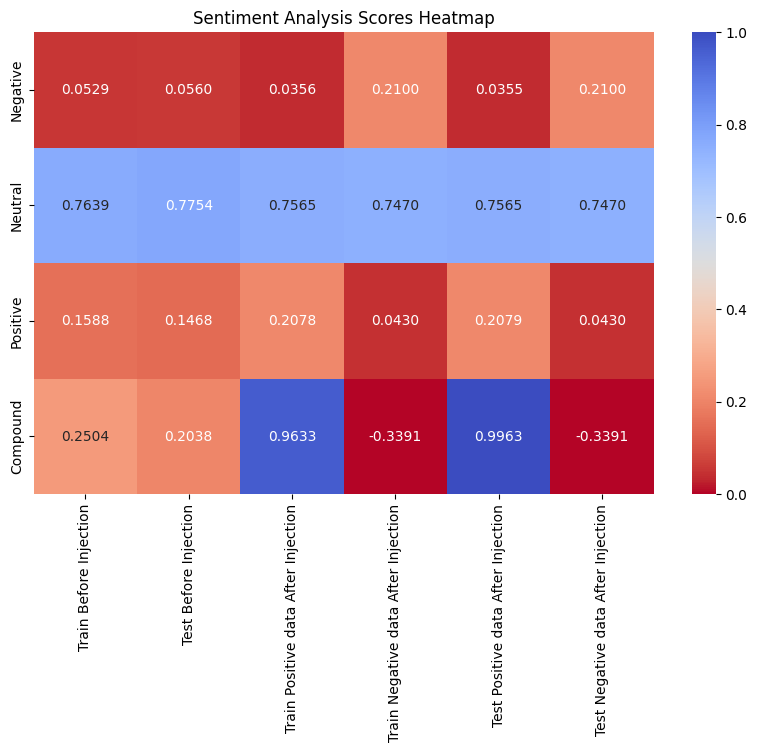

In [10]:
# Prepare the data
data = {
    'Train Before Injection': [0.0529, 0.7639, 0.1588, 0.2504],
    'Test Before Injection': [0.0560, 0.7754, 0.1468, 0.2038],
    'Train Positive data After Injection': [0.0356, 0.7565, 0.2078, 0.9633],
    'Train Negative data After Injection': [0.210, 0.747, 0.043, -0.3391],
    'Test Positive data After Injection': [0.0355, 0.7565, 0.2079, 0.9963],
    'Test Negative data After Injection': [0.210, 0.747, 0.043, -0.3391]
}


# Define the sentiment categories
categories = ['Negative', 'Neutral', 'Positive', 'Compound']

# Create a dataframe
df = pd.DataFrame(data, index=categories)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="coolwarm_r", cbar=True, vmin=0, vmax=1.0, fmt=".4f")
plt.title('Sentiment Analysis Scores Heatmap')
plt.show()